In [1]:
%load_ext Cython

In [2]:
%%cython
from draculab import *

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from numpy import sin, cos
%matplotlib notebook
import time

In [4]:
## SETTING THE NETWORK ##

class spinal_cord():
    
    def antagonist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1,
                          alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the antagonist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_r_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_r_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_r_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_r_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def antagonist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                               alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
                         self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
                         self.r_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
                         self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
                                  self.alpha_muscle1_2_arm_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle1, r_muscle2, self.r_muscle1_2_r_muscle2_conn_spec, 
                         self.r_muscle1_2_r_muscle2_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
                                   self.arm_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
                                   self.arm_2_pn_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
                                   self.arm_2_ia_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
                                   self.arm_2_ib_muscle1_syn_spec)

        self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
                         self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
                         self.r_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
                         self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
                                  self.alpha_muscle2_2_arm_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle2, r_muscle1, self.r_muscle2_2_r_muscle1_conn_spec, 
                         self.r_muscle2_2_r_muscle1_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
                                   self.arm_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
                                   self.arm_2_pn_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
                                   self.arm_2_ia_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
                                   self.arm_2_ib_muscle2_syn_spec)

    def synergist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1, 
                         alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the synergist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        #self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        #self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        #self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = exc_aff_syn
        #self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        #self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_r_muscle2_syn_spec = exc_aff_syn
        #self.ib_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        #self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        #self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        #self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        #self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        #self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        #self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        #self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = exc_aff_syn
        #self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        #self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_r_muscle1_syn_spec = exc_aff_syn
        #self.ib_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        #self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        #self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        #self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        #self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        #self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        #self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        #self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        #self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        #self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_r_muscle2_conn_spec = conn_spec
        #self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        #self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
        #                                      'delays' : 0.005}
        #self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        #self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        #self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        #self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        #self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        #self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        #self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        #self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_r_muscle1_conn_spec = conn_spec
        #self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        #self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
        #                                      'delays' : 0.005}
        #self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        #self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        #self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def synergist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                              alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        #self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
        #                 self.alpha_muscle1_2_r_muscle1_syn_spec)
        #self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
        #                          self.alpha_muscle1_2_arm_syn_spec)
        #self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        #self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.r_muscle1_2_alpha_muscle1_syn_spec)
        #self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
        #                 self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, r_muscle2, self.r_muscle1_2_r_muscle2_conn_spec, 
                         self.r_muscle1_2_r_muscle2_syn_spec)
        #self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
        #                           self.arm_2_alpha_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
        #                           self.arm_2_pn_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
        #                           self.arm_2_ia_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
        #                           self.arm_2_ib_muscle1_syn_spec)

        #self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
        #                 self.alpha_muscle2_2_r_muscle2_syn_spec)
        #self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
        #                          self.alpha_muscle2_2_arm_syn_spec)
        #self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        #self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.r_muscle2_2_alpha_muscle2_syn_spec)
        #self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
        #                 self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, r_muscle1, self.r_muscle2_2_r_muscle1_conn_spec, 
                         self.r_muscle2_2_r_muscle1_syn_spec)
        #self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
        #                           self.arm_2_alpha_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
        #                           self.arm_2_pn_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
        #                           self.arm_2_ia_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
        #                           self.arm_2_ib_muscle2_syn_spec)
    
    def partial_synergist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1, 
                                 alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the partial synergist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Selective afferent synapse dictionary
        sel_aff_syn = {'init_w' : {'distribution':'uniform', 'low':-2, 'high':2},
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        #self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_r_muscle2_syn_spec = exc_aff_syn
        #self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        #self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = inh_aff_syn
        #self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        #self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        #self.ib_muscle1_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ib_muscle1_2_ib_muscle2_syn_spec = sel_aff_syn
        #self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        #self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        #self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        #self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        #self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_r_muscle1_syn_spec = exc_aff_syn
        #self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        #self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = inh_aff_syn
        #self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        #self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        #self.ib_muscle2_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ib_muscle2_2_ib_muscle1_syn_spec = sel_aff_syn
        #self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        #self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        #self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        #self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        #self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_r_muscle2_conn_spec = conn_spec
        #self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        #self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        #self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        #self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        #self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_ib_muscle2_conn_spec = conn_spec
        #self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
        #                                      'delays' : 0.005}
        #self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        #self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        #self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        #self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_r_muscle1_conn_spec = conn_spec
        #self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        #self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        #self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        #self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        #self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_ib_muscle1_conn_spec = conn_spec
        #self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
        #                                      'delays' : 0.005}
        #self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        #self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        #self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def partial_synergist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                                      alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        #self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
        #                 self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.connect(alpha_muscle1, r_muscle2, self.alpha_muscle1_2_r_muscle2_conn_spec, 
                         self.alpha_muscle1_2_r_muscle2_syn_spec)
        #self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
        #                          self.alpha_muscle1_2_arm_syn_spec)
        #self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        #self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.r_muscle1_2_alpha_muscle1_syn_spec)
        #self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
        #                 self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle2, self.r_muscle1_2_alpha_muscle2_conn_spec, 
                         self.r_muscle1_2_alpha_muscle2_syn_spec)
        #self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle1, ib_muscle2, self.ib_muscle1_2_ib_muscle2_conn_spec, 
                         self.ib_muscle1_2_ib_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
        #                           self.arm_2_alpha_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
        #                           self.arm_2_pn_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
        #                           self.arm_2_ia_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
        #                           self.arm_2_ib_muscle1_syn_spec)

        #self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
        #                 self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.connect(alpha_muscle2, r_muscle1, self.alpha_muscle2_2_r_muscle1_conn_spec, 
                         self.alpha_muscle2_2_r_muscle1_syn_spec)
        #self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
        #                          self.alpha_muscle2_2_arm_syn_spec)
        #self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        #self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.r_muscle2_2_alpha_muscle2_syn_spec)
        #self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
        #                 self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle1, self.r_muscle2_2_alpha_muscle1_conn_spec, 
                         self.r_muscle2_2_alpha_muscle1_syn_spec)
        #self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle2, ib_muscle1, self.ib_muscle2_2_ib_muscle1_conn_spec, 
                         self.ib_muscle2_2_ib_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
        #                           self.arm_2_alpha_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
        #                           self.arm_2_pn_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
        #                           self.arm_2_ia_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
        #                           self.arm_2_ib_muscle2_syn_spec)
        
    def fully_connected_params(self):
    #Create parameter dictionaries for synapses and connections aiming to connect all neurons from same muscle
        
        # Synapse dictionary
        syn_spec = {'init_w' : {'distribution':'uniform', 'low':-2, 'high':2},
                    'type' : synapse_types.static,
                    'inp_ports' : [0]}
        
        #self.alpha_2_r_syn_spec = syn_spec
        self.alpha_2_ia_syn_spec = syn_spec
        self.alpha_2_ib_syn_spec = syn_spec
        self.alpha_2_pn_syn_spec = syn_spec
        #self.r_2_alpha_syn_spec = syn_spec
        #self.r_2_ia_syn_spec = syn_spec
        self.r_2_ib_syn_spec = syn_spec
        self.r_2_pn_syn_spec = syn_spec
        self.ia_2_alpha_syn_spec = syn_spec
        self.ia_2_r_syn_spec = syn_spec
        self.ia_2_ib_syn_spec = syn_spec
        self.ia_2_pn_syn_spec = syn_spec
        #self.ib_2_alpha_syn_spec = syn_spec
        self.ib_2_r_syn_spec = syn_spec
        self.ib_2_ia_syn_spec = syn_spec
        self.ib_2_pn_syn_spec = syn_spec
        #self.pn_2_alpha_syn_spec = syn_spec
        self.pn_2_r_syn_spec = syn_spec
        self.pn_2_ia_syn_spec = syn_spec
        self.pn_2_ib_syn_spec = syn_spec
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        #self.alpha_2_r_conn_spec = conn_spec
        self.alpha_2_ia_conn_spec = conn_spec
        self.alpha_2_ib_conn_spec = conn_spec
        self.alpha_2_pn_conn_spec = conn_spec
        #self.r_2_alpha_conn_spec = conn_spec
        #self.r_2_ia_conn_spec = conn_spec
        self.r_2_ib_conn_spec = conn_spec
        self.r_2_pn_conn_spec = conn_spec
        self.ia_2_alpha_conn_spec = conn_spec
        self.ia_2_r_conn_spec = conn_spec
        self.ia_2_ib_conn_spec = conn_spec
        self.ia_2_pn_conn_spec = conn_spec
        #self.ib_2_alpha_conn_spec = conn_spec
        self.ib_2_r_conn_spec = conn_spec
        self.ib_2_ia_conn_spec = conn_spec
        self.ib_2_pn_conn_spec = conn_spec
        #self.pn_2_alpha_conn_spec = conn_spec
        self.pn_2_r_conn_spec = conn_spec
        self.pn_2_ia_conn_spec = conn_spec
        self.pn_2_ib_conn_spec = conn_spec
        
    def fully_connected_connections(self, alpha, ia, ib, pn, r):
        
        #self.net.connect(alpha, r, self.alpha_2_r_conn_spec, self.alpha_2_r_syn_spec)
        self.net.connect(alpha, ia, self.alpha_2_ia_conn_spec, self.alpha_2_ia_syn_spec)
        self.net.connect(alpha, ib, self.alpha_2_ib_conn_spec, self.alpha_2_ib_syn_spec)
        self.net.connect(alpha, pn, self.alpha_2_pn_conn_spec, self.alpha_2_pn_syn_spec)
        #self.net.connect(r, alpha, self.r_2_alpha_conn_spec, self.r_2_alpha_syn_spec)
        #self.net.connect(r, ia, self.r_2_ia_conn_spec, self.r_2_ia_syn_spec)
        self.net.connect(r, ib, self.r_2_ib_conn_spec, self.r_2_ib_syn_spec)
        self.net.connect(r, pn, self.r_2_pn_conn_spec, self.r_2_pn_syn_spec)
        self.net.connect(ia, alpha, self.ia_2_alpha_conn_spec, self.ia_2_alpha_syn_spec)
        self.net.connect(ia, r, self.ia_2_r_conn_spec, self.ia_2_r_syn_spec)
        self.net.connect(ia, ib, self.ia_2_ib_conn_spec, self.ia_2_ib_syn_spec)
        self.net.connect(ia, pn, self.ia_2_pn_conn_spec, self.ia_2_pn_syn_spec)
        #self.net.connect(ib, alpha, self.ib_2_alpha_conn_spec, self.ib_2_alpha_syn_spec)
        self.net.connect(ib, r, self.ib_2_r_conn_spec, self.ib_2_r_syn_spec)
        self.net.connect(ib, ia, self.ib_2_ia_conn_spec, self.ib_2_ia_syn_spec)
        self.net.connect(ib, pn, self.ib_2_pn_conn_spec, self.ib_2_pn_syn_spec)
        #self.net.connect(pn, alpha, self.pn_2_alpha_conn_spec, self.pn_2_alpha_syn_spec)
        self.net.connect(pn, r, self.pn_2_r_conn_spec, self.pn_2_r_syn_spec)
        self.net.connect(pn, ia, self.pn_2_ia_conn_spec, self.pn_2_ia_syn_spec)
        self.net.connect(pn, ib, self.pn_2_ib_conn_spec, self.pn_2_ib_syn_spec)
    
    def __init__(self):
        
    ########### Fixing random seed
    
        self.seed = 19680801
        np.random.seed(self.seed)
        
    ########### Create parameter dictionaries for network, plant, and units
    
        # Defining network parameters
        self.net_params = {'min_delay': 0.005,
                           'min_buff_size': 10}

        # Defining neurons' parameters
        
        # Neurons' dictionary
        neuron_params = {'type' : unit_types.presyn_inh_sig,
                         'init_val' : 0.,
                         'thresh' : .5,
                         'slope' : 11.,
                         'tau' : 0.02,
                         'HYP' : 2.,
                         'OD' : 2.}
        ia_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 3.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        alpha_params = {'type' : unit_types.presyn_inh_sig,
                        'init_val' : 0.,
                        'thresh' : 0.8,
                        'slope' : 5.,
                        'tau' : 0.02,
                        'HYP' : 2.,
                        'OD' : 2.}
        ib_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 2.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        pn_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 3.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        
        
        # Muscle 1 neurons
        self.alpha_1_params = alpha_params
        self.pn_1_params = pn_params
        self.ia_1_params = ia_params
        self.r_1_params = neuron_params
        self.ib_1_params = ib_params
        
        # Muscle 2 neurons
        self.alpha_2_params = alpha_params
        self.pn_2_params = pn_params
        self.ia_2_params = ia_params
        self.r_2_params = neuron_params
        self.ib_2_params = ib_params
        
        # Muscle 3 neurons
        self.alpha_3_params = alpha_params
        self.pn_3_params = pn_params
        self.ia_3_params = ia_params
        self.r_3_params = neuron_params
        self.ib_3_params = ib_params
        
        # Muscle 4 neurons
        self.alpha_4_params = alpha_params
        self.pn_4_params = pn_params
        self.ia_4_params = ia_params
        self.r_4_params = neuron_params
        self.ib_4_params = ib_params
        
        # Muscle 5 neurons
        self.alpha_5_params = alpha_params
        self.pn_5_params = pn_params
        self.ia_5_params = ia_params
        self.r_5_params = neuron_params
        self.ib_5_params = ib_params
        
        # Muscle 6 neurons
        self.alpha_6_params = alpha_params
        self.pn_6_params = pn_params
        self.ia_6_params = ia_params
        self.r_6_params = neuron_params
        self.ib_6_params = ib_params

        # Defining arm parameters
        self.arm_params = {'type': plant_models.planar_arm_v3,
                           'mass1': 1.,
                           'mass2': 1.,
                           'init_q1': 0.,
                           'init_q2': np.pi/2.,
                           'init_q1p': 0.,
                           'init_q2p': 0.,
                           'g': 0.0,
                           'mu1': 0.01,
                           'mu2': 0.01,
                           
                           #'s_min' : -0.4,
                           #'p1' : (-0.01, 0.04),
                           #'p2' : (0.29, 0.03),
                           #'p3' : (0., 0.05),
                           #'p5' : (0.01, -0.05),
                           #'p10': (0.29, 0.03),
                           #'l_torque' : 0.01,
                           #'l_visco' : 0.01,
                           'g_e': 20.,
                           #'l0_e' : [1.]*6,
                           #'Ia_gain' : 2.5*np.array([3.,10.,10., 3.,10.,10.]),
                           #'II_gain' : 2.*np.array([3., 8., 8., 3., 8., 8.]),
                           #'Ib_gain' : 5.,
                           #'T_0' : .5,
                           'k_pe_e': 8.,
                           'k_se_e': 13.,
                           #'b_e' : 5.,
                           #'g_s' : 0.02,
                           #'k_pe_s' : 2., 
                           #'k_se_s' : 2.,
                           #'g_d' : 0.01,
                           #'k_pe_d' : .2, #.1,
                           #'k_se_d' : 1., #2.,
                           #'b_s' : .5,
                           #'b_d' : 2.,#3.,
                           #'l0_s': .7,
                           #'l0_d': .8,
                           #'fs' : 0.1,
                           #'se_II' : 0.5,
                           #'cd' : 0.5,
                           #'cs' : 0.5
                          }
        
        # Defining sources' parameters
        self.source_params = {'init_val' : 1.,
                              'type' : unit_types.source,
                              'function' : lambda x: 1.}
        
    ########### Create parameter dictionaries for the synapses and connections
    
        '''    
        # Defining synapses' and connections' specifications to neurons and plant
        
        ## Antagonist connections
        # Muscle 1 - muscle 4
        self.antagonist_params(0, 5, 6, 7, 9, 17, 18, 19)
        # Muscle 2 - muscle 3
        self.antagonist_params(3, 9, 10, 11, 6, 13, 14, 15)
        # Muscle 5 - muscle 6
        self.antagonist_params(12, 21, 22, 23, 15, 25, 26, 27)
        
        ## Synergist connections
        # Muscle 1 - muscle 2
        self.synergist_params(0, 5, 6, 7, 3, 9, 10, 11)
        # Muscle 1 - muscle 5
        self.synergist_params(0, 5, 6, 7, 12, 21, 22, 23)
        # Muscle 4 - muscle 3
        self.synergist_params(9, 17, 18, 19, 6, 13, 14, 15)
        # Muscle 4 - muscle 6
        self.synergist_params(9, 17, 18, 19, 15, 25, 26, 27)
        
        ## Partial synergist connections
        # Muscle 2 - muscle 5
        self.partial_synergist_params(3, 9, 10, 11, 12, 21, 22, 23)
        # Muscle 2 - muscle 6
        self.partial_synergist_params(3, 9, 10, 11, 15, 25, 26, 27)
        # Muscle 3 - muscle 5
        self.partial_synergist_params(6, 13, 14, 15, 12, 21, 22, 23)
        # Muscle 3 - muscle 6
        self.partial_synergist_params(6, 13, 14, 15, 15, 25, 26, 27)
        '''
        
        # Defining synapses' specifications to source units

        # PC synapse dictionary
        self.pc_syn = {'init_w' : {'distribution':'uniform', 'low':-0.2, 'high':0.2},
                       'type' : synapse_types.static,
                       'inp_ports' : [1]}
        # IC synapse dictionary
        self.ic_syn = {'init_w' : {'distribution':'uniform', 'low':-0.2, 'high':0.2},
                       'type' : synapse_types.static,
                       'inp_ports' : [2, 2, 2, 2]}   
        
        # Defining connections' specifications to source units

        # PC Connection dictionary
        self.pc_conn_spec = {'rule' : 'one_to_one',
                             'delay' : 0.005}
        # IC connection dictionary 
        self.ic_conn_spec = {'rule' : 'all_to_all',
                             'delay' : 0.005}
        
    def initialize(self):
        
        np.random.seed(self.seed)
        
    ########### Create network, neurons and plant

        self.net = network(self.net_params)
        
        alpha_1 = self.net.create(1, self.alpha_1_params)
        pn_1 = self.net.create(1, self.pn_1_params)
        ia_1 = self.net.create(1, self.ia_1_params)
        r_1 = self.net.create(1, self.r_1_params)
        ib_1 = self.net.create(1, self.ib_1_params)
        self.m1_ids = alpha_1 + pn_1 + ia_1 + r_1 + ib_1
        
        alpha_2 = self.net.create(1, self.alpha_2_params)
        pn_2 = self.net.create(1, self.pn_2_params)
        ia_2 = self.net.create(1, self.ia_2_params)
        r_2 = self.net.create(1, self.r_2_params)
        ib_2 = self.net.create(1, self.ib_2_params)
        self.m2_ids = alpha_2 + pn_2 + ia_2 + r_2 + ib_2
        
        alpha_3 = self.net.create(1, self.alpha_3_params)
        pn_3 = self.net.create(1, self.pn_3_params)
        ia_3 = self.net.create(1, self.ia_3_params)
        r_3 = self.net.create(1, self.r_3_params)
        ib_3 = self.net.create(1, self.ib_3_params)
        self.m3_ids = alpha_3 + pn_3 + ia_3 + r_3 + ib_3
        
        alpha_4 = self.net.create(1, self.alpha_4_params)
        pn_4 = self.net.create(1, self.pn_4_params)
        ia_4 = self.net.create(1, self.ia_4_params)
        r_4 = self.net.create(1, self.r_4_params)
        ib_4 = self.net.create(1, self.ib_4_params)
        self.m4_ids = alpha_4 + pn_4 + ia_4 + r_4 + ib_4
        
        alpha_5 = self.net.create(1, self.alpha_5_params)
        pn_5 = self.net.create(1, self.pn_5_params)
        ia_5 = self.net.create(1, self.ia_5_params)
        r_5 = self.net.create(1, self.r_5_params)
        ib_5 = self.net.create(1, self.ib_5_params)
        self.m5_ids = alpha_5 + pn_5 + ia_5 + r_5 + ib_5
        
        alpha_6 = self.net.create(1, self.alpha_6_params)
        pn_6 = self.net.create(1, self.pn_6_params)
        ia_6 = self.net.create(1, self.ia_6_params)
        r_6 = self.net.create(1, self.r_6_params)
        ib_6 = self.net.create(1, self.ib_6_params)
        self.m6_ids = alpha_6 + pn_6 + ia_6 + r_6 + ib_6
        
        self.arm = self.net.create(1, self.arm_params)

    ########### Connect
    
        #Creating lists with port numbers
        alpha_port = range(0,6)
        ia_port = range(28,34)
        ii_port = range(34,40)
        ib_port = range(22,28)
    
        ## Antagonist connections
        # Muscle 1 - muscle 4
        self.antagonist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[3], ia_port[3], 
                               ii_port[3], ib_port[3])
        #self.antagonist_params(0, 28, 34, 22, 3, 31, 37, 25)
        self.antagonist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_4, ia_4, ib_4, pn_4, r_4)
        # Muscle 2 - muscle 3
        self.antagonist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[2], ia_port[2], 
                               ii_port[2], ib_port[2])
        #self.antagonist_params(1, 29, 35, 23, 2, 30, 36, 24)
        self.antagonist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_3, ia_3, ib_3, pn_3, r_3)
        # Muscle 5 - muscle 6
        self.antagonist_params(alpha_port[4], ia_port[4], ii_port[4], ib_port[4], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.antagonist_params(4, 32, 38, 26, 5, 33, 39, 27)
        self.antagonist_connections(alpha_5, ia_5, ib_5, pn_5, r_5, alpha_6, ia_6, ib_6, pn_6, r_6)
        
        ## Synergist connections
        # Muscle 1 - muscle 2
        self.synergist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[1], ia_port[1], 
                               ii_port[1], ib_port[1])
        #self.synergist_params(0, 28, 34, 22, 1, 29, 35, 23)
        self.synergist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_2, ia_2, ib_2, pn_2, r_2)
        # Muscle 1 - muscle 5
        self.synergist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.synergist_params(0, 28, 34, 22, 4, 32, 38, 26)
        self.synergist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 4 - muscle 3
        self.synergist_params(alpha_port[3], ia_port[3], ii_port[3], ib_port[3], alpha_port[2], ia_port[2], 
                               ii_port[2], ib_port[2])
        #self.synergist_params(3, 31, 37, 25, 2, 30, 36, 24)
        self.synergist_connections(alpha_4, ia_4, ib_4, pn_4, r_4, alpha_3, ia_3, ib_3, pn_3, r_3)
        # Muscle 4 - muscle 6
        self.synergist_params(alpha_port[3], ia_port[3], ii_port[3], ib_port[3], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.synergist_params(3, 31, 37, 25, 5, 33, 39, 27)
        self.synergist_connections(alpha_4, ia_4, ib_4, pn_4, r_4, alpha_6, ia_6, ib_6, pn_6, r_6)
        
        ## Partial synergist connections
        # Muscle 2 - muscle 5
        self.partial_synergist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.partial_synergist_params(1, 29, 35, 23, 4, 32, 38, 26)
        self.partial_synergist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 2 - muscle 6
        self.partial_synergist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.partial_synergist_params(1, 29, 35, 23, 5, 33, 39, 27)
        self.partial_synergist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_6, ia_6, ib_6, pn_6, r_6)
        # Muscle 3 - muscle 5
        self.partial_synergist_params(alpha_port[2], ia_port[2], ii_port[2], ib_port[2], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.partial_synergist_params(2, 30, 36, 24, 4, 32, 38, 26)
        self.partial_synergist_connections(alpha_3, ia_3, ib_3, pn_3, r_3, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 3 - muscle 6
        self.partial_synergist_params(alpha_port[2], ia_port[2], ii_port[2], ib_port[2], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.partial_synergist_params(2, 30, 36, 24, 5, 33, 39, 27)
        self.partial_synergist_connections(alpha_3, ia_3, ib_3, pn_3, r_3, alpha_6, ia_6, ib_6, pn_6, r_6)
        
        ## Connecting all neurons from same muscle
        # Muscle 1
        self.fully_connected_params()
        self.fully_connected_connections(alpha_1, ia_1, ib_1, pn_1, r_1)
        # Muscle 2
        self.fully_connected_params()
        self.fully_connected_connections(alpha_2, ia_2, ib_2, pn_2, r_2)
        # Muscle 3
        self.fully_connected_params()
        self.fully_connected_connections(alpha_3, ia_3, ib_3, pn_3, r_3)
        # Muscle 4
        self.fully_connected_params()
        self.fully_connected_connections(alpha_4, ia_4, ib_4, pn_4, r_4)
        # Muscle 5
        self.fully_connected_params()
        self.fully_connected_connections(alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 6
        self.fully_connected_params()
        self.fully_connected_connections(alpha_6, ia_6, ib_6, pn_6, r_6)
    
    ########### Create PC source units and connect
    
        for unit in self.net.units:
            uid = unit.ID
            for syn in range(len(self.net.syns[uid])):
                src = self.net.create(1, self.source_params)
                self.net.connect(src, [uid], self.pc_conn_spec, self.pc_syn)
                
    ########### Create IC source unit and connect

        self.ic_source = self.net.create(1, self.source_params)
        self.net.connect(self.ic_source, self.m1_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m2_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m3_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m4_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m5_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m6_ids[1:], self.ic_conn_spec, self.ic_syn)
        
    ########### Create source units to track the insertion points and tensions of the arm muscles
    
        track_params = {'type': unit_types.source,
                        'init_val': 0.,
                        'function' : lambda x: 0.}
        
        # create source units to track the insertion points
        self.ipx_track = self.net.create(12, track_params) # x coordinates
        self.ipy_track = self.net.create(12, track_params) # y coordinates
        # create source units to track the tensions
        #self.ten_track = self.net.create(6, track_params)

        for idx, uid in enumerate(self.ipx_track):
            self.net.units[uid].set_function(self.create_xtracker(self.arm, idx))
        for idx, uid in enumerate(self.ipy_track):
            self.net.units[uid].set_function(self.create_ytracker(self.arm, idx))
        #for idx, uid in enumerate(self.ten_track):
            #self.net.units[uid].set_function(self.create_tentracker(self.arm, idx))
            
    def create_xtracker(self, arm_id, idx):
        return lambda t: self.net.plants[arm_id].ip[idx][0]

    def create_ytracker(self, arm_id, idx):
        return lambda t: self.net.plants[arm_id].ip[idx][1]

    #def create_tentracker(self, arm_id, idx):
        #return lambda t: self.net.plants[arm_id].muscles[idx].T
        
    def simulate(self, sim_time, flat=True):
    ########### Simulate
    
        #np.random.seed(19680801)
    
        if flat:
            self.sim_dat = self.net.flat_run(sim_time)
        else:
            self.sim_dat = self.net.run(sim_time)
        self.arm_activs = np.array(self.sim_dat[2][self.arm])
        
        #print(self.sim_dat[1][self.alpha_1[0]])
        #print(self.arm_activs[:,0])
        #print(len(self.net.syns[self.ib_4[0]]))
        
    def neuron_activity(self):    
    # Plot of neurons' activity

        fig = plt.figure(figsize=(18,8))
        fig.add_subplot(231)
        m_label = ["alpha", "PN", "Ia", "R", "Ib"]
        m1_label = [s + " m1" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m1_ids[i]])
        plt.legend(m1_label, loc="lower right", ncol=1)
        fig.add_subplot(232)
        m2_label = [s + " m2" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m2_ids[i]])
        plt.legend(m2_label, loc="lower right", ncol=1)
        fig.add_subplot(233)
        m3_label = [s + " m3" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m3_ids[i]])
        plt.legend(m3_label, loc="lower right", ncol=1)
        fig.add_subplot(234)
        m4_label = [s + " m4" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m4_ids[i]])
        plt.legend(m4_label, loc="lower right", ncol=1)
        fig.add_subplot(235)
        m5_label = [s + " m5" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m5_ids[i]])
        plt.legend(m5_label, loc="lower right", ncol=1)
        fig.add_subplot(236)
        m6_label = [s + " m6" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m6_ids[i]])
        plt.legend(m6_label, loc="lower right", ncol=1)
        plt.show()
        
    def arm_activity(self): 
    # Plot the state variables of the arm
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Shoulder angle (rad)', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], (self.arm_activs[:,0]+np.pi)%(2.*np.pi)-np.pi, 'b', linewidth=lw)
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Shoulder ang vel [rad/s]', fontsize='xx-large')
        ax0b.plot(self.sim_dat[0], self.arm_activs[:,1], 'r', linewidth=lw)
        ax0b.tick_params(labelsize=ls)
        ax0c = fig.add_axes([0.01, .44, .99, 0.16 ])
        ax0c.set_ylabel('Elbow angle (rad)', fontsize='xx-large')
        ax0c.tick_params(labelsize=ls)
        ax0c.plot(self.sim_dat[0], (self.arm_activs[:,2]+np.pi)%(2.*np.pi)-np.pi, 'b', linewidth=lw)
        ax0d = fig.add_axes([0.01, .28, .99, 0.16 ])
        ax0d.set_xlabel('time [s]', fontsize='xx-large') 
        ax0d.set_ylabel('Elbow ang vel [rad/s]', fontsize='xx-large')
        ax0d.plot(self.sim_dat[0], self.arm_activs[:,3], 'r', linewidth=lw)
        ax0d.tick_params(labelsize=ls)
        plt.show()
        
    def arm_afferent_output(self):
    # Plot the arm's afferent outputs
    
        fig = plt.figure(figsize=(18,17))
        fig.add_subplot(311)
        m_label = ["m1", "m2", "m3", "m4", "m5", "m6"]
        Ia_label = ["Ia afferent " + s for s in m_label]
        for i in range(28, 34):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(Ia_label, loc="lower right", ncol=1)
        fig.add_subplot(312)
        II_label = ["II afferent " + s for s in m_label]
        for i in range(34, 40):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(II_label, loc="lower right", ncol=1)
        fig.add_subplot(313)
        Ib_label = ["Ib afferent " + s for s in m_label]
        for i in range(22, 28):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(Ib_label, loc="lower right", ncol=1)
        plt.show()
        
        
    def arm_coord(self,des_coord_x,des_coord_y): 
    # Plot the hand coordinates of the arm 
    
        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # coordinates of hand
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xh = cos(theta_s)*l1 + cos(phi)*l2
        yh = sin(theta_s)*l1 + sin(phi)*l2
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Hand coordinate x', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], xh, 'b', linewidth=lw)
        ax0a.plot(self.sim_dat[0], [des_coord_x]*len(self.sim_dat[0]), 'k', linewidth=1)
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Hand coordinate y', fontsize='xx-large')
        ax0b.tick_params(labelsize=ls)
        ax0b.plot(self.sim_dat[0], yh, 'r', linewidth=lw)
        ax0b.plot(self.sim_dat[0], [des_coord_y]*len(self.sim_dat[0]), 'k', linewidth=1)
        plt.show()
        
    def arm_trajectory(self,targ_coord_x,targ_coord_y,sim_time): 
    # Plot the hand trajectory 
    
        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # coordinates of hand
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xh = cos(theta_s)*l1 + cos(phi)*l2
        yh = sin(theta_s)*l1 + sin(phi)*l2
        
        des_coord_x = []
        des_coord_y = []
        tr = sim_time - 1.
        init_coord = np.array([0.3, 0.3])
        targ_coord = np.array([targ_coord_x, targ_coord_y])
        v = targ_coord - init_coord
        D = np.linalg.norm(v) + 1e-32
        u = v / D
        for tid,time in enumerate(self.sim_dat[0]):   
            # desired coordinates of hand
            dist = self.targ_dist(time, tr, D) 
            des_coord = init_coord + dist*u
            des_coord_x.append(des_coord[0])
            des_coord_y.append(des_coord[1])
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Hand coordinate x', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], xh, 'b', linewidth=lw)
        ax0a.plot(self.sim_dat[0], des_coord_x, 'b--', linewidth=lw)
        ax0a.set(ylim=(0, 0.5))
        ax0a.legend(['Actual trajectory','Desired trajectory'], loc="lower right", ncol=1, fontsize = 'large')
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Hand coordinate y', fontsize='xx-large')
        ax0b.tick_params(labelsize=ls)
        ax0b.plot(self.sim_dat[0], yh, 'r', linewidth=lw)
        ax0b.plot(self.sim_dat[0], des_coord_y, 'r--', linewidth=lw)
        ax0b.set(ylim=(0, 0.5))
        ax0b.legend(['Actual trajectory','Desired trajectory'], loc="lower right", ncol=1, fontsize = 'large')
        plt.show()
        
    def arm_animation(self):    
    # Animation of the arm and muscles

        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # data from tracking units
        acts = np.array(self.sim_dat[1])
        ipx = acts[self.ipx_track]
        ipy = acts[self.ipy_track]
        ten = acts[self.ten_track] # muscle tensions
        # coordinates of hand and elbow
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xe = cos(theta_s)*l1
        ye = sin(theta_s)*l1
        xh = xe + cos(phi)*l2
        yh = ye + sin(phi)*l2
        # creating the figure and axis
        fig = plt.figure(figsize=(10,10))
        plt.axis('equal')
        ax = plt.gca()
        lim = l1 + l2
        ax.set_xlim([-lim, lim])
        ax.set_ylim([-lim, lim])
        ax.grid()
        # creating lines and points
        line, = ax.plot([], [], 'o-b', lw=2)
        points, = ax.plot([], [], '+k')
        # preparing a colormap for the tensions
        ten_max = max(ten.max(), 1e-5)
        ten_min = min(ten.min(), -1e-5)
        for row_idx, row in enumerate(ten):
            for ent_idx, entry in enumerate(row):
                if entry > 0:
                    ten[row_idx, ent_idx] = entry/ten_max
                else:
                    ten[row_idx, ent_idx] = entry/abs(ten_min)
        ten = (ten / 2.) + 0.5
        mus_lines = []
        #cmap=plt.get_cmap('Reds')
        #cmap=plt.get_cmap('coolwarm')
        cmap=plt.get_cmap('bwr')
        for i in range(6):
            mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])

        def init(self):
            line.set_data([], [])
            points.set_data([], [])
            for i in range(6):
                mus_lines = []
                mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
            return line, points, mus_lines

        def update(self, frame):
            coord_x = [0, xe[frame], xh[frame]]
            coord_y = [0, ye[frame], yh[frame]]
            ip_x = ipx[:,frame]
            ip_y = ipy[:,frame]
            tens = ten[:, frame]
            line.set_data(coord_x, coord_y)
            points.set_data(ip_x, ip_y)
            for i, ml in enumerate(mus_lines):
                idx = 2*i
                ml.set_data(ip_x[idx:idx+2], ip_y[idx:idx+2])
                ml.set_color(cmap(tens[i]))

            cur_time = frame*0.01
            fig.suptitle('time: ' + '{:f}'.format(cur_time))
            return line, points, muls_lines #muscle1

        ani = FuncAnimation(fig, update, frames=np.arange(0, len(theta_s), 2), init_func=init, blit=True, 
                            interval=10)
        plt.show()
    
    def w_list(self):
    #Return a list with all synapse weight values in the network, separated by units
        
        w = []
        for unit in self.net.units:
            u_idx = []
            for syn in self.net.syns[unit.ID]:
                u_idx.append(syn.w)
            w.append(u_idx)
            
        return w
        
    def syn_list(self):
    #Return a list with ID's of synapses to test (at ports 1 and 2), separated by units
        
        syn_idx = []
        for unit in self.net.units:
            u_idx = []
            for i,syn in enumerate(self.net.syns[unit.ID]):
                #if syn.port in [1,2]:
                    u_idx.append(i)
            syn_idx.append(u_idx)
            
        return syn_idx
    
    def update_w(self,w):
    #Put the weights (w) in the networks' synapses
    
        #np.random.seed(19680801)
        
        #w = self.w_list()
        for uid,unit in enumerate(self.net.units):
            for sid,syn in enumerate(self.net.syns[uid]):
                syn.w = w[uid][sid]
    
    '''
    def calc_error(self,des_coord_x,des_coord_y,sim_time):
    #Calculate the error between the desired coordinate and the average of coordinates of hand in the last 
    #second of simulation
        
        avg_coord_x = 0.
        avg_coord_y = 0.
        count = 0.
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        for tid,time in enumerate(self.sim_dat[0]):
            if time > sim_time-1. :
                # angles of shoulder and elbow
                theta_s = self.arm_activs[:,0][tid]
                theta_e = self.arm_activs[:,2][tid]
                phi = theta_s + theta_e # elbow angle wrt x axis
                # coordinates of hand
                xh = cos(theta_s)*l1 + cos(phi)*l2
                yh = sin(theta_s)*l1 + sin(phi)*l2
                avg_coord_x += xh
                avg_coord_y += yh
                count += 1            
        avg_coord_x /= count
        avg_coord_y /= count
        
        return (des_coord_x - avg_coord_x)**2 + (des_coord_y - avg_coord_y)**2
    '''
    
    def targ_dist(self, time, tr, D):
        """ Target distance between hand and initial position at the given time. """
        return (time/2. - ((tr/(4*np.pi)) *
                           sin((2.*np.pi*time)/tr))) * ((2.*D)/tr)
    
    def calc_error(self,targ_coord_x,targ_coord_y,sim_time):
    #Calculate the error between the desired trajectory of the arm and the actual one
    
        error = 0.
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        tr = sim_time - 1.
        init_coord = np.array([0.3, 0.3])
        targ_coord = np.array([targ_coord_x, targ_coord_y])
        v = targ_coord - init_coord
        D = np.linalg.norm(v) + 1e-32
        u = v / D
        #D = np.sqrt((0.3-tar_coord_x)**2 + (0.3-tar_coord_y)**2)
        #u = np.array([tar_coord_x-0.3, tar_coord_y-0.3])/D
        for tid,time in enumerate(self.sim_dat[0]):   
            # angles of shoulder and elbow
            theta_s = self.arm_activs[:,0][tid]
            theta_e = self.arm_activs[:,2][tid]
            phi = theta_s + theta_e # elbow angle wrt x axis
            # actual coordinates of hand
            xh = cos(theta_s)*l1 + cos(phi)*l2
            yh = sin(theta_s)*l1 + sin(phi)*l2
            h_coord = np.array([xh, yh])
            # desired coordinates of hand
            dist = self.targ_dist(time, tr, D) 
            des_coord = init_coord + dist*u
            
            error += ((des_coord-h_coord)*(des_coord-h_coord)).sum()
        
        return error  
        
    
    def test_weights(self,w_change):
    #Calculate error for each of 3 values of synapse weight in synapse list
    
        #start_time = time.time()
        sim_time = 4.
        des_coord_x = 0.15
        des_coord_y = 0.3
        #w_change = 0.2
        
        w = self.w_list()
        syn_idx = self.syn_list()
        
        #RUN 1
        self.initialize()
        self.update_w(w)
        self.simulate(sim_time)
        error_1 = self.calc_error(des_coord_x,des_coord_y,sim_time)
        
    
        for uid, ulist in enumerate(w):
            print("Initial state. unit %d test syns: " % (uid),end=": ")
            print([syn.w for syn in self.net.syns[uid]])
            for syn in syn_idx[uid]:
                
                #RUN 2
                del(self.net)
                self.initialize()
                self.update_w(w)
                self.net.syns[uid][syn].w += w_change
                self.simulate(sim_time)
                error_2 = self.calc_error(des_coord_x,des_coord_y,sim_time)
                
                #RUN 3
                del(self.net)
                self.initialize()
                self.update_w(w)
                self.net.syns[uid][syn].w -= w_change
                self.simulate(sim_time)
                error_3 = self.calc_error(des_coord_x,des_coord_y,sim_time)
                self.net.syns[uid][syn].w += w_change #ruturn weight to initial value
                
                print("uid:%d, sid:%d, e1:%f, e2:%f, e3:%f" % (uid, syn, error_1, error_2, error_3))
                
                if error_2<error_1 and error_2<error_3:
                    self.net.syns[uid][syn].w += w_change
                    w[uid][syn] += w_change
                    error_1 = error_2
                elif error_3<error_1 and error_3<error_2:
                    self.net.syns[uid][syn].w -= w_change
                    w[uid][syn] -= w_change
                    error_1 = error_3
                print("change. unit %d test syns: " % (uid),end=": ")
                print([syn.w for syn in self.net.syns[uid]])
        
        #print('Execution time: %s seconds' % (time.time() - start_time))
        
        #self.initialize()
        #self.update_w(w)
        #self.simulate(sim_time)
        #print('Error: ' + str(self.calc_error(des_coord_x,des_coord_y,sim_time)))   
        #self.arm_coord(des_coord_x,des_coord_y)
        #self.arm_activity()
        
        return w 
    
    def grad_desc(self):
    #Implement the Gradient Descent Algorithm to synapses' weight
    
        start_time = time.time()
        sim_time = 4.
        des_coord_x = 0.15
        des_coord_y = 0.3
        w_change = [0.5, 0.5, 0.2, 0.2] #[0.5, 0.5, 0.4, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.1]
        error = self.calc_error(des_coord_x,des_coord_y,sim_time)
        iterat = 0
        
        while error>0.01 and iterat<len(w_change):
            w = self.test_weights(w_change[iterat])
            del(self.net)
            self.initialize()
            self.update_w(w)
            self.simulate(sim_time)
            error = self.calc_error(des_coord_x,des_coord_y,sim_time)
            iterat += 1
            print('Iteration: ' + str(iterat))
            print('Error: ' + str(error))
            print('Execution time: %s seconds' % (time.time() - start_time))
            #self.arm_coord(des_coord_x,des_coord_y)
            #self.arm_activity()
            #self.neuron_activity()
            self.arm_trajectory(des_coord_x,des_coord_y,sim_time)
            self.arm_afferent_output()
            print(w)
            
        #print('Execution time: %s seconds' % (time.time() - start_time))    
        #print('Iterations: ' + str(iterat))
        #print('Error: ' + str(error))
        
        return w
            

Execution time: 28.33592939376831 seconds
Error: 45.23123878523609


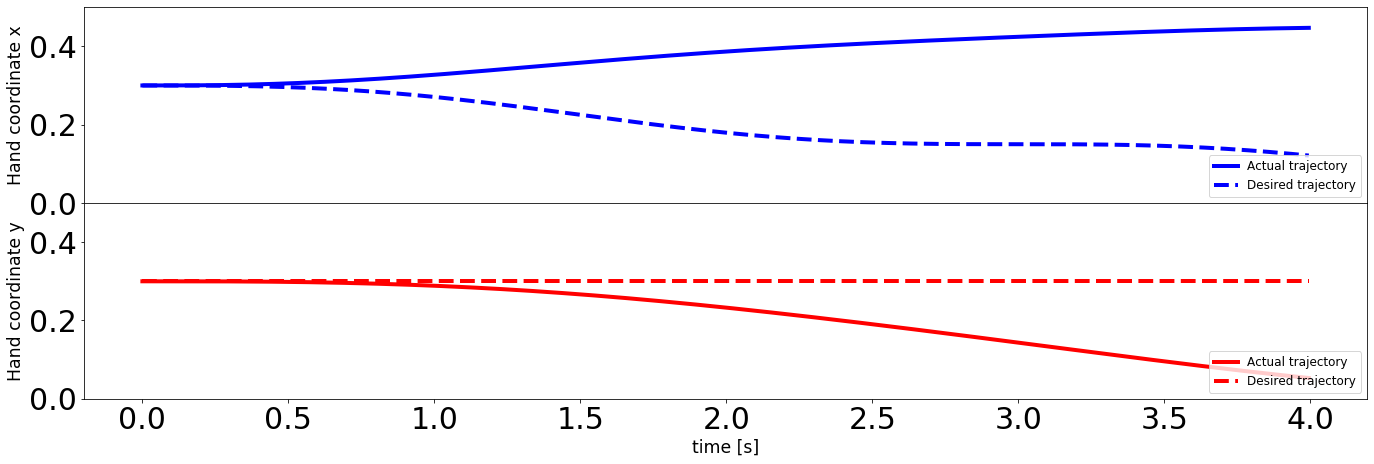

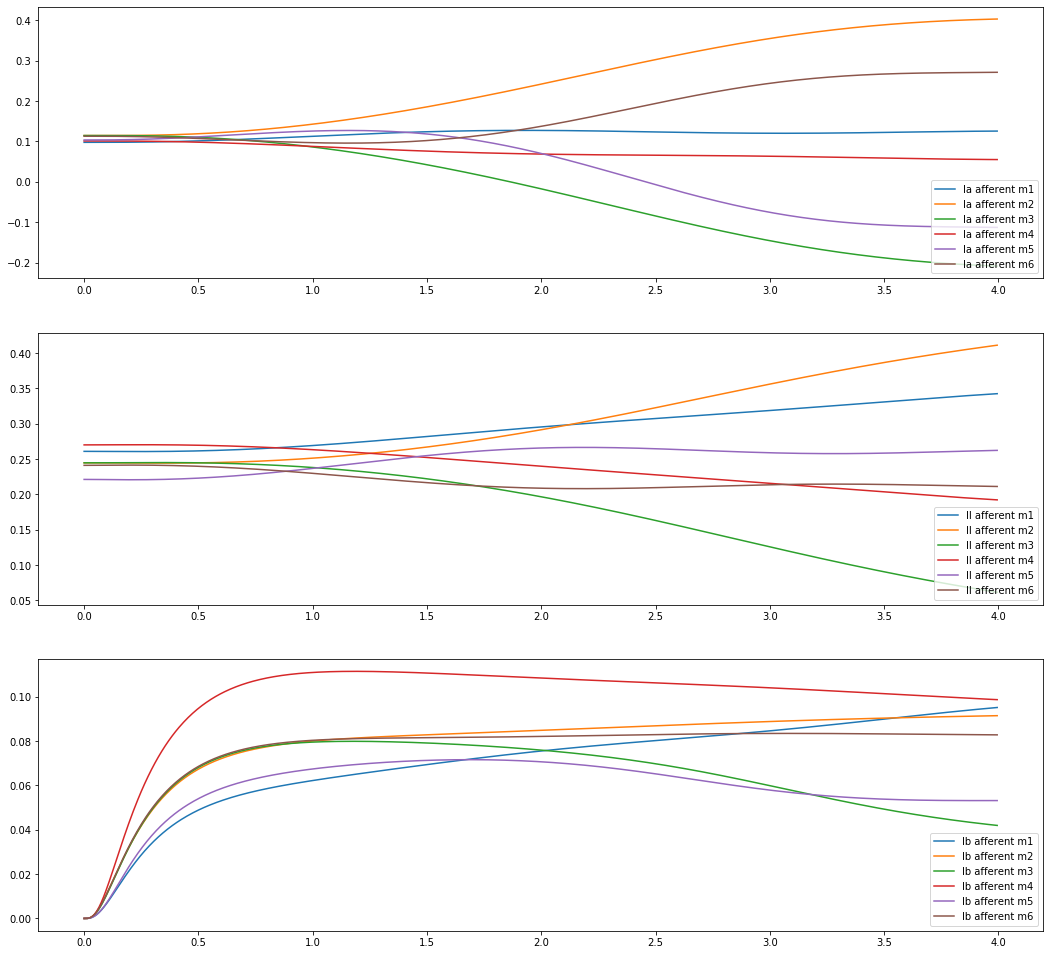

In [5]:
# Creating and runing the simulation

sc = spinal_cord()
start_time = time.time()
sc.initialize()
sc.simulate(4.)
print('Execution time: %s seconds' % (time.time() - start_time))
error = sc.calc_error(0.15,0.3,4.)
print('Error: ' + str(error))

#w = sc.w_list()
#print(w)
#l1 = sc.net.plants[sc.arm].l_arm
#l2 = sc.net.plants[sc.arm].l_farm
#ang_s = sc.arm_activs[:,0]
#print('ang_s: ' + str(ang_s))
#vel_s = sc.arm_activs[:,1]
#print('vel_s: ' + str(vel_s))
#ang_e = sc.arm_activs[:,2]
#print('ang_e: ' + str(ang_e))
#vel_e = sc.arm_activs[:,3]
#print('vel_e: ' + str(vel_e))

#tension_muscle1 = sc.arm_activs[:,4]
#print('tension_muscle1: ' + str(tension_muscle1))
#tension_muscle2 = sc.arm_activs[:,5]
#print('tension_muscle2: ' + str(tension_muscle2))
#tension_muscle3 = sc.arm_activs[:,6]
#print('tension_muscle3: ' + str(tension_muscle3))
#tension_muscle4 = sc.arm_activs[:,7]
#print('tension_muscle4: ' + str(tension_muscle4))
#tension_muscle5 = sc.arm_activs[:,8]
#print('tension_muscle5: ' + str(tension_muscle5))
#tension_muscle6 = sc.arm_activs[:,9]
#print('tension_muscle6: ' + str(tension_muscle6))

#sc.arm_coord(0.15,0.3)
#sc.arm_activity()
#sc.neuron_activity()

sc.arm_trajectory(0.15,0.3,4.)
sc.arm_afferent_output()

In [10]:
# Initial weights

#w = [[2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -0.06716157864991823, -0.19850560781897328, 0.12500128529942484, 0.03309468813889588, -0.13990160743242114, -0.13913057738025497, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, 0.004782972871041513, -0.18286755753249107, 0.12251846152391849, -0.10312053403482349, 0.1392844387905734, 0.07823594326208005, -0.05546925411953893], [2.0, 2.0, -0.4469436436793255, 1.8915890404699183, -1.808233961108603, -1.3559271629749419, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, 0.14476227182019624, -0.05598504586074804], [-2.0, 2.0, -2.0, 2.0, 2.0, 1.8916705547275723, 1.6252145802525275, 0.5318966470726676, 0.19121155784678784, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.15166716274797148, -0.0008997390737044975], [2.0, -2.0, 2.0, 2.0, -0.6543155782769752, -0.4442518840852867, 0.9744845389701515, 0.15976930476652523, -0.17380172706996203, -0.06032921390085569, -0.006484687749538504, 0.10281104693647869, -0.17728937915275186, -0.1083950926558988, -0.03233264259643054], [2.0, -1.5562255535388942, 1.132263501148206, 0.2696761449625127, -0.7032799290797445, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, -0.10732439344025663], [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 1.911141331298305, 0.8253393838184282, -2.0, -1.008336965189399, 1.8750446706415755, 0.7780283911173442, -2.0, -0.1344669629601949, 1.3814449807709774, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938], [2.0, 2.0, 1.2957822835567758, -1.5448621890560528, 1.7322155041832112, -1.6433301113364074, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1622398916770107], [-2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 1.689506129618911, -0.10112543938806606, 0.8637496404446541, -0.1194712876871194, 0.015057162646764766, -0.03983207161779817, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -0.0037987958821298073], [2.0, -2.0, 2.0, 2.0, 2.0, 1.6957285161727964, -0.04400502570595943, -1.0802072880589293, 0.1548912476305419, -0.15460361444622409, -0.16422880575419518, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.04057954870249145], [2.0, -1.3684665963161868, 0.8112507817961032, -1.051094245353302, 1.0024285613737622, -1.1166528326705385, -0.01549535186883011, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, -0.1386834974775626, -0.10201594754602389, -0.07223266013882143, 0.14310981779390508], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 0.17295757956568547, -1.4626984527478322, -0.07757993049566014, -2.0, -0.6299127464859344, 0.4362550769485978, 0.025167504354009995, 0.09831001106748927, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015], [2.0, 2.0, 1.0888920733214045, 0.45860810894677106, 1.3513505471747034, 1.7960170699158104, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.03226856391850261], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 1.0659575140846358, 1.1889389670608326, 1.627487939456195, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822, -0.14729596148185867], [-2.0, 2.0, 2.0, 2.0, 2.0, 0.7387394628298525, -1.5255375321934372, -1.4077484943606247, -0.10636860063173717, 0.01336229134427952, 0.18690169674238694, 0.06255707641454378, 0.1946783537163505, 0.1506487693752137, 0.001659219989363775, 0.14248040525543126, -0.1727572734521471], [2.0, 1.1995981127148587, -0.5481228394237365, 1.5871892895629074, 1.7086971531721682, -0.995948130344706, 1.1534933018151197, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19787000027555113, -0.09627009060385722, -0.10260679720789488], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -1.0927584182177, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.09486501131200953, -0.009611386985856202, -0.04902458883244548, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582], [2.0, 2.0, -0.23141752983194142, -0.3335270022000403, 1.7466237958571407, 0.8332986839706606, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, -0.08046234356882379], [-2.0, -2.0, 2.0, 2.0, 2.0, 1.0736233653214482, -0.4316227373640871, -0.5848144585207451, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.049172787967753484], [-2.0, 2.0, 2.0, 2.0, -0.18309063632626188, 1.8241447382919223, -1.4819366614734686, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.08971340374189994], [2.0, 0.39398593210990507, 0.8921520793190307, 1.391775012981117, -0.3829139226126661, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, -0.1800404062509589], [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.8371200427756724, 0.0471434958222976, 1.7149654801655982, -2.0, 0.959077195591886, -1.5900608592055114, 0.05185509426748264, 0.020453003975285045, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484], [2.0, 2.0, 0.15203745275739156, 0.08373973574858207, 1.1369191005063355, 0.884772991678382, 0.05902133448936586, 0.027779809962282714, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.09638962594040928], [-2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 0.5941355970818529, -1.3814126740529638, 1.7514208076190805, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.033006712817969686, 0.11816157437302743, 0.13183067666171794, -0.013810300505924078, -0.07772078096198487, -0.026403491636533438], [2.0, -2.0, 2.0, 2.0, 2.0, -1.368078498324762, -0.4118098497984475, 1.3473236163761904, 0.19046872638051077, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, -0.08328023348632484], [2.0, 0.26698208986846783, 0.4897561346948027, -1.8677161183176514, -1.4731475258489364, 1.680118584056915, 0.3068552754938736, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.08857752939243176], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.7907940856230207, 0.8798266669759616, -2.0, -0.9690222787007161, 0.8861789062132357, -0.8185440755241489, -2.0, -1.3562164777324401, 1.6377018457966908, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [2.0, 2.0, 1.8024008172969803, 1.8262496910613417, -1.5347140969461557, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, 0.07986235687947951], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, -1.2198937597112671, 1.9409018704514502, 1.9607209400928842, -0.1029448933394213, 0.07195458054188147, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, 0.03572139821834802], [-2.0, 2.0, 2.0, 2.0, 2.0, -0.686299249869736, 1.49725660116591, 1.9406258646931942, -0.07288220223731129, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.19387091411302132], [2.0, -0.6338128674265029, -1.1754979409481874, -1.5288241210635007, -0.8653107908764599, 1.807062274537008, -1.7560916348237252, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, -0.04782619873510843, 0.18999077344393583, -0.09106627291137759], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


<IPython.core.display.Javascript object>


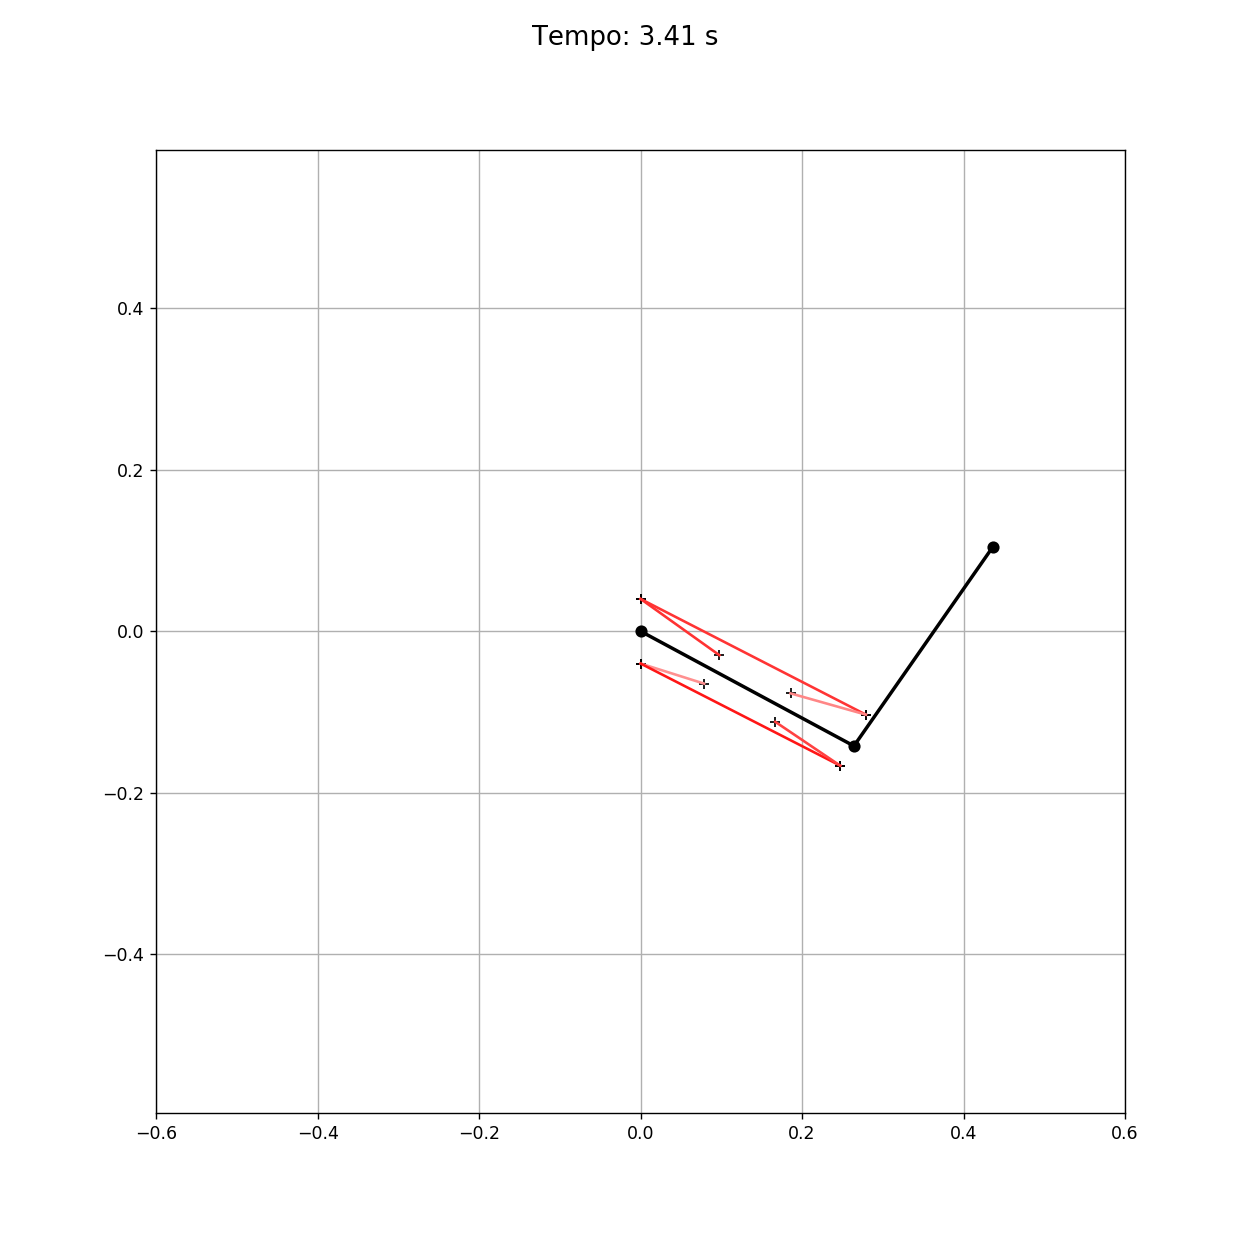

In [6]:
# Animation of the arm and muscles

%matplotlib notebook

# angles of shoulder and elbow
theta_s = sc.arm_activs[:,0]
theta_e = sc.arm_activs[:,2]
phi = theta_s + theta_e # elbow angle wrt x axis
# data from tracking units
acts = np.array(sc.sim_dat[1])
ipx = acts[sc.ipx_track]
ipy = acts[sc.ipy_track]
ten = sc.arm_activs[:,4:10] # muscle tensions
# coordinates of hand and elbow
l1 = sc.net.plants[sc.arm].l_arm
l2 = sc.net.plants[sc.arm].l_farm
xe = cos(theta_s)*l1
ye = sin(theta_s)*l1
xh = xe + cos(phi)*l2
yh = ye + sin(phi)*l2

# Set up formatting for the movie files
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# creating the figure and axis
fig = plt.figure(figsize=(10,10))
plt.axis('equal')
ax = plt.gca()
lim = l1 + l2
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.grid()
# creating lines and points
line, = ax.plot([], [], 'o-k', lw=2)
points, = ax.plot([], [], '+k')
# preparing a colormap for the tensions
ten_max = max(ten.max(), 1e-5)
ten_min = min(ten.min(), -1e-5)
for row_idx, row in enumerate(ten):
    for ent_idx, entry in enumerate(row):
        if entry > 0:
            ten[row_idx, ent_idx] = entry/ten_max
        else:
            ten[row_idx, ent_idx] = entry/abs(ten_min)
ten = (ten / 2.) + 0.5
mus_lines = []
#cmap=plt.get_cmap('Reds')
#cmap=plt.get_cmap('coolwarm')
cmap=plt.get_cmap('bwr')
for i in range(6):
    mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])

def init():
    line.set_data([], [])
    points.set_data([], [])
    for i in range(6):
        mus_lines = []
        mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
    return line, points, mus_lines

def update(frame):
    coord_x = [0, xe[frame], xh[frame]]
    coord_y = [0, ye[frame], yh[frame]]
    ip_x = ipx[:,frame]
    ip_y = ipy[:,frame]
    tens = ten[frame,:]
    line.set_data(coord_x, coord_y)
    points.set_data(ip_x, ip_y)
    for i, ml in enumerate(mus_lines):
        idx = 2*i
        ml.set_data(ip_x[idx:idx+2], ip_y[idx:idx+2])
        ml.set_color(cmap(tens[i]))

    cur_time = frame*0.005
    fig.suptitle('Tempo: ' + '{:.2f}'.format(cur_time) + ' s', fontsize=15)
    return line, points, mus_lines #muscle1

ani = animation.FuncAnimation(fig, update, frames=np.arange(0, len(theta_s), 2), init_func=init, blit=True, 
                              interval=10)
plt.show()
#ani.save('alvo_03_015.mp4', writer=writer)
#ani.save('alvo_03_015.gif', writer='imagemagick', fps=60)


Initial state. unit 0 test syns: : [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -0.06716157864991823, -0.19850560781897328, 0.12500128529942484, 0.03309468813889588, -0.13990160743242114, -0.13913057738025497, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, 0.004782972871041513, -0.18286755753249107, 0.12251846152391849, -0.10312053403482349, 0.1392844387905734, 0.07823594326208005, -0.05546925411953893]
uid:0, sid:0, e1:45.231239, e2:43.902653, e3:46.546413
change. unit 0 test syns: : [2.5, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -0.06716157864991823, -0.19850560781897328, 0.12500128529942484, 0.03309468813889588, -0.13990160743242114, -0.13913057738025497, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, 0.004782972871041513, -0.18286755753249107, 0.12251846152391849, -0.10312053403482349, 0.1392844387905734, 0.07823594326208005, -0.05546925411953893]
uid:0, sid:1, e1:43.902653, e2:43.9028

uid:0, sid:16, e1:10.635846, e2:10.726972, e3:10.626674
change. unit 0 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, -0.5671615786499182, 0.3014943921810267, -0.37499871470057516, 0.03309468813889588, -0.13990160743242114, -0.13913057738025497, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, 0.004782972871041513, -0.18286755753249107, 0.12251846152391849, -0.10312053403482349, 0.1392844387905734, 0.07823594326208005, -0.05546925411953893]
uid:0, sid:17, e1:10.626674, e2:10.635846, e3:10.625896
change. unit 0 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, -0.5671615786499182, 0.3014943921810267, -0.37499871470057516, -0.4669053118611041, -0.13990160743242114, -0.13913057738025497, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, 0.004782972871041513, -0.18286755753249107, 0.12251846152391849, -0.10312053403482349, 0.1392844387905734, 0.07823594326208005, -0.05546925411

uid:1, sid:3, e1:7.866365, e2:7.866188, e3:7.866540
change. unit 1 test syns: : [2.5, 2.5, 0.053056356320674514, 2.3915890404699183, -1.808233961108603, -1.3559271629749419, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, 0.14476227182019624, -0.05598504586074804]
uid:1, sid:4, e1:7.866188, e2:7.866562, e3:7.865844
change. unit 1 test syns: : [2.5, 2.5, 0.053056356320674514, 2.3915890404699183, -2.308233961108603, -1.3559271629749419, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, 0.14476227182019624, -0.05598504586074804]
uid:1, sid:5, e1:7.865844, e2:7.866589, e3:7.865213
change. unit 1 test syns: : [2.5, 2.5, 0.053056356320674514, 2.3915890404699183, -2.308233961108603, -1.8559271629749419, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, 0.14476227182019624, -0.05598504586074804]
uid:1, sid:6, e1:7.

uid:2, sid:13, e1:6.334108, e2:6.332994, e3:6.339246
change. unit 2 test syns: : [-2.5, 2.5, -2.5, 2.5, 2.5, 2.3916705547275723, 2.1252145802525275, 1.0318966470726676, -0.30878844215321216, 0.652874650350254, -0.48905633180148633, 0.38856361621774765, 0.3810889862773382, 0.33022299861990345, 0.18102719529519934, 0.15166716274797148, -0.0008997390737044975]
uid:2, sid:14, e1:6.332994, e2:6.332748, e3:6.334108
change. unit 2 test syns: : [-2.5, 2.5, -2.5, 2.5, 2.5, 2.3916705547275723, 2.1252145802525275, 1.0318966470726676, -0.30878844215321216, 0.652874650350254, -0.48905633180148633, 0.38856361621774765, 0.3810889862773382, 0.33022299861990345, 0.6810271952951994, 0.15166716274797148, -0.0008997390737044975]
uid:2, sid:15, e1:6.332748, e2:6.332694, e3:6.332994
change. unit 2 test syns: : [-2.5, 2.5, -2.5, 2.5, 2.5, 2.3916705547275723, 2.1252145802525275, 1.0318966470726676, -0.30878844215321216, 0.652874650350254, -0.48905633180148633, 0.38856361621774765, 0.3810889862773382, 0.330222

uid:4, sid:4, e1:5.442667, e2:5.433312, e3:5.449333
change. unit 4 test syns: : [1.5, -1.0562255535388942, 0.6322635011482061, -0.2303238550374873, -0.20327992907974446, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, -0.10732439344025663]
uid:4, sid:5, e1:5.433312, e2:5.523059, e3:5.380327
change. unit 4 test syns: : [1.5, -1.0562255535388942, 0.6322635011482061, -0.2303238550374873, -0.20327992907974446, -0.44829187133259235, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, -0.10732439344025663]
uid:4, sid:6, e1:5.380327, e2:5.338082, e3:5.399914
change. unit 4 test syns: : [1.5, -1.0562255535388942, 0.6322635011482061, -0.2303238550374873, -0.20327992907974446, -0.44829187133259235, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, -0.10732439344025663]
uid:4, sid:7, e1:5.338082, e2:5.390267, e3:5.314771
change. unit 4 test syns: : [1.5, -1.0562255535388942

uid:5, sid:8, e1:4.920978, e2:4.920882, e3:4.921099
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.0, -2.0, 1.911141331298305, 0.8253393838184282, -2.0, -1.008336965189399, 1.8750446706415755, 0.7780283911173442, -2.0, -0.1344669629601949, 1.3814449807709774, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938]
uid:5, sid:9, e1:4.920882, e2:4.920815, e3:4.920961
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.0, 1.911141331298305, 0.8253393838184282, -2.0, -1.008336965189399, 1.8750446706415755, 0.7780283911173442, -2.0, -0.1344669629601949, 1.381444

uid:5, sid:20, e1:4.918451, e2:4.917176, e3:4.929582
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938]
uid:5, sid:21, e1:4.917176, e2:4.919274, e3:4.916999
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 1.8814449

uid:5, sid:32, e1:4.916865, e2:4.916865, e3:4.916865
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -0.6777900559687428, -0.5729188593765748, 0.6871048526910315, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938]
uid:5, sid:33, e1:4.916865, e2:4.916865, e3:4.916865
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 1.8814449807709774,

uid:6, sid:7, e1:4.912944, e2:4.913220, e3:4.913826
change. unit 6 test syns: : [2.5, 2.5, 1.7957822835567758, -2.0448621890560528, 2.2322155041832112, -2.1433301113364074, 0.6412099328407679, -0.008431011419863577, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1622398916770107]
uid:6, sid:8, e1:4.912944, e2:4.913220, e3:4.913826
change. unit 6 test syns: : [2.5, 2.5, 1.7957822835567758, -2.0448621890560528, 2.2322155041832112, -2.1433301113364074, 0.6412099328407679, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1622398916770107]
uid:6, sid:9, e1:4.912944, e2:4.913841, e3:4.912736
change. unit 6 test syns: : [2.5, 2.5, 1.7957822835567758, -2.0448621890560528, 2.2322155041832112, -2.1433301113364074, 0.6412099328407679, -0.008431011419863521, 0.17741351429812247, -0.5020163289652803, 0.18579820820957416, -0.027851256160158933, -0.1622398916770107]
uid:6, sid:10, e1:4.912736,

uid:7, sid:15, e1:4.886520, e2:4.888925, e3:4.888237
change. unit 7 test syns: : [-1.5, 2.0, -1.5, 1.5, -1.5, -1.5, 1.189506129618911, -0.10112543938806606, 0.3637496404446541, 0.3805287123128806, 0.015057162646764766, 0.46016792838220183, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.09433008627958828, 0.11076388623381933, 0.11736689912092485, -0.0037987958821298073]
uid:7, sid:16, e1:4.886520, e2:4.886570, e3:4.886631
change. unit 7 test syns: : [-1.5, 2.0, -1.5, 1.5, -1.5, -1.5, 1.189506129618911, -0.10112543938806606, 0.3637496404446541, 0.3805287123128806, 0.015057162646764766, 0.46016792838220183, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -0.0037987958821298073]
uid:7, sid:17, e1:4.886520, e2:4.888925, e3:4.888237
change. unit 7 test syns: : [-1.5, 2.0, -1.5, 1.5, -1.5, -1.5, 1.189506129618911, -0.10112543938806606, 0.3637496404446541, 0.3805287123128806, 0.01505716264676

uid:9, sid:0, e1:4.882473, e2:4.887058, e3:4.878147
change. unit 9 test syns: : [1.5, -1.3684665963161868, 0.8112507817961032, -1.051094245353302, 1.0024285613737622, -1.1166528326705385, -0.01549535186883011, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, -0.1386834974775626, -0.10201594754602389, -0.07223266013882143, 0.14310981779390508]
uid:9, sid:1, e1:4.878147, e2:4.876731, e3:4.879434
change. unit 9 test syns: : [1.5, -0.8684665963161868, 0.8112507817961032, -1.051094245353302, 1.0024285613737622, -1.1166528326705385, -0.01549535186883011, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, -0.1386834974775626, -0.10201594754602389, -0.07223266013882143, 0.14310981779390508]
uid:9, sid:2, e1:4.876731, e2:4.883295, e3:4.870704
change. unit 9 test syns: : [1.5, -0.8684665963161868, 0.3112507817961032, -1.051094245353302, 1.0024285613737622, -1.1166528326705385, -0.01549535186883011, 0.0672506438675281, -0.029

uid:10, sid:3, e1:4.011572, e2:4.124656, e3:3.892336
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 0.17295757956568547, -1.4626984527478322, -0.07757993049566014, -2.0, -0.6299127464859344, 0.4362550769485978, 0.025167504354009995, 0.09831001106748927, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015]
uid:10, sid:4, e1:3.892336, e2:3.892324, e3:3.892347
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.5, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 0.17295757956568547, -1.4626984527478322, -0.07757993049566014, -2.0, -0.629912

uid:10, sid:15, e1:2.094363, e2:2.094260, e3:2.094455
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, 1.5, -1.5, 0.10618187553413261, 0.08723044609776087, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -2.0, -0.6299127464859344, 0.4362550769485978, 0.025167504354009995, 0.09831001106748927, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015]
uid:10, sid:16, e1:2.094260, e2:1.526897, e3:2.094336
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, 1.5, -1.5, 0.10618187553413261, 0.08723044609776087, -1.5, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -2.0, -0.62991

uid:10, sid:27, e1:1.495314, e2:3.529803, e3:2.389584
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, 1.5, -1.5, 0.10618187553413261, 0.08723044609776087, -1.5, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015]
uid:10, sid:28, e1:1.495314, e2:3.529803, e3:2.389584
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, 1.5, -1.5, 0.10618187553413261, 0.08723044609776087, -1.5, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.1299127464

uid:10, sid:39, e1:1.495314, e2:3.529803, e3:2.389584
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, 1.5, -1.5, 0.10618187553413261, 0.08723044609776087, -1.5, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015]
Initial state. unit 11 test syns: : [2.0, 2.0, 1.0888920733214045, 0.45860810894677106, 1.3513505471747034, 1.7960170699158104, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.0322685639185

uid:12, sid:7, e1:1.476971, e2:1.476816, e3:1.477141
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 1.5659575140846358, 1.6889389670608326, 1.627487939456195, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822, -0.14729596148185867]
uid:12, sid:8, e1:1.476816, e2:1.476782, e3:1.476867
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 1.5659575140846358, 1.6889389670608326, 2.127487939456195, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822, -0.14729596148185867]
uid:12, sid:9, e1:1.476782, e2:1.477463, e3:1.476613
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 1.5659575140846358, 1.6889389670608326, 2.127487939456195, -0.3972039165588197, -0.01734294490962221,

uid:13, sid:9, e1:1.473187, e2:1.473308, e3:1.470804
change. unit 13 test syns: : [-1.5, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -1.0255375321934372, -0.9077484943606247, 0.39363139936826286, -0.4866377086557205, 0.18690169674238694, 0.06255707641454378, 0.1946783537163505, 0.1506487693752137, 0.001659219989363775, 0.14248040525543126, -0.1727572734521471]
uid:13, sid:10, e1:1.470804, e2:1.473187, e3:1.470651
change. unit 13 test syns: : [-1.5, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -1.0255375321934372, -0.9077484943606247, 0.39363139936826286, -0.4866377086557205, -0.31309830325761306, 0.06255707641454378, 0.1946783537163505, 0.1506487693752137, 0.001659219989363775, 0.14248040525543126, -0.1727572734521471]
uid:13, sid:11, e1:1.470651, e2:1.470804, e3:1.470651
change. unit 13 test syns: : [-1.5, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -1.0255375321934372, -0.9077484943606247, 0.39363139936826286, -0.4866377086557205, -0.31309830325761306, -0.4374429235854562, 0.1946783537163505, 

uid:14, sid:13, e1:1.441380, e2:1.441807, e3:1.441223
change. unit 14 test syns: : [1.5, 0.6995981127148587, -0.04812283942373652, 1.0871892895629074, 1.2086971531721682, -0.495948130344706, 0.6534933018151197, -0.5675076877805297, -0.6093719207396371, 0.4363652718152494, -0.5789520220150634, -0.3112526668735782, 0.30212999972444887, -0.5962700906038572, -0.10260679720789488]
uid:14, sid:14, e1:1.441223, e2:1.562797, e3:1.382399
change. unit 14 test syns: : [1.5, 0.6995981127148587, -0.04812283942373652, 1.0871892895629074, 1.2086971531721682, -0.495948130344706, 0.6534933018151197, -0.5675076877805297, -0.6093719207396371, 0.4363652718152494, -0.5789520220150634, -0.3112526668735782, 0.30212999972444887, -0.5962700906038572, -0.6026067972078949]
Initial state. unit 15 test syns: : [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -1.0927584182177, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.

uid:15, sid:14, e1:1.152869, e2:1.152869, e3:1.152869
change. unit 15 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, -1.5927584182177, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.09486501131200953, -0.009611386985856202, -0.04902458883244548, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582]
uid:15, sid:15, e1:1.152869, e2:1.153169, e3:1.152841
change. unit 15 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, -1.5927584182177, -0.4267510039273526, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.09486501131200953, -0.009611386985856202, -0.04902458883244548, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006

uid:16, sid:0, e1:1.127859, e2:1.139877, e3:1.117992
change. unit 16 test syns: : [1.5, 2.0, -0.23141752983194142, -0.3335270022000403, 1.7466237958571407, 0.8332986839706606, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, -0.08046234356882379]
uid:16, sid:1, e1:1.117992, e2:1.125645, e3:1.111495
change. unit 16 test syns: : [1.5, 1.5, -0.23141752983194142, -0.3335270022000403, 1.7466237958571407, 0.8332986839706606, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, -0.08046234356882379]
uid:16, sid:2, e1:1.111495, e2:1.095300, e3:1.111808
change. unit 16 test syns: : [1.5, 1.5, 0.2685824701680586, -0.3335270022000403, 1.7466237958571407, 0.8332986839706606, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, -0.08046234356882379]
uid:16, sid:3, e1:

uid:17, sid:11, e1:0.956060, e2:0.965194, e3:0.953986
change. unit 17 test syns: : [-1.5, -1.5, 1.5, 1.5, 1.5, 0.5736233653214482, -0.4316227373640871, -0.0848144585207451, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.049172787967753484]
uid:17, sid:12, e1:0.953986, e2:0.956060, e3:0.953523
change. unit 17 test syns: : [-1.5, -1.5, 1.5, 1.5, 1.5, 0.5736233653214482, -0.4316227373640871, -0.0848144585207451, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.049172787967753484]
uid:17, sid:13, e1:0.953523, e2:0.953986, e3:0.953419
change. unit 17 test syns: : [-1.5, -1.5, 1.5, 1.5, 1.5, 0.5736233653214482, -0.4316227373640871, -0.0848144585207451, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.673411681

uid:19, sid:2, e1:0.927991, e2:0.927971, e3:0.928012
change. unit 19 test syns: : [2.5, 0.8939859321099051, 1.3921520793190307, 1.391775012981117, -0.3829139226126661, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, -0.1800404062509589]
uid:19, sid:3, e1:0.927971, e2:0.927970, e3:0.927973
change. unit 19 test syns: : [2.5, 0.8939859321099051, 1.3921520793190307, 1.891775012981117, -0.3829139226126661, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, -0.1800404062509589]
uid:19, sid:4, e1:0.927970, e2:0.928095, e3:0.927969
change. unit 19 test syns: : [2.5, 0.8939859321099051, 1.3921520793190307, 1.891775012981117, -0.8829139226126661, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, -0.1800404062509589]
uid:19, sid:5, e1:0.927969, e2:0.927872, e3:0.928217
change. unit 19 test syns: : [2.5, 0.8939859321099051, 1.39215

uid:20, sid:7, e1:0.738246, e2:0.800424, e3:0.670608
change. unit 20 test syns: : [1.5, -1.5, -1.5, 1.5, 2.5, -1.5, -1.5, 1.5, 2.0, 2.0, -2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.8371200427756724, 0.0471434958222976, 1.7149654801655982, -2.0, 0.959077195591886, -1.5900608592055114, 0.05185509426748264, 0.020453003975285045, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484]
uid:20, sid:8, e1:0.670608, e2:0.881400, e3:0.429281
change. unit 20 test syns: : [1.5, -1.5, -1.5, 1.5, 2.5, -1.5, -1.5, 1.5, 1.5, 2.0, -2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.8371200427756724, 0.0471434958222976, 1.7149654801655982, -2.0, 0.959077195591886

uid:20, sid:19, e1:0.282362, e2:0.280202, e3:0.284246
change. unit 20 test syns: : [1.5, -1.5, -1.5, 1.5, 2.5, -1.5, -1.5, 1.5, 1.5, 1.5, -1.5, 0.3014692157564789, 1.4710032376503226, -1.5, 1.3371200427756724, 0.5471434958222976, 1.2149654801655982, -1.5, 0.959077195591886, -1.0900608592055114, 0.05185509426748264, 0.020453003975285045, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484]
uid:20, sid:20, e1:0.280202, e2:0.727510, e3:0.915610
change. unit 20 test syns: : [1.5, -1.5, -1.5, 1.5, 2.5, -1.5, -1.5, 1.5, 1.5, 1.5, -1.5, 0.3014692157564789, 1.4710032376503226, -1.5, 1.3371200427756724, 0.5471434958222976, 1.2149654801655982, -1.5, 0.9590771955918

uid:20, sid:31, e1:0.206021, e2:0.285929, e3:1.212031
change. unit 20 test syns: : [1.5, -1.5, -1.5, 1.5, 2.5, -1.5, -1.5, 1.5, 1.5, 1.5, -1.5, 0.3014692157564789, 1.4710032376503226, -1.5, 1.3371200427756724, 0.5471434958222976, 1.2149654801655982, -1.5, 0.959077195591886, -1.0900608592055114, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043341537, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484]
uid:20, sid:32, e1:0.206021, e2:0.285929, e3:1.212031
change. unit 20 test syns: : [1.5, -1.5, -1.5, 1.5, 2.5, -1.5, -1.5, 1.5, 1.5, 1.5, -1.5, 0.3014692157564789, 1.4710032376503226, -1.5, 1.3371200427756724, 0.5471434958222976, 1.2149654801655982, -1.5, 0.959077195591886,

uid:21, sid:5, e1:0.205102, e2:0.204909, e3:0.205266
change. unit 21 test syns: : [1.5, 2.5, 0.6520374527573916, 0.5837397357485821, 1.6369191005063355, 1.384772991678382, 0.05902133448936586, 0.027779809962282714, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.09638962594040928]
uid:21, sid:6, e1:0.204909, e2:0.200779, e3:0.205897
change. unit 21 test syns: : [1.5, 2.5, 0.6520374527573916, 0.5837397357485821, 1.6369191005063355, 1.384772991678382, 0.5590213344893659, 0.027779809962282714, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.09638962594040928]
uid:21, sid:7, e1:0.200779, e2:0.192306, e3:0.204909
change. unit 21 test syns: : [1.5, 2.5, 0.6520374527573916, 0.5837397357485821, 1.6369191005063355, 1.384772991678382, 0.5590213344893659, 0.5277798099622827, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.09638962594040928]
uid:21, sid:8, e1:0.192306, e2:0.18

uid:22, sid:14, e1:0.169510, e2:0.168498, e3:0.171847
change. unit 22 test syns: : [-1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 0.09413559708185293, -0.8814126740529638, 1.2514208076190805, 0.5142984688061863, -0.694486229339982, 0.6016239777574776, -0.4616632976490867, 0.4669932871820303, 0.6181615743730274, 0.13183067666171794, -0.013810300505924078, -0.07772078096198487, -0.026403491636533438]
uid:22, sid:15, e1:0.168498, e2:0.169083, e3:0.168362
change. unit 22 test syns: : [-1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 0.09413559708185293, -0.8814126740529638, 1.2514208076190805, 0.5142984688061863, -0.694486229339982, 0.6016239777574776, -0.4616632976490867, 0.4669932871820303, 0.6181615743730274, -0.36816932333828206, -0.013810300505924078, -0.07772078096198487, -0.026403491636533438]
uid:22, sid:16, e1:0.168362, e2:0.168095, e3:0.169354
change. unit 22 test syns: : [-1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 0.09413559708185293, -0.8814126740529638, 1.2514208076190805, 0.5142984688061863, -0.694486229339982,

uid:24, sid:0, e1:0.153435, e2:0.153304, e3:0.153569
change. unit 24 test syns: : [2.5, 0.26698208986846783, 0.4897561346948027, -1.8677161183176514, -1.4731475258489364, 1.680118584056915, 0.3068552754938736, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.08857752939243176]
uid:24, sid:1, e1:0.153304, e2:0.153240, e3:0.152919
change. unit 24 test syns: : [2.5, -0.23301791013153217, 0.4897561346948027, -1.8677161183176514, -1.4731475258489364, 1.680118584056915, 0.3068552754938736, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.08857752939243176]
uid:24, sid:2, e1:0.152919, e2:0.152905, e3:0.153033
change. unit 24 test syns: : [2.5, -0.23301791013153217, 0.9897561346948027, -1.8677161183176514, -1.4731475258489364, 1.680118584056915, 0.3068552754938736, 0.1901716623895946, -0.111218316

uid:25, sid:3, e1:0.152641, e2:0.152495, e3:0.152826
change. unit 25 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.7907940856230207, 0.8798266669759616, -2.0, -0.9690222787007161, 0.8861789062132357, -0.8185440755241489, -2.0, -1.3562164777324401, 1.6377018457966908, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868]
uid:25, sid:4, e1:0.152495, e2:0.152492, e3:0.152494
change. unit 25 test syns: : [-2.5, -2.5, 2.5, 2.5, -1.5, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.7907940856230207, 0.8798266669759616, -2.0, -0.9690222787007161, 0.8861789062132357, -0.8185440755241489, -2.0, -1.3562164777324401,

uid:25, sid:15, e1:0.151634, e2:0.151619, e3:0.151652
change. unit 25 test syns: : [-2.5, -2.5, 2.5, 2.5, -1.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -0.8185440755241489, -2.0, -1.3562164777324401, 1.6377018457966908, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868]
uid:25, sid:16, e1:0.151619, e2:0.151620, e3:0.151618
change. unit 25 test syns: : [-2.5, -2.5, 2.5, 2.5, -1.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.0, -1.3562164777324401,

uid:25, sid:27, e1:0.151070, e2:0.151070, e3:0.151073
change. unit 25 test syns: : [-2.5, -2.5, 2.5, 2.5, -1.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, 2.1377018457966908, -0.5673926597414096, -0.4183009729500266, 0.6259534365745518, 0.6825538599927634, -0.3737339649219445, -0.6922793923235998, 0.38892748820467554, 0.6618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868]
uid:25, sid:28, e1:0.151070, e2:0.151070, e3:0.151070
change. unit 25 test syns: : [-2.5, -2.5, 2.5, 2.5, -1.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, 

uid:25, sid:39, e1:0.151070, e2:0.151070, e3:0.151070
change. unit 25 test syns: : [-2.5, -2.5, 2.5, 2.5, -1.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, 2.1377018457966908, -0.5673926597414096, -0.4183009729500266, 0.6259534365745518, 0.6825538599927634, -0.3737339649219445, -0.6922793923235998, 0.38892748820467554, 0.6618831574780205, 0.5231897488464103, 0.47192210186959377, -0.5285788856067216, 0.5105125371055976, 0.4007120950973916, -0.33855055973201953, -0.49493606086866654, 0.6741195210286743, -0.5298402013118291, -0.4668189963573553, -0.3293235434338268, 0.32573578881079135]
Initial state. unit 26 test syns: : [2.0, 2.0, 1.8024008172969803, 1.8262496910613417, -1.5347140969461557, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, 0.07986235687947951]
uid:26, si

uid:27, sid:7, e1:0.148158, e2:0.147909, e3:0.148441
change. unit 27 test syns: : [-1.5, -1.5, 2.5, 2.5, -1.5, -1.5, -0.7198937597112671, 2.4409018704514502, 1.9607209400928842, -0.1029448933394213, 0.07195458054188147, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, 0.03572139821834802]
uid:27, sid:8, e1:0.147909, e2:0.147606, e3:0.148250
change. unit 27 test syns: : [-1.5, -1.5, 2.5, 2.5, -1.5, -1.5, -0.7198937597112671, 2.4409018704514502, 2.4607209400928842, -0.1029448933394213, 0.07195458054188147, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, 0.03572139821834802]
uid:27, sid:9, e1:0.147606, e2:0.147143, e3:0.147752
change. unit 27 test syns: : [-1.5, -1.5, 2.5, 2.5, -1.5, -1.5, -0.7198937597112671, 2.4409018704514502, 2.4607209400928842, 0.39705510666057875, 0.07195458054188147

uid:28, sid:9, e1:0.089375, e2:0.104454, e3:0.542606
change. unit 28 test syns: : [-1.5, 1.5, 1.5, 1.5, 1.5, -0.186299249869736, 0.9972566011659101, 1.4406258646931942, 0.4271177977626887, -0.19521090055343415, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.19387091411302132]
uid:28, sid:10, e1:0.089375, e2:0.104454, e3:0.542606
change. unit 28 test syns: : [-1.5, 1.5, 1.5, 1.5, 1.5, -0.186299249869736, 0.9972566011659101, 1.4406258646931942, 0.4271177977626887, -0.1952109005534342, 0.024898752115020684, 0.13984644566873894, -0.10801866734895237, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.19387091411302132]
uid:28, sid:11, e1:0.089375, e2:0.104454, e3:0.542606
change. unit 28 test syns: : [-1.5, 1.5, 1.5, 1.5, 1.5, -0.186299249869736, 0.9972566011659101, 1.4406258646931942, 0.4271177977626887, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, -0.0

uid:29, sid:14, e1:0.073667, e2:0.171934, e3:0.146218
change. unit 29 test syns: : [2.5, -1.133812867426503, -1.6754979409481874, -2.0288241210635007, -1.36531079087646, 2.307062274537008, -2.256091634823725, 0.6546564579368124, -0.46067269120917437, -0.42467767111627797, -0.4694214650982186, -0.3152031064617331, 0.4521738012648916, 0.6899907734439359, -0.09106627291137759]
Initial state. unit 30 test syns: : []
Initial state. unit 31 test syns: : []
Initial state. unit 32 test syns: : []
Initial state. unit 33 test syns: : []
Initial state. unit 34 test syns: : []
Initial state. unit 35 test syns: : []
Initial state. unit 36 test syns: : []
Initial state. unit 37 test syns: : []
Initial state. unit 38 test syns: : []
Initial state. unit 39 test syns: : []
Initial state. unit 40 test syns: : []
Initial state. unit 41 test syns: : []
Initial state. unit 42 test syns: : []
Initial state. unit 43 test syns: : []
Initial state. unit 44 test syns: : []
Initial state. unit 45 test syns: : []

Iteration: 1
Error: 0.07366670781639957
Execution time: 34404.05392241478 seconds


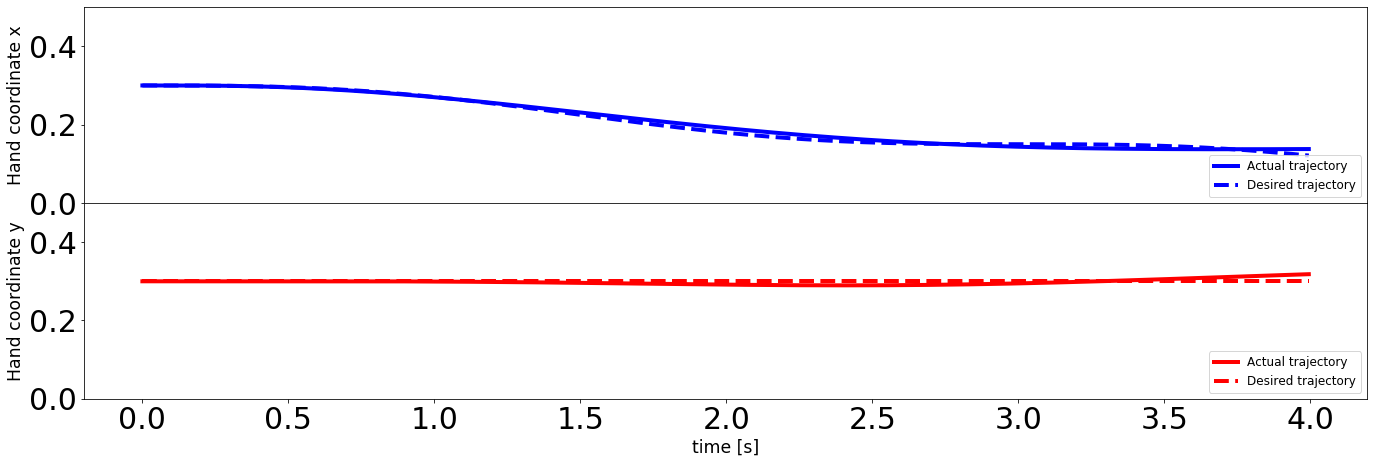

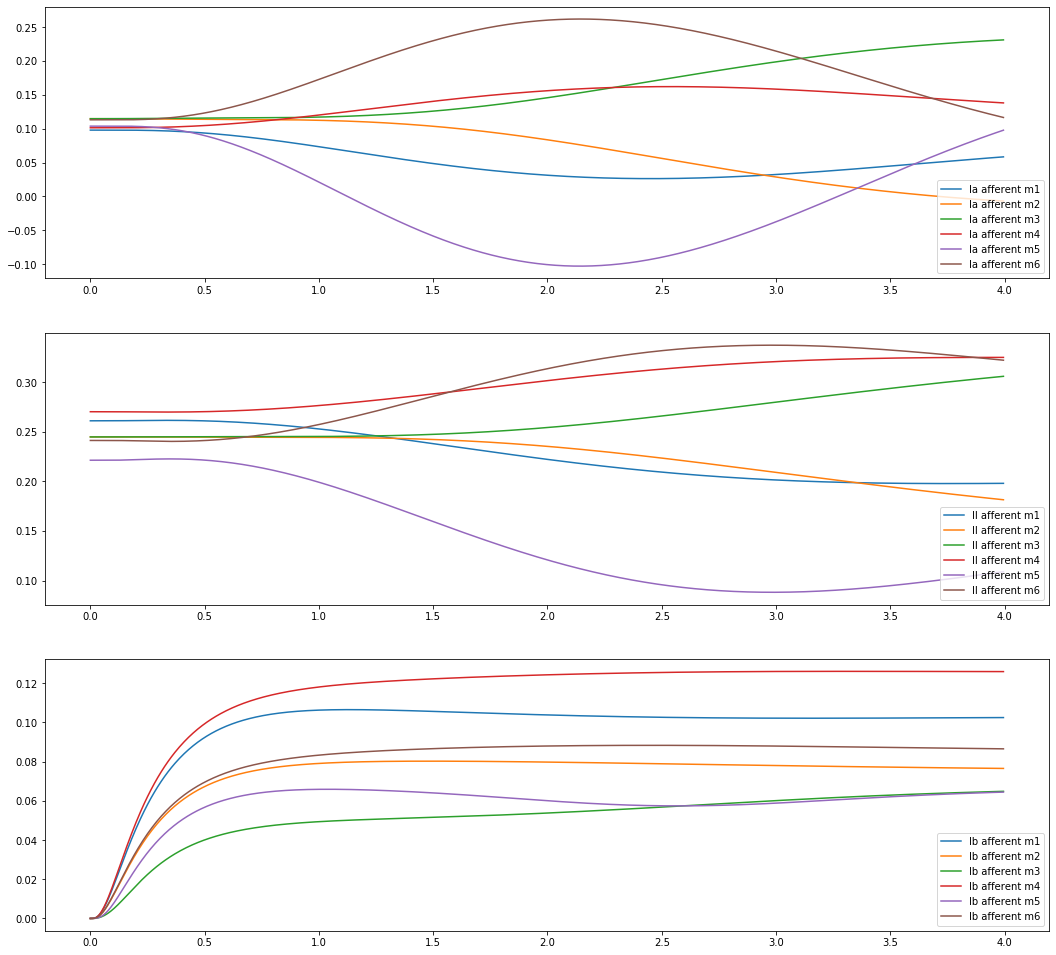

[[2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, -0.5671615786499182, 0.3014943921810267, -0.37499871470057516, -0.4669053118611041, 0.36009839256757886, 0.36086942261974503, -0.4891761992052648, -0.5082379205335067, 0.3368759746352898, 0.5047829728710416, 0.31713244246750893, -0.3774815384760815, 0.39687946596517654, 0.6392844387905734, -0.42176405673791995, -0.555469254119539], [2.5, 2.5, 0.053056356320674514, 2.3915890404699183, -2.308233961108603, -1.8559271629749419, 0.5022805758184337, 0.41766896896555294, 0.5640338279798918, 0.5136541406416392, -0.6220735757260787, -0.35523772817980376, 0.44401495413925196], [-2.5, 2.5, -2.5, 2.5, 2.5, 2.3916705547275723, 2.1252145802525275, 1.0318966470726676, -0.30878844215321216, 0.652874650350254, -0.48905633180148633, 0.38856361621774765, 0.3810889862773382, 0.33022299861990345, 0.6810271952951994, 0.6516671627479715, 0.4991002609262955], [1.5, -1.5, 1.5, 1.5, -0.15431557827697517, 0.05574811591471329, 0.4744845

Initial state. unit 0 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, -0.5671615786499182, 0.3014943921810267, -0.37499871470057516, -0.4669053118611041, 0.36009839256757886, 0.36086942261974503, -0.4891761992052648, -0.5082379205335067, 0.3368759746352898, 0.5047829728710416, 0.31713244246750893, -0.3774815384760815, 0.39687946596517654, 0.6392844387905734, -0.42176405673791995, -0.555469254119539]
uid:0, sid:0, e1:0.073667, e2:0.073667, e3:0.073667
change. unit 0 test syns: : [3.0, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, -0.5671615786499182, 0.3014943921810267, -0.37499871470057516, -0.4669053118611041, 0.36009839256757886, 0.36086942261974503, -0.4891761992052648, -0.5082379205335067, 0.3368759746352898, 0.5047829728710416, 0.31713244246750893, -0.3774815384760815, 0.39687946596517654, 0.6392844387905734, -0.42176405673791995, -0.555469254119539]
uid:0, sid:1, e1:0.073667, e2:0.073667, e3:0.073667
change. unit 

uid:0, sid:16, e1:0.073667, e2:0.073667, e3:0.073667
change. unit 0 test syns: : [3.0, -2.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.8014943921810267, -0.8749987147005751, -0.4669053118611041, 0.36009839256757886, 0.36086942261974503, -0.4891761992052648, -0.5082379205335067, 0.3368759746352898, 0.5047829728710416, 0.31713244246750893, -0.3774815384760815, 0.39687946596517654, 0.6392844387905734, -0.42176405673791995, -0.555469254119539]
uid:0, sid:17, e1:0.073667, e2:0.073667, e3:0.073667
change. unit 0 test syns: : [3.0, -2.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.8014943921810267, -0.8749987147005751, -0.9669053118611042, 0.36009839256757886, 0.36086942261974503, -0.4891761992052648, -0.5082379205335067, 0.3368759746352898, 0.5047829728710416, 0.31713244246750893, -0.3774815384760815, 0.39687946596517654, 0.6392844387905734, -0.42176405673791995, -0.555469254119539]
uid:0, sid:18, e1:0.

uid:1, sid:4, e1:0.073658, e2:0.073658, e3:0.073657
change. unit 1 test syns: : [3.0, 3.0, 0.5530563563206745, 2.8915890404699183, -2.808233961108603, -1.8559271629749419, 0.5022805758184337, 0.41766896896555294, 0.5640338279798918, 0.5136541406416392, -0.6220735757260787, -0.35523772817980376, 0.44401495413925196]
uid:1, sid:5, e1:0.073657, e2:0.073657, e3:0.073657
change. unit 1 test syns: : [3.0, 3.0, 0.5530563563206745, 2.8915890404699183, -2.808233961108603, -2.355927162974942, 0.5022805758184337, 0.41766896896555294, 0.5640338279798918, 0.5136541406416392, -0.6220735757260787, -0.35523772817980376, 0.44401495413925196]
uid:1, sid:6, e1:0.073657, e2:0.073658, e3:0.074272
change. unit 1 test syns: : [3.0, 3.0, 0.5530563563206745, 2.8915890404699183, -2.808233961108603, -2.355927162974942, 0.5022805758184337, 0.41766896896555294, 0.5640338279798918, 0.5136541406416392, -0.6220735757260787, -0.35523772817980376, 0.44401495413925196]
uid:1, sid:7, e1:0.073657, e2:0.073658, e3:0.074272

uid:2, sid:15, e1:0.073656, e2:0.073656, e3:0.073656
change. unit 2 test syns: : [-2.0, 3.0, -2.0, 3.0, 3.0, 2.8916705547275723, 2.6252145802525275, 1.5318966470726676, -0.30878844215321216, 1.152874650350254, -0.48905633180148633, 0.8885636162177477, 0.8810889862773382, 0.8302229986199035, 1.1810271952951994, 1.1516671627479715, 0.4991002609262955]
uid:2, sid:16, e1:0.073656, e2:0.161175, e3:0.343017
change. unit 2 test syns: : [-2.0, 3.0, -2.0, 3.0, 3.0, 2.8916705547275723, 2.6252145802525275, 1.5318966470726676, -0.30878844215321216, 1.152874650350254, -0.48905633180148633, 0.8885636162177477, 0.8810889862773382, 0.8302229986199035, 1.1810271952951994, 1.1516671627479715, 0.4991002609262955]
Initial state. unit 3 test syns: : [1.5, -1.5, 1.5, 1.5, -0.15431557827697517, 0.05574811591471329, 0.4744845389701515, -0.34023069523347477, 0.326198272930038, -0.5603292139008557, -0.5064846877495385, 0.6028110469364787, -0.6772893791527519, -0.6083950926558988, -0.5323326425964305]
uid:3, sid

uid:4, sid:7, e1:0.073340, e2:0.073352, e3:0.073359
change. unit 4 test syns: : [2.0, -1.5562255535388942, 1.132263501148206, 0.2696761449625127, -0.20327992907974446, -0.9482918713325923, 0.4155308841280585, -0.3019139160353692, 0.46724068161106735, 0.6940400320819403, -0.6073243934402566]
uid:4, sid:8, e1:0.073340, e2:0.073352, e3:0.073359
change. unit 4 test syns: : [2.0, -1.5562255535388942, 1.132263501148206, 0.2696761449625127, -0.20327992907974446, -0.9482918713325923, 0.4155308841280585, -0.30191391603536927, 0.46724068161106735, 0.6940400320819403, -0.6073243934402566]
uid:4, sid:9, e1:0.073340, e2:0.073720, e3:0.073481
change. unit 4 test syns: : [2.0, -1.5562255535388942, 1.132263501148206, 0.2696761449625127, -0.20327992907974446, -0.9482918713325923, 0.4155308841280585, -0.30191391603536927, 0.46724068161106735, 0.6940400320819403, -0.6073243934402566]
uid:4, sid:10, e1:0.073340, e2:0.089005, e3:0.077460
change. unit 4 test syns: : [2.0, -1.5562255535388942, 1.132263501148

uid:5, sid:10, e1:0.073340, e2:0.073340, e3:0.073340
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -0.6777900559687428, -0.5729188593765748, 0.6871048526910315, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, -0.600744837225469, -0.5051730667822435, 0.3803502039711536, 0.5842172419475091, -0.4477649111551424, 0.6863224500106241, 0.5638802856589493]
uid:5, sid:11, e1:0.073340, e2:0.073340, e3:0.073340
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 1.8814449807709774, 0.6049

uid:5, sid:22, e1:0.073340, e2:0.073340, e3:0.073340
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -1.1777900559687429, -1.0729188593765748, 0.6871048526910315, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, -0.600744837225469, -0.5051730667822435, 0.3803502039711536, 0.5842172419475091, -0.4477649111551424, 0.6863224500106241, 0.5638802856589493]
uid:5, sid:23, e1:0.073340, e2:0.073340, e3:0.073340
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049

uid:5, sid:34, e1:0.073340, e2:0.073340, e3:0.073340
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -1.1777900559687429, -1.0729188593765748, 0.1871048526910315, 0.32391950023371496, -1.1967930752225588, -0.9663040521155029, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, -0.600744837225469, -0.5051730667822434, 0.3803502039711536, 0.5842172419475091, -0.4477649111551424, 0.6863224500106241, 0.5638802856589493]
uid:5, sid:35, e1:0.073340, e2:0.073340, e3:0.073340
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049

uid:6, sid:12, e1:0.072933, e2:0.176057, e3:0.393960
change. unit 6 test syns: : [2.0, 3.0, 1.7957822835567758, -1.5448621890560528, 2.2322155041832112, -1.6433301113364074, 0.6412099328407679, -0.008431011419863521, 0.17741351429812247, -0.0020163289652802563, 0.18579820820957416, -0.5278512561601589, 0.3377601083229893]
Initial state. unit 7 test syns: : [-1.5, 2.0, -1.5, 1.5, -1.5, -1.5, 1.189506129618911, -0.10112543938806606, 0.3637496404446541, 0.3805287123128806, 0.015057162646764766, 0.46016792838220183, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -0.0037987958821298073]
uid:7, sid:0, e1:0.072933, e2:0.072933, e3:0.072933
change. unit 7 test syns: : [-1.0, 2.0, -1.5, 1.5, -1.5, -1.5, 1.189506129618911, -0.10112543938806606, 0.3637496404446541, 0.3805287123128806, 0.015057162646764766, 0.46016792838220183, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.1

uid:8, sid:0, e1:0.072679, e2:0.072679, e3:0.072679
change. unit 8 test syns: : [1.5, -1.5, 1.5, 1.5, 1.5, 1.1957285161727964, -0.04400502570595943, -0.5802072880589293, -0.3451087523694581, 0.34539638555377594, -0.6642288057541952, -0.6699174660685504, -0.4645319472530756, -0.33721578462897345, 0.4328781616118666, 0.5829756725808825, -0.4594204512975085]
uid:8, sid:1, e1:0.072679, e2:0.072679, e3:0.072679
change. unit 8 test syns: : [1.5, -1.5, 1.5, 1.5, 1.5, 1.1957285161727964, -0.04400502570595943, -0.5802072880589293, -0.3451087523694581, 0.34539638555377594, -0.6642288057541952, -0.6699174660685504, -0.4645319472530756, -0.33721578462897345, 0.4328781616118666, 0.5829756725808825, -0.4594204512975085]
uid:8, sid:2, e1:0.072679, e2:0.072679, e3:0.072679
change. unit 8 test syns: : [1.5, -1.5, 1.5, 1.5, 1.5, 1.1957285161727964, -0.04400502570595943, -0.5802072880589293, -0.3451087523694581, 0.34539638555377594, -0.6642288057541952, -0.6699174660685504, -0.4645319472530756, -0.337215

uid:9, sid:5, e1:0.072629, e2:0.072638, e3:0.072621
change. unit 9 test syns: : [2.0, -1.3684665963161868, 0.8112507817961032, -1.051094245353302, 1.0024285613737622, -1.1166528326705385, -0.01549535186883011, -0.4327493561324719, 0.47049714616858174, -0.6860879910788547, 0.5335459196683411, -0.6386834974775626, 0.3979840524539761, 0.42776733986117854, -0.3568901822060949]
uid:9, sid:6, e1:0.072621, e2:0.072703, e3:0.072592
change. unit 9 test syns: : [2.0, -1.3684665963161868, 0.8112507817961032, -1.051094245353302, 1.0024285613737622, -1.1166528326705385, -0.5154953518688301, -0.4327493561324719, 0.47049714616858174, -0.6860879910788547, 0.5335459196683411, -0.6386834974775626, 0.3979840524539761, 0.42776733986117854, -0.3568901822060949]
uid:9, sid:7, e1:0.072592, e2:0.072584, e3:0.072597
change. unit 9 test syns: : [2.0, -1.3684665963161868, 0.8112507817961032, -1.051094245353302, 1.0024285613737622, -1.1166528326705385, -0.5154953518688301, 0.0672506438675281, 0.47049714616858174,

uid:10, sid:6, e1:0.072584, e2:0.207482, e3:0.174449
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -2.0, -1.5, 1.5, 1.5, 1.5, 1.5, -1.5, 0.10618187553413261, 0.08723044609776087, -1.5, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015]
uid:10, sid:7, e1:0.072584, e2:0.102498, e3:0.107762
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -2.0, -1.5, 1.5, 1.5, 1.5, 1.5, -1.5, 0.10618187553413261, 0.08723044609776087, -1.5, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.129912746485

uid:10, sid:18, e1:0.072575, e2:1.072349, e3:0.085121
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -2.0, -1.5, 1.5, 1.5, 1.5, 2.0, -1.5, 0.10618187553413261, 0.08723044609776087, -1.0, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015]
uid:10, sid:19, e1:0.072575, e2:0.075290, e3:0.574935
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -2.0, -1.5, 1.5, 1.5, 1.5, 2.0, -1.5, 0.10618187553413261, 0.08723044609776087, -1.0, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.1299127464

uid:10, sid:30, e1:0.072575, e2:0.851875, e3:0.206537
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -2.0, -1.5, 1.5, 1.5, 1.5, 2.0, -1.5, 0.10618187553413261, 0.08723044609776087, -1.0, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362918, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015]
uid:10, sid:31, e1:0.072575, e2:2.231594, e3:0.699155
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -2.0, -1.5, 1.5, 1.5, 1.5, 2.0, -1.5, 0.10618187553413261, 0.08723044609776087, -1.0, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.1299127464

uid:11, sid:2, e1:0.072561, e2:0.072584, e3:0.072544
change. unit 11 test syns: : [3.0, 2.0, 1.0888920733214045, -0.041391891053228935, 1.8513505471747034, 2.2960170699158104, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.6339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.03226856391850261]
uid:11, sid:3, e1:0.072544, e2:0.077242, e3:0.072544
change. unit 11 test syns: : [3.0, 2.0, 1.0888920733214045, -0.041391891053228935, 1.8513505471747034, 2.2960170699158104, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.6339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.03226856391850261]
uid:11, sid:4, e1:0.072544, e2:0.072585, e3:0.072519
change. unit 11 test syns: : [3.0, 2.0, 1.0888920733214045, -0.041391891053228935, 1.3513505471747034, 2.2960170699158104, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.6339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.03226856391850261]
uid:11, sid:5, e

uid:12, sid:11, e1:0.072440, e2:0.073359, e3:0.072525
change. unit 12 test syns: : [-2.0, -2.0, 3.0, 3.0, -2.0, -2.0, 2.065957514084636, 2.1889389670608326, 2.627487939456195, 0.1027960834411803, -0.017342944909622182, -0.09508084388186455, 0.14314107416456856, -0.5205073584638849, -0.3556773407608492, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822, -0.14729596148185867]
uid:12, sid:12, e1:0.072440, e2:0.073359, e3:0.072525
change. unit 12 test syns: : [-2.0, -2.0, 3.0, 3.0, -2.0, -2.0, 2.065957514084636, 2.1889389670608326, 2.627487939456195, 0.1027960834411803, -0.017342944909622182, -0.09508084388186458, 0.14314107416456856, -0.5205073584638849, -0.3556773407608492, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822, -0.14729596148185867]
uid:12, sid:13, e1:0.072440, e2:0.072434, e3:0.072442
change. unit 12 test syns: : [-2.0, -2.0, 3.0, 3.0, -2.0, -2.0, 2.065957514084636, 2.1889389670608326, 2.627487939456195, 0.1027960834411803, -0.017342944909622182, -

uid:13, sid:14, e1:0.072406, e2:0.072406, e3:0.072406
change. unit 13 test syns: : [-1.0, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -0.5255375321934372, -1.4077484943606247, 0.8936313993682629, -0.9866377086557205, -0.31309830325761306, -0.4374429235854562, -0.3053216462836495, -0.3493512306247863, 1.0016592199893637, 0.6424804052554313, -0.6727572734521471]
uid:13, sid:15, e1:0.072406, e2:0.072406, e3:0.072406
change. unit 13 test syns: : [-1.0, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -0.5255375321934372, -1.4077484943606247, 0.8936313993682629, -0.9866377086557205, -0.31309830325761306, -0.4374429235854562, -0.3053216462836495, -0.3493512306247863, 1.0016592199893637, 0.6424804052554313, -0.6727572734521471]
uid:13, sid:16, e1:0.072406, e2:0.072406, e3:0.072406
change. unit 13 test syns: : [-1.0, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -0.5255375321934372, -1.4077484943606247, 0.8936313993682629, -0.9866377086557205, -0.31309830325761306, -0.4374429235854562, -0.3053216462836495, -0

uid:15, sid:2, e1:0.072220, e2:0.072220, e3:0.072220
change. unit 15 test syns: : [-2.0, -2.0, 2.0, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, -1.5927584182177, -0.4267510039273526, -0.36376713377530495, 0.556992213834325, 0.49751589253961126, -0.5158459285667423, -0.47207476124606257, 0.5948650113120095, 0.4903886130141438, 0.4509754111675545, 0.4501210014809641, -0.657651775375515, 0.574922619046688, 0.31858467518791156, -0.6340915478297486, -0.5395300675553558]
uid:15, sid:3, e1:0.072220, e2:0.072220, e3:0.072220
change. unit 15 test syns: : [-2.0, -2.0, 2.0, 2.0, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, -1.5927584182177, -0.4267510039273526, -0.36376713377530495, 0.556992213834325, 0.49751589253961126, -0.5158459285667423, -0.47207476124606257, 0.5948650113120095, 0.4903886130141438, 0.4509754111675545, 0.4501210014809641, -0.657651775375515, 0.574922619046688, 0.31858467518791156, -0.6340915478297486, -0.5395300675553558]
uid:15, sid:4, e1:0.072220, e2

uid:15, sid:19, e1:0.072220, e2:0.072220, e3:0.072220
change. unit 15 test syns: : [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -1.0927584182177, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742273, -0.47207476124606257, 0.5948650113120095, 0.4903886130141438, 0.4509754111675545, 0.4501210014809641, -0.657651775375515, 0.574922619046688, 0.31858467518791156, -0.6340915478297486, -0.5395300675553558]
uid:15, sid:20, e1:0.072220, e2:0.072220, e3:0.072220
change. unit 15 test syns: : [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -1.0927584182177, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742273, 0.027925238753937487, 0.5948650113120095, 0.4903886130141438, 0.4509754111675545, 0.4501210014809641, -0.657651775375515, 0.574922619046688, 0.31858467518791156, -0.6340915478297486, -0.5395300675553558]
uid:15, sid:21, 

uid:16, sid:8, e1:0.071540, e2:0.071540, e3:0.071540
change. unit 16 test syns: : [2.0, 2.0, -0.23141752983194142, 0.16647299779995972, 1.7466237958571407, -0.16670131602933935, -0.04147788719918655, -0.181182602621066, -1.1729128864913447, 0.5471692640407427, -0.3971322469026651, -0.5053794613141698, -0.5804623435688238]
uid:16, sid:9, e1:0.071540, e2:0.071887, e3:0.071702
change. unit 16 test syns: : [2.0, 2.0, -0.23141752983194142, 0.16647299779995972, 1.7466237958571407, -0.16670131602933935, -0.04147788719918655, -0.181182602621066, -1.1729128864913447, 0.5471692640407427, -0.3971322469026651, -0.5053794613141698, -0.5804623435688238]
uid:16, sid:10, e1:0.071540, e2:0.071887, e3:0.071702
change. unit 16 test syns: : [2.0, 2.0, -0.23141752983194142, 0.16647299779995972, 1.7466237958571407, -0.16670131602933935, -0.04147788719918655, -0.181182602621066, -1.1729128864913447, 0.5471692640407427, -0.397132246902665, -0.5053794613141698, -0.5804623435688238]
uid:16, sid:11, e1:0.071540,

uid:18, sid:0, e1:0.071518, e2:0.071518, e3:0.071518
change. unit 18 test syns: : [-2.0, 2.5, 2.5, 2.5, -0.6830906363262619, 2.3241447382919223, -1.9819366614734686, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, 0.31912574629136203, -0.6473544374792053, 0.6753739071291067, -0.6581501852682634, -0.08971340374189994]
uid:18, sid:1, e1:0.071518, e2:0.071518, e3:0.071518
change. unit 18 test syns: : [-2.0, 2.0, 2.5, 2.5, -0.6830906363262619, 2.3241447382919223, -1.9819366614734686, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, 0.31912574629136203, -0.6473544374792053, 0.6753739071291067, -0.6581501852682634, -0.08971340374189994]
uid:18, sid:2, e1:0.071518, e2:0.071518, e3:0.071518
change. unit 18 test syns: : [-2.0, 2.0, 2.5, 2.5, -0.6830906363262619, 2.3241447382919223, -1.9819366614734686, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, 0.31912574629136203, -0.6473544374792053, 0.6753739071291067, -0.6581501852682634, -0.08971340374189994]
u

uid:19, sid:10, e1:0.070713, e2:0.132725, e3:0.106119
change. unit 19 test syns: : [3.0, 1.393985932109905, 1.3921520793190307, 1.391775012981117, -0.8829139226126661, 0.33859019478084407, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, -0.18004040625095885]
Initial state. unit 20 test syns: : [1.5, -1.5, -1.5, 1.5, 2.5, -1.5, -1.5, 1.5, 1.5, 1.5, -1.5, 0.3014692157564789, 1.4710032376503226, -1.5, 1.3371200427756724, 0.5471434958222976, 1.2149654801655982, -1.5, 0.959077195591886, -1.0900608592055114, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484]
uid:20, sid:0, e1:0.070713

uid:20, sid:10, e1:0.070278, e2:0.069758, e3:0.072053
change. unit 20 test syns: : [1.5, -1.0, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -1.0, 0.3014692157564789, 1.4710032376503226, -1.5, 1.3371200427756724, 0.5471434958222976, 1.2149654801655982, -1.5, 0.959077195591886, -1.0900608592055114, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484]
uid:20, sid:11, e1:0.069758, e2:0.089612, e3:0.079312
change. unit 20 test syns: : [1.5, -1.0, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -1.0, 0.3014692157564789, 1.4710032376503226, -1.5, 1.3371200427756724, 0.5471434958222976, 1.2149654801655982, -1.5, 0.959077195591886,

uid:20, sid:22, e1:0.069559, e2:2.172314, e3:0.242479
change. unit 20 test syns: : [1.5, -1.0, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -1.0, 0.3014692157564789, 1.4710032376503226, -2.0, 1.3371200427756724, 0.5471434958222976, 1.7149654801655982, -1.0, 0.459077195591886, -1.0900608592055114, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484]
uid:20, sid:23, e1:0.069559, e2:0.179449, e3:0.613422
change. unit 20 test syns: : [1.5, -1.0, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -1.0, 0.3014692157564789, 1.4710032376503226, -2.0, 1.3371200427756724, 0.5471434958222976, 1.7149654801655982, -1.0, 0.459077195591886,

uid:20, sid:34, e1:0.069559, e2:0.179449, e3:0.613422
change. unit 20 test syns: : [1.5, -1.0, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -1.0, 0.3014692157564789, 1.4710032376503226, -2.0, 1.3371200427756724, 0.5471434958222976, 1.7149654801655982, -1.0, 0.459077195591886, -1.0900608592055114, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484]
uid:20, sid:35, e1:0.069559, e2:0.179449, e3:0.613422
change. unit 20 test syns: : [1.5, -1.0, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -1.0, 0.3014692157564789, 1.4710032376503226, -2.0, 1.3371200427756724, 0.5471434958222976, 1.7149654801655982, -1.0, 0.459077195591886,

uid:21, sid:12, e1:0.069557, e2:0.158461, e3:0.096969
change. unit 21 test syns: : [1.0, 3.0, 1.1520374527573916, 1.083739735748582, 2.1369191005063355, 1.884772991678382, 1.059021334489366, 1.0277798099622828, 1.0298633255087544, 1.1525343826894248, 0.8521215095933494, 0.9255174837880125, 0.09638962594040928]
Initial state. unit 22 test syns: : [-1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 0.09413559708185293, -0.8814126740529638, 1.2514208076190805, 0.5142984688061863, -0.694486229339982, 0.6016239777574776, -0.4616632976490867, 0.4669932871820303, 0.6181615743730274, -0.36816932333828206, 0.4861896994940759, -0.5777207809619849, -0.5264034916365334]
uid:22, sid:0, e1:0.069557, e2:0.069557, e3:0.069557
change. unit 22 test syns: : [-1.0, 1.5, -1.5, 1.5, -1.5, -1.5, 0.09413559708185293, -0.8814126740529638, 1.2514208076190805, 0.5142984688061863, -0.694486229339982, 0.6016239777574776, -0.4616632976490867, 0.4669932871820303, 0.6181615743730274, -0.36816932333828206, 0.4861896994940759, -0.57772

uid:23, sid:0, e1:0.069556, e2:0.069556, e3:0.069556
change. unit 23 test syns: : [1.5, -1.5, 1.5, 1.5, 1.5, -0.868078498324762, 0.08819015020155252, 0.8473236163761904, -0.30953127361948923, 0.39848616413343185, -0.4747895331696267, -0.3016747679101954, -0.4281472292319018, 0.6638802901600158, -0.6178812651641038, -0.6306669294494955, -0.5832802334863249]
uid:23, sid:1, e1:0.069556, e2:0.069556, e3:0.069556
change. unit 23 test syns: : [1.5, -1.0, 1.5, 1.5, 1.5, -0.868078498324762, 0.08819015020155252, 0.8473236163761904, -0.30953127361948923, 0.39848616413343185, -0.4747895331696267, -0.3016747679101954, -0.4281472292319018, 0.6638802901600158, -0.6178812651641038, -0.6306669294494955, -0.5832802334863249]
uid:23, sid:2, e1:0.069556, e2:0.069556, e3:0.069556
change. unit 23 test syns: : [1.5, -1.0, 1.5, 1.5, 1.5, -0.868078498324762, 0.08819015020155252, 0.8473236163761904, -0.30953127361948923, 0.39848616413343185, -0.4747895331696267, -0.3016747679101954, -0.4281472292319018, 0.6638

uid:24, sid:5, e1:0.069533, e2:0.069533, e3:0.069533
change. unit 24 test syns: : [2.0, -0.23301791013153217, 0.4897561346948027, -0.8677161183176514, -2.4731475258489364, 2.680118584056915, 0.8068552754938736, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.08857752939243176]
uid:24, sid:6, e1:0.069533, e2:0.069545, e3:0.069554
change. unit 24 test syns: : [2.0, -0.23301791013153217, 0.4897561346948027, -0.8677161183176514, -2.4731475258489364, 2.680118584056915, 0.8068552754938736, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.08857752939243176]
uid:24, sid:7, e1:0.069533, e2:0.070913, e3:0.070463
change. unit 24 test syns: : [2.0, -0.23301791013153217, 0.4897561346948027, -0.8677161183176514, -2.4731475258489364, 2.680118584056915, 0.8068552754938736, 0.1901716623895946, -0.11121831

uid:25, sid:6, e1:0.069533, e2:0.069533, e3:0.069533
change. unit 25 test syns: : [-2.5, -2.0, 2.0, 2.5, -1.0, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, 2.1377018457966908, -0.5673926597414096, -0.4183009729500266, 0.6259534365745518, 0.6825538599927634, -0.3737339649219445, -0.6922793923235998, 0.38892748820467554, 0.6618831574780205, 0.5231897488464103, 0.47192210186959377, -0.5285788856067216, 0.5105125371055976, 0.4007120950973916, -0.33855055973201953, -0.49493606086866654, 0.6741195210286743, -0.5298402013118291, -0.4668189963573553, -0.3293235434338268, 0.32573578881079135]
uid:25, sid:7, e1:0.069533, e2:0.069533, e3:0.069533
change. unit 25 test syns: : [-2.5, -2.0, 2.0, 2.5, -1.0, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, 2.137701845

uid:25, sid:18, e1:0.069533, e2:0.069533, e3:0.069533
change. unit 25 test syns: : [-2.5, -2.0, 2.0, 2.5, -1.0, -2.5, 2.5, 2.5, 2.5, 3.0, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, 2.1377018457966908, -0.5673926597414096, -0.4183009729500266, 0.6259534365745518, 0.6825538599927634, -0.3737339649219445, -0.6922793923235998, 0.38892748820467554, 0.6618831574780205, 0.5231897488464103, 0.47192210186959377, -0.5285788856067216, 0.5105125371055976, 0.4007120950973916, -0.33855055973201953, -0.49493606086866654, 0.6741195210286743, -0.5298402013118291, -0.4668189963573553, -0.3293235434338268, 0.32573578881079135]
uid:25, sid:19, e1:0.069533, e2:0.069533, e3:0.069533
change. unit 25 test syns: : [-2.5, -2.0, 2.0, 2.5, -1.0, -2.5, 2.5, 2.5, 2.5, 3.0, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, 2.1377018

uid:25, sid:30, e1:0.069533, e2:0.069533, e3:0.069533
change. unit 25 test syns: : [-2.5, -2.0, 2.0, 2.5, -1.0, -2.5, 2.5, 2.5, 2.5, 3.0, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, 2.1377018457966908, -0.06739265974140962, 0.0816990270499734, 0.12595343657455182, 0.1825538599927634, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.02318974884641034, -0.02807789813040623, -0.028578885606721727, 0.5105125371055976, 0.4007120950973916, -0.33855055973201953, -0.49493606086866654, 0.6741195210286743, -0.5298402013118291, -0.4668189963573553, -0.3293235434338268, 0.32573578881079135]
uid:25, sid:31, e1:0.069533, e2:0.069533, e3:0.069533
change. unit 25 test syns: : [-2.5, -2.0, 2.0, 2.5, -1.0, -2.5, 2.5, 2.5, 2.5, 3.0, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, 2.13

uid:26, sid:3, e1:0.069444, e2:0.070405, e3:0.071045
change. unit 26 test syns: : [2.0, 1.0, 0.8024008172969803, 1.3262496910613417, -2.0347140969461557, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.5962309103195707, -0.062128835047673164, 0.07986235687947951]
uid:26, sid:4, e1:0.069444, e2:0.069447, e3:0.069441
change. unit 26 test syns: : [2.0, 1.0, 0.8024008172969803, 1.3262496910613417, -2.5347140969461557, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.5962309103195707, -0.062128835047673164, 0.07986235687947951]
uid:26, sid:5, e1:0.069441, e2:0.069837, e3:0.070076
change. unit 26 test syns: : [2.0, 1.0, 0.8024008172969803, 1.3262496910613417, -2.5347140969461557, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.5962309103195707, -0.062128835047673164, 0.07986235687947951]
uid:26, sid:6, e1:0.069441, e2:0.0

uid:27, sid:12, e1:0.069290, e2:0.076111, e3:0.071053
change. unit 27 test syns: : [-2.0, -2.0, 2.5, 3.0, -1.0, -2.0, -0.21989375971126712, 2.4409018704514502, 2.9607209400928842, 0.3970551066605787, 0.5719545805418815, 0.04425608542708451, -0.15853633764538733, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, 0.03572139821834802]
uid:27, sid:13, e1:0.069290, e2:0.071180, e3:0.070921
change. unit 27 test syns: : [-2.0, -2.0, 2.5, 3.0, -1.0, -2.0, -0.21989375971126712, 2.4409018704514502, 2.9607209400928842, 0.3970551066605787, 0.5719545805418815, 0.04425608542708451, -0.15853633764538735, 0.0338591583931519, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, 0.03572139821834802]
uid:27, sid:14, e1:0.069290, e2:0.071180, e3:0.070921
change. unit 27 test syns: : [-2.0, -2.0, 2.5, 3.0, -1.0, -2.0, -0.21989375971126712, 2.4409018704514502, 2.9607209400928842, 0.3970551066605787, 0.5719545805418815,

uid:28, sid:15, e1:0.068940, e2:0.092412, e3:0.541166
change. unit 28 test syns: : [-1.0, 1.0, 1.5, 1.5, 2.0, -0.186299249869736, 0.9972566011659101, 1.4406258646931942, 0.4271177977626887, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.19387091411302132]
uid:28, sid:16, e1:0.068940, e2:0.301081, e3:0.622586
change. unit 28 test syns: : [-1.0, 1.0, 1.5, 1.5, 2.0, -0.186299249869736, 0.9972566011659101, 1.4406258646931942, 0.4271177977626887, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.19387091411302132]
Initial state. unit 29 test syns: : [2.5, -1.133812867426503, -1.6754979409481874, -2.0288241210635007, -1.36531079087646, 2.307062274537008, -2.256091634823725, 0.6546564579368124, -0.46067269120917437, -0.42467767111627797, -0.4694214650982186, -0.3152031064617331, 0.4521738012

Iteration: 2
Error: 0.06887203180190216
Execution time: 68849.98659729958 seconds


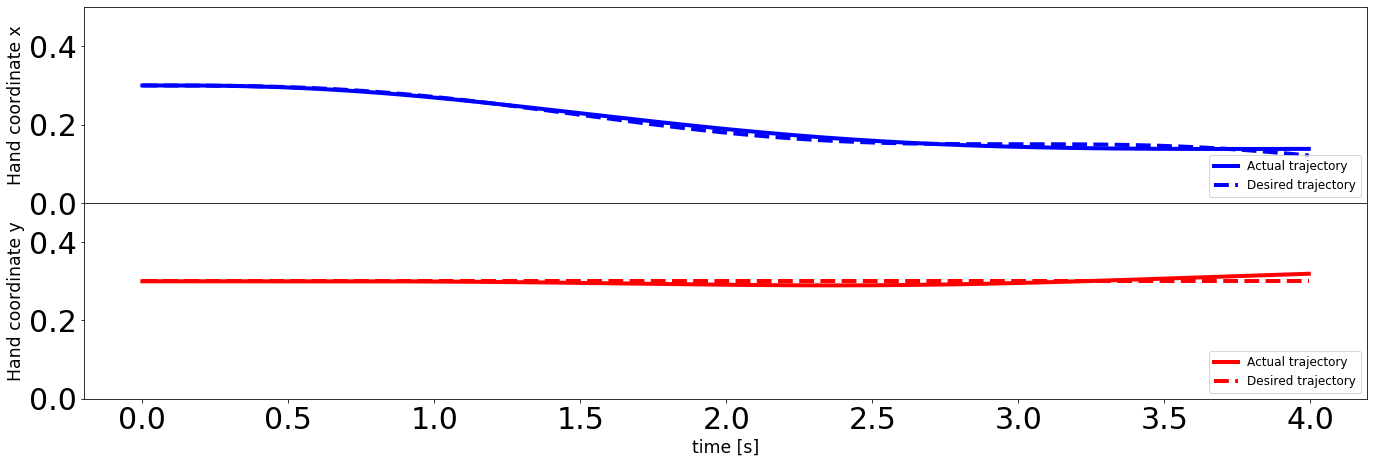

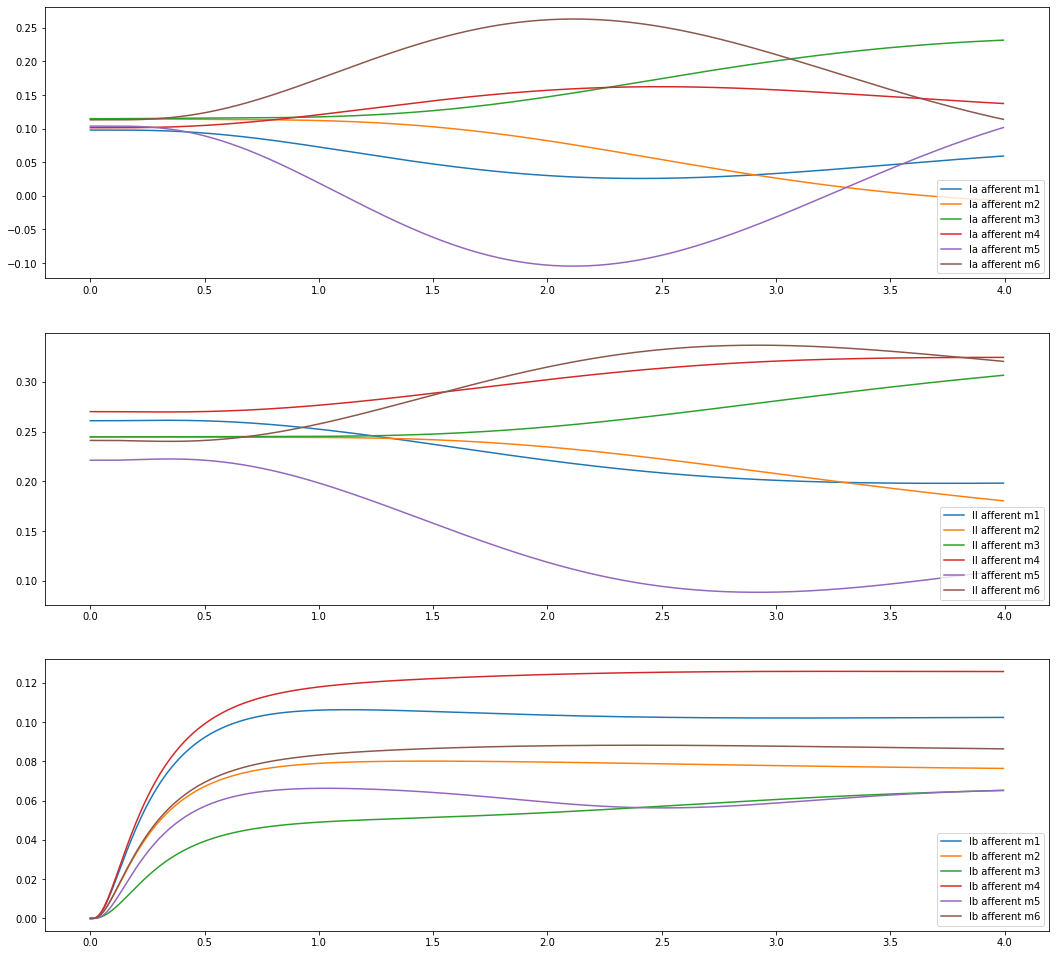

[[3.0, -2.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.8014943921810267, -0.8749987147005751, -0.9669053118611042, 0.8600983925675789, 0.8608694226197451, -0.9891761992052648, -1.0082379205335066, 0.8368759746352898, 1.0047829728710416, 0.31713244246750893, -0.8774815384760815, 0.8968794659651765, 0.6392844387905734, -0.42176405673791995, -0.555469254119539], [3.0, 3.0, 0.5530563563206745, 2.8915890404699183, -2.808233961108603, -2.355927162974942, 0.5022805758184337, 0.41766896896555294, 0.5640338279798918, 0.5136541406416392, -1.1220735757260787, -0.8552377281798038, 0.44401495413925196], [-2.0, 3.0, -2.0, 3.0, 3.0, 2.8916705547275723, 2.6252145802525275, 1.5318966470726676, -0.30878844215321216, 1.152874650350254, -0.48905633180148633, 0.8885636162177477, 0.8810889862773382, 0.8302229986199035, 1.1810271952951994, 1.1516671627479715, 0.4991002609262955], [1.5, -2.0, 1.5, 1.5, 0.3456844217230248, -0.4442518840852867, -0.025515461029848474

Initial state. unit 0 test syns: : [3.0, -2.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.8014943921810267, -0.8749987147005751, -0.9669053118611042, 0.8600983925675789, 0.8608694226197451, -0.9891761992052648, -1.0082379205335066, 0.8368759746352898, 1.0047829728710416, 0.31713244246750893, -0.8774815384760815, 0.8968794659651765, 0.6392844387905734, -0.42176405673791995, -0.555469254119539]
uid:0, sid:0, e1:0.068872, e2:0.068872, e3:0.068872
change. unit 0 test syns: : [3.0, -2.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.8014943921810267, -0.8749987147005751, -0.9669053118611042, 0.8600983925675789, 0.8608694226197451, -0.9891761992052648, -1.0082379205335066, 0.8368759746352898, 1.0047829728710416, 0.31713244246750893, -0.8774815384760815, 0.8968794659651765, 0.6392844387905734, -0.42176405673791995, -0.555469254119539]
uid:0, sid:1, e1:0.068872, e2:0.068872, e3:0.068872
change. unit 0 test s

uid:0, sid:16, e1:0.068872, e2:0.068872, e3:0.068872
change. unit 0 test syns: : [3.0, -2.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.6014943921810267, -0.6749987147005752, -0.9669053118611042, 0.8600983925675789, 0.8608694226197451, -0.9891761992052648, -1.0082379205335066, 0.8368759746352898, 1.0047829728710416, 0.31713244246750893, -0.8774815384760815, 0.8968794659651765, 0.6392844387905734, -0.42176405673791995, -0.555469254119539]
uid:0, sid:17, e1:0.068872, e2:0.068872, e3:0.068872
change. unit 0 test syns: : [3.0, -2.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.6014943921810267, -0.6749987147005752, -0.9669053118611042, 0.8600983925675789, 0.8608694226197451, -0.9891761992052648, -1.0082379205335066, 0.8368759746352898, 1.0047829728710416, 0.31713244246750893, -0.8774815384760815, 0.8968794659651765, 0.6392844387905734, -0.42176405673791995, -0.555469254119539]
uid:0, sid:18, e1:0.068872

uid:1, sid:4, e1:0.068865, e2:0.068865, e3:0.068865
change. unit 1 test syns: : [2.8, 3.2, 0.7530563563206745, 3.0915890404699184, -3.008233961108603, -2.355927162974942, 0.5022805758184337, 0.41766896896555294, 0.5640338279798918, 0.5136541406416392, -1.1220735757260787, -0.8552377281798038, 0.44401495413925196]
uid:1, sid:5, e1:0.068865, e2:0.068865, e3:0.068865
change. unit 1 test syns: : [2.8, 3.2, 0.7530563563206745, 3.0915890404699184, -3.008233961108603, -2.555927162974942, 0.5022805758184337, 0.41766896896555294, 0.5640338279798918, 0.5136541406416392, -1.1220735757260787, -0.8552377281798038, 0.44401495413925196]
uid:1, sid:6, e1:0.068865, e2:0.068836, e3:0.068961
change. unit 1 test syns: : [2.8, 3.2, 0.7530563563206745, 3.0915890404699184, -3.008233961108603, -2.555927162974942, 0.7022805758184336, 0.41766896896555294, 0.5640338279798918, 0.5136541406416392, -1.1220735757260787, -0.8552377281798038, 0.44401495413925196]
uid:1, sid:7, e1:0.068836, e2:0.068828, e3:0.068865
cha

uid:2, sid:15, e1:0.068819, e2:0.068819, e3:0.068819
change. unit 2 test syns: : [-1.8, 2.8, -1.8, 2.8, 3.2, 3.0916705547275725, 2.8252145802525277, 1.7318966470726675, -0.10878844215321215, 1.352874650350254, -0.2890563318014863, 1.0885636162177477, 1.0810889862773383, 1.0302229986199034, 1.3810271952951994, 1.3516671627479715, 0.4991002609262955]
uid:2, sid:16, e1:0.068819, e2:0.111622, e3:0.127455
change. unit 2 test syns: : [-1.8, 2.8, -1.8, 2.8, 3.2, 3.0916705547275725, 2.8252145802525277, 1.7318966470726675, -0.10878844215321215, 1.352874650350254, -0.2890563318014863, 1.0885636162177477, 1.0810889862773383, 1.0302229986199034, 1.3810271952951994, 1.3516671627479715, 0.4991002609262955]
Initial state. unit 3 test syns: : [1.5, -2.0, 1.5, 1.5, 0.3456844217230248, -0.4442518840852867, -0.025515461029848474, 0.15976930476652523, -0.173801727069962, -0.06032921390085566, -0.006484687749538476, 1.1028110469364787, -0.6772893791527519, -0.6083950926558988, -0.5323326425964305]
uid:3, s

uid:4, sid:7, e1:0.068817, e2:0.068818, e3:0.068817
change. unit 4 test syns: : [1.8, -1.7562255535388942, 0.9322635011482061, 0.06967614496251268, -0.20327992907974446, -0.9482918713325923, 0.4155308841280585, -0.30191391603536927, 0.46724068161106735, 0.6940400320819403, -0.6073243934402566]
uid:4, sid:8, e1:0.068817, e2:0.068818, e3:0.068817
change. unit 4 test syns: : [1.8, -1.7562255535388942, 0.9322635011482061, 0.06967614496251268, -0.20327992907974446, -0.9482918713325923, 0.4155308841280585, -0.30191391603536927, 0.46724068161106735, 0.6940400320819403, -0.6073243934402566]
uid:4, sid:9, e1:0.068817, e2:0.068839, e3:0.068827
change. unit 4 test syns: : [1.8, -1.7562255535388942, 0.9322635011482061, 0.06967614496251268, -0.20327992907974446, -0.9482918713325923, 0.4155308841280585, -0.30191391603536927, 0.46724068161106735, 0.6940400320819403, -0.6073243934402566]
uid:4, sid:10, e1:0.068817, e2:0.069381, e3:0.069154
change. unit 4 test syns: : [1.8, -1.7562255535388942, 0.93226

uid:5, sid:10, e1:0.068817, e2:0.068817, e3:0.068817
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -1.1777900559687429, -1.0729188593765748, 0.1871048526910315, 0.32391950023371496, -1.1967930752225588, -0.9663040521155029, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, -0.600744837225469, -0.5051730667822435, 0.3803502039711536, 0.5842172419475091, -0.4477649111551424, 0.6863224500106241, 0.5638802856589493]
uid:5, sid:11, e1:0.068817, e2:0.068817, e3:0.068817
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049

uid:5, sid:22, e1:0.068817, e2:0.068817, e3:0.068817
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -1.1777900559687429, -1.0729188593765748, 0.1871048526910315, 0.32391950023371496, -1.1967930752225588, -0.9663040521155029, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, -0.600744837225469, -0.5051730667822435, 0.3803502039711536, 0.5842172419475091, -0.4477649111551424, 0.6863224500106241, 0.5638802856589493]
uid:5, sid:23, e1:0.068817, e2:0.068817, e3:0.068817
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049

uid:5, sid:34, e1:0.068817, e2:0.068817, e3:0.068817
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -1.1777900559687429, -1.0729188593765748, 0.1871048526910315, 0.32391950023371496, -1.1967930752225588, -0.9663040521155029, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, -0.600744837225469, -0.5051730667822436, 0.3803502039711536, 0.5842172419475091, -0.4477649111551424, 0.6863224500106241, 0.5638802856589493]
uid:5, sid:35, e1:0.068817, e2:0.068817, e3:0.068817
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049

uid:6, sid:12, e1:0.068601, e2:0.121178, e3:0.154746
change. unit 6 test syns: : [1.8, 3.2, 1.9957822835567758, -1.7448621890560527, 2.4322155041832114, -1.8433301113364073, 0.6412099328407679, -0.008431011419863521, 0.17741351429812247, -0.20201632896528027, 0.18579820820957416, -0.7278512561601589, 0.3377601083229893]
Initial state. unit 7 test syns: : [-1.0, 1.5, -2.0, 1.5, -1.0, -2.0, 0.6895061296189109, -0.10112543938806606, 0.3637496404446541, 0.3805287123128806, 0.015057162646764766, 0.46016792838220183, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -0.0037987958821298073]
uid:7, sid:0, e1:0.068601, e2:0.068601, e3:0.068601
change. unit 7 test syns: : [-0.8, 1.5, -2.0, 1.5, -1.0, -2.0, 0.6895061296189109, -0.10112543938806606, 0.3637496404446541, 0.3805287123128806, 0.015057162646764766, 0.46016792838220183, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.1

uid:8, sid:0, e1:0.068500, e2:0.068500, e3:0.068500
change. unit 8 test syns: : [1.7, -1.5, 1.5, 1.5, 1.5, 1.1957285161727964, 0.45599497429404057, -0.5802072880589293, 0.1548912476305419, -0.15460361444622406, -0.16422880575419518, -0.1699174660685504, 0.03546805274692438, 0.16278421537102655, 0.9328781616118667, 0.08297567258088245, -0.4594204512975085]
uid:8, sid:1, e1:0.068500, e2:0.068500, e3:0.068500
change. unit 8 test syns: : [1.7, -1.7, 1.5, 1.5, 1.5, 1.1957285161727964, 0.45599497429404057, -0.5802072880589293, 0.1548912476305419, -0.15460361444622406, -0.16422880575419518, -0.1699174660685504, 0.03546805274692438, 0.16278421537102655, 0.9328781616118667, 0.08297567258088245, -0.4594204512975085]
uid:8, sid:2, e1:0.068500, e2:0.068500, e3:0.068500
change. unit 8 test syns: : [1.7, -1.7, 1.7, 1.5, 1.5, 1.1957285161727964, 0.45599497429404057, -0.5802072880589293, 0.1548912476305419, -0.15460361444622406, -0.16422880575419518, -0.1699174660685504, 0.03546805274692438, 0.1627842

uid:9, sid:5, e1:0.068481, e2:0.068485, e3:0.068477
change. unit 9 test syns: : [2.2, -1.5684665963161868, 1.0112507817961032, -1.251094245353302, 1.2024285613737622, -1.3166528326705385, -0.5154953518688301, 0.0672506438675281, 0.47049714616858174, -0.6860879910788547, 0.5335459196683411, -0.6386834974775626, 0.3979840524539761, 0.42776733986117854, -0.3568901822060949]
uid:9, sid:6, e1:0.068477, e2:0.068501, e3:0.068459
change. unit 9 test syns: : [2.2, -1.5684665963161868, 1.0112507817961032, -1.251094245353302, 1.2024285613737622, -1.3166528326705385, -0.7154953518688301, 0.0672506438675281, 0.47049714616858174, -0.6860879910788547, 0.5335459196683411, -0.6386834974775626, 0.3979840524539761, 0.42776733986117854, -0.3568901822060949]
uid:9, sid:7, e1:0.068459, e2:0.068442, e3:0.068473
change. unit 9 test syns: : [2.2, -1.5684665963161868, 1.0112507817961032, -1.251094245353302, 1.2024285613737622, -1.3166528326705385, -0.7154953518688301, 0.2672506438675281, 0.47049714616858174, -0

uid:10, sid:6, e1:0.068427, e2:0.088066, e3:0.090189
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.8, -1.3, 1.5, 1.5, 1.5, 2.0, -1.5, 0.10618187553413261, 0.08723044609776087, -1.0, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015]
uid:10, sid:7, e1:0.068427, e2:0.072133, e3:0.076043
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.8, -1.3, 1.5, 1.5, 1.5, 2.0, -1.5, 0.10618187553413261, 0.08723044609776087, -1.0, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.129912746485

uid:10, sid:18, e1:0.068347, e2:0.845107, e3:0.071143
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.8, -1.3, 1.5, 1.5, 1.7, 2.2, -1.5, 0.10618187553413261, 0.08723044609776087, -0.8, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015]
uid:10, sid:19, e1:0.068347, e2:0.068797, e3:0.068733
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.8, -1.3, 1.5, 1.5, 1.7, 2.2, -1.5, 0.10618187553413261, 0.08723044609776087, -0.8, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.1299127464

uid:10, sid:30, e1:0.068347, e2:0.213463, e3:0.133110
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.8, -1.3, 1.5, 1.5, 1.7, 2.2, -1.5, 0.10618187553413261, 0.08723044609776087, -0.8, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015]
uid:10, sid:31, e1:0.068347, e2:0.482126, e3:0.294677
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.8, -1.3, 1.5, 1.5, 1.7, 2.2, -1.5, 0.10618187553413261, 0.08723044609776087, -0.8, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.1299127464

uid:11, sid:2, e1:0.068249, e2:0.068249, e3:0.068250
change. unit 11 test syns: : [3.2, 2.2, 1.2888920733214044, -0.041391891053228935, 1.3513505471747034, 1.7960170699158104, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.6339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.03226856391850261]
uid:11, sid:3, e1:0.068249, e2:0.073936, e3:0.068249
change. unit 11 test syns: : [3.2, 2.2, 1.2888920733214044, -0.041391891053228935, 1.3513505471747034, 1.7960170699158104, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.6339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.03226856391850261]
uid:11, sid:4, e1:0.068249, e2:0.068254, e3:0.068246
change. unit 11 test syns: : [3.2, 2.2, 1.2888920733214044, -0.041391891053228935, 1.1513505471747034, 1.7960170699158104, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.6339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.03226856391850261]
uid:11, sid:5, e

uid:12, sid:11, e1:0.068116, e2:0.067946, e3:0.068394
change. unit 12 test syns: : [-2.2, -2.2, 3.2, 3.2, -2.2, -2.2, 2.265957514084636, 2.3889389670608328, 2.827487939456195, 0.1027960834411803, -0.017342944909622182, 0.1049191561181354, 0.14314107416456856, -0.02050735846388485, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822, -0.14729596148185867]
uid:12, sid:12, e1:0.067946, e2:0.068224, e3:0.068116
change. unit 12 test syns: : [-2.2, -2.2, 3.2, 3.2, -2.2, -2.2, 2.265957514084636, 2.3889389670608328, 2.827487939456195, 0.1027960834411803, -0.017342944909622182, 0.10491915611813543, 0.14314107416456856, -0.02050735846388485, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822, -0.14729596148185867]
uid:12, sid:13, e1:0.067946, e2:0.067923, e3:0.067961
change. unit 12 test syns: : [-2.2, -2.2, 3.2, 3.2, -2.2, -2.2, 2.265957514084636, 2.3889389670608328, 2.827487939456195, 0.1027960834411803, -0.017342944909622182, 0.

uid:13, sid:14, e1:0.067895, e2:0.067895, e3:0.067895
change. unit 13 test syns: : [-1.0, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -0.5255375321934372, -1.4077484943606247, 0.6936313993682628, -0.9866377086557205, -0.31309830325761306, -0.4374429235854562, -0.3053216462836495, -0.3493512306247863, 1.0016592199893637, 0.6424804052554313, -1.172757273452147]
uid:13, sid:15, e1:0.067895, e2:0.067895, e3:0.067895
change. unit 13 test syns: : [-1.0, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -0.5255375321934372, -1.4077484943606247, 0.6936313993682628, -0.9866377086557205, -0.31309830325761306, -0.4374429235854562, -0.3053216462836495, -0.3493512306247863, 1.0016592199893637, 0.6424804052554313, -1.172757273452147]
uid:13, sid:16, e1:0.067895, e2:0.067895, e3:0.067895
change. unit 13 test syns: : [-1.0, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -0.5255375321934372, -1.4077484943606247, 0.6936313993682628, -0.9866377086557205, -0.31309830325761306, -0.4374429235854562, -0.3053216462836495, -0.3

uid:15, sid:2, e1:0.067860, e2:0.067865, e3:0.067855
change. unit 15 test syns: : [-1.8, -1.8, 1.8, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -1.0927584182177, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742273, 0.02792523875393743, 0.09486501131200953, -0.009611386985856174, -0.04902458883244548, -0.04987899851903588, -0.157651775375515, 0.574922619046688, 0.31858467518791156, -0.13409154782974864, -0.03953006755535582]
uid:15, sid:3, e1:0.067855, e2:0.067857, e3:0.067853
change. unit 15 test syns: : [-1.8, -1.8, 1.8, 1.8, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -1.0927584182177, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742273, 0.02792523875393743, 0.09486501131200953, -0.009611386985856174, -0.04902458883244548, -0.04987899851903588, -0.157651775375515, 0.574922619046688, 0.31858467518791156, -0.13409154782974864, -0.03953006755535582]


uid:15, sid:19, e1:0.067586, e2:0.067379, e3:0.067679
change. unit 15 test syns: : [-1.8, -1.8, 1.8, 1.8, -1.8, -1.8, 1.8, 1.8, 1.8, 1.8, -1.8, 1.8, 1.8, -1.8, -0.8927584182177, 0.2732489960726474, 0.33623286622469506, 0.056992213834324956, -0.0024841074603887403, 0.18415407143325774, 0.02792523875393743, 0.09486501131200953, -0.009611386985856174, -0.04902458883244548, -0.04987899851903588, -0.157651775375515, 0.574922619046688, 0.31858467518791156, -0.13409154782974864, -0.03953006755535582]
uid:15, sid:20, e1:0.067379, e2:0.067028, e3:0.067586
change. unit 15 test syns: : [-1.8, -1.8, 1.8, 1.8, -1.8, -1.8, 1.8, 1.8, 1.8, 1.8, -1.8, 1.8, 1.8, -1.8, -0.8927584182177, 0.2732489960726474, 0.33623286622469506, 0.056992213834324956, -0.0024841074603887403, 0.18415407143325774, 0.22792523875393744, 0.09486501131200953, -0.009611386985856174, -0.04902458883244548, -0.04987899851903588, -0.157651775375515, 0.574922619046688, 0.31858467518791156, -0.13409154782974864, -0.03953006755535582]
ui

uid:16, sid:8, e1:0.065180, e2:0.065180, e3:0.065180
change. unit 16 test syns: : [2.2, 2.2, -0.4314175298319414, 0.36647299779995973, 1.9466237958571406, -0.36670131602933936, 0.15852211280081346, 0.01881739737893401, -1.3729128864913447, 0.5471692640407427, -0.3971322469026651, -1.0053794613141698, -0.5804623435688238]
uid:16, sid:9, e1:0.065180, e2:0.065474, e3:0.065518
change. unit 16 test syns: : [2.2, 2.2, -0.4314175298319414, 0.36647299779995973, 1.9466237958571406, -0.36670131602933936, 0.15852211280081346, 0.01881739737893401, -1.3729128864913447, 0.5471692640407427, -0.3971322469026651, -1.0053794613141698, -0.5804623435688238]
uid:16, sid:10, e1:0.065180, e2:0.065474, e3:0.065518
change. unit 16 test syns: : [2.2, 2.2, -0.4314175298319414, 0.36647299779995973, 1.9466237958571406, -0.36670131602933936, 0.15852211280081346, 0.01881739737893401, -1.3729128864913447, 0.5471692640407427, -0.3971322469026651, -1.0053794613141698, -0.5804623435688238]
uid:16, sid:11, e1:0.065180, e

uid:18, sid:0, e1:0.065148, e2:0.065148, e3:0.065148
change. unit 18 test syns: : [-1.8, 2.0, 2.5, 2.0, -0.18309063632626188, 1.8241447382919223, -1.4819366614734686, 0.05925915915054686, 0.10371277425156933, 0.18321780119682152, -0.18087425370863797, -0.1473544374792053, 0.17537390712910672, -1.1581501852682634, -0.08971340374189994]
uid:18, sid:1, e1:0.065148, e2:0.065183, e3:0.065110
change. unit 18 test syns: : [-1.8, 1.8, 2.5, 2.0, -0.18309063632626188, 1.8241447382919223, -1.4819366614734686, 0.05925915915054686, 0.10371277425156933, 0.18321780119682152, -0.18087425370863797, -0.1473544374792053, 0.17537390712910672, -1.1581501852682634, -0.08971340374189994]
uid:18, sid:2, e1:0.065110, e2:0.065110, e3:0.065110
change. unit 18 test syns: : [-1.8, 1.8, 2.3, 2.0, -0.18309063632626188, 1.8241447382919223, -1.4819366614734686, 0.05925915915054686, 0.10371277425156933, 0.18321780119682152, -0.18087425370863797, -0.1473544374792053, 0.17537390712910672, -1.1581501852682634, -0.08971340

uid:19, sid:10, e1:0.063767, e2:0.079121, e3:0.080589
change. unit 19 test syns: : [3.2, 1.593985932109905, 1.5921520793190307, 1.591775012981117, -1.082913922612666, 0.33859019478084407, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.334457382703479, -0.1800404062509589]
Initial state. unit 20 test syns: : [1.5, -1.0, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -1.0, 0.3014692157564789, 1.4710032376503226, -2.0, 1.3371200427756724, 0.5471434958222976, 1.7149654801655982, -1.0, 0.459077195591886, -1.0900608592055114, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484]
uid:20, sid:0, e1:0.063767, 

uid:20, sid:10, e1:0.063521, e2:0.063409, e3:0.063863
change. unit 20 test syns: : [1.3, -0.8, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -0.8, 0.3014692157564789, 1.4710032376503226, -2.0, 1.3371200427756724, 0.5471434958222976, 1.7149654801655982, -1.0, 0.459077195591886, -1.0900608592055114, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484]
uid:20, sid:11, e1:0.063409, e2:0.065698, e3:0.070984
change. unit 20 test syns: : [1.3, -0.8, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -0.8, 0.3014692157564789, 1.4710032376503226, -2.0, 1.3371200427756724, 0.5471434958222976, 1.7149654801655982, -1.0, 0.459077195591886,

uid:20, sid:22, e1:0.063031, e2:0.356722, e3:0.147449
change. unit 20 test syns: : [1.3, -0.8, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -0.8, 0.3014692157564789, 1.6710032376503225, -1.8, 1.3371200427756724, 0.5471434958222976, 1.9149654801655982, -0.8, 0.25907719559188597, -0.8900608592055115, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484]
uid:20, sid:23, e1:0.063031, e2:0.098518, e3:0.134384
change. unit 20 test syns: : [1.3, -0.8, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -0.8, 0.3014692157564789, 1.6710032376503225, -1.8, 1.3371200427756724, 0.5471434958222976, 1.9149654801655982, -0.8, 0.25907719559188

uid:20, sid:34, e1:0.063031, e2:0.098518, e3:0.134384
change. unit 20 test syns: : [1.3, -0.8, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -0.8, 0.3014692157564789, 1.6710032376503225, -1.8, 1.3371200427756724, 0.5471434958222976, 1.9149654801655982, -0.8, 0.25907719559188597, -0.8900608592055115, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484]
uid:20, sid:35, e1:0.063031, e2:0.098518, e3:0.134384
change. unit 20 test syns: : [1.3, -0.8, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -0.8, 0.3014692157564789, 1.6710032376503225, -1.8, 1.3371200427756724, 0.5471434958222976, 1.9149654801655982, -0.8, 0.25907719559188

uid:21, sid:12, e1:0.063031, e2:0.073138, e3:0.068696
change. unit 21 test syns: : [0.8, 3.2, 1.3520374527573915, 1.283739735748582, 2.3369191005063357, 2.084772991678382, 1.259021334489366, 1.2277798099622828, 1.2298633255087543, 1.3525343826894247, 1.0521215095933494, 1.1255174837880124, 0.09638962594040928]
Initial state. unit 22 test syns: : [-1.0, 1.0, -1.0, 1.0, -1.0, -2.0, 0.09413559708185293, -0.38141267405296375, 0.7514208076190805, 1.0142984688061865, -1.194486229339982, 1.1016239777574777, -0.9616632976490866, 0.9669932871820304, 1.1181615743730275, -0.8681693233382821, 0.986189699494076, -1.0777207809619849, -0.5264034916365334]
uid:22, sid:0, e1:0.063031, e2:0.063031, e3:0.063031
change. unit 22 test syns: : [-1.2, 1.0, -1.0, 1.0, -1.0, -2.0, 0.09413559708185293, -0.38141267405296375, 0.7514208076190805, 1.0142984688061865, -1.194486229339982, 1.1016239777574777, -0.9616632976490866, 0.9669932871820304, 1.1181615743730275, -0.8681693233382821, 0.986189699494076, -1.0777207

uid:23, sid:0, e1:0.062970, e2:0.062970, e3:0.062970
change. unit 23 test syns: : [1.5, -1.0, 1.5, 1.5, 1.5, -0.368078498324762, 0.08819015020155252, 0.8473236163761904, -0.30953127361948923, 0.8984861641334319, -0.4747895331696267, -0.3016747679101954, -0.4281472292319018, 1.1638802901600158, -0.6178812651641038, -0.6306669294494955, -1.0832802334863247]
uid:23, sid:1, e1:0.062970, e2:0.062970, e3:0.062970
change. unit 23 test syns: : [1.5, -1.2, 1.5, 1.5, 1.5, -0.368078498324762, 0.08819015020155252, 0.8473236163761904, -0.30953127361948923, 0.8984861641334319, -0.4747895331696267, -0.3016747679101954, -0.4281472292319018, 1.1638802901600158, -0.6178812651641038, -0.6306669294494955, -1.0832802334863247]
uid:23, sid:2, e1:0.062970, e2:0.062970, e3:0.062970
change. unit 23 test syns: : [1.5, -1.2, 1.5, 1.5, 1.5, -0.368078498324762, 0.08819015020155252, 0.8473236163761904, -0.30953127361948923, 0.8984861641334319, -0.4747895331696267, -0.3016747679101954, -0.4281472292319018, 1.1638802

uid:24, sid:5, e1:0.062959, e2:0.062959, e3:0.062959
change. unit 24 test syns: : [1.8, -0.03301791013153216, 0.2897561346948027, -0.6677161183176514, -2.6731475258489366, 2.480118584056915, 0.8068552754938736, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.08857752939243176]
uid:24, sid:6, e1:0.062959, e2:0.062963, e3:0.062960
change. unit 24 test syns: : [1.8, -0.03301791013153216, 0.2897561346948027, -0.6677161183176514, -2.6731475258489366, 2.480118584056915, 0.8068552754938736, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.08857752939243176]
uid:24, sid:7, e1:0.062959, e2:0.063214, e3:0.063135
change. unit 24 test syns: : [1.8, -0.03301791013153216, 0.2897561346948027, -0.6677161183176514, -2.6731475258489366, 2.480118584056915, 0.8068552754938736, 0.1901716623895946, -0.11121831

uid:25, sid:6, e1:0.062958, e2:0.062959, e3:0.062957
change. unit 25 test syns: : [-2.3, -1.8, 2.2, 2.7, -1.2, -2.3, 2.3, 2.5, 2.5, 3.0, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, 2.1377018457966908, -0.06739265974140962, 0.0816990270499734, 0.12595343657455182, 0.1825538599927634, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.02318974884641034, -0.02807789813040623, -0.028578885606721616, 0.01051253710559763, -0.09928790490260841, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.029840201311829073, 0.0331810036426447, 0.1706764565661732, -0.17426421118920865]
uid:25, sid:7, e1:0.062957, e2:0.062957, e3:0.062958
change. unit 25 test syns: : [-2.3, -1.8, 2.2, 2.7, -1.2, -2.3, 2.3, 2.7, 2.5, 3.0, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, 2.

uid:25, sid:18, e1:0.062956, e2:0.062956, e3:0.062956
change. unit 25 test syns: : [-2.3, -1.8, 2.2, 2.7, -1.2, -2.3, 2.3, 2.7, 2.7, 3.2, -2.5, 1.4907940856230206, 1.5798266669759615, -2.3, -1.2690222787007162, 1.5861789062132357, -1.118544075524149, -2.5, -1.6562164777324404, 2.1377018457966908, -0.06739265974140962, 0.0816990270499734, 0.12595343657455182, 0.1825538599927634, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.02318974884641034, -0.02807789813040623, -0.028578885606721616, 0.01051253710559763, -0.09928790490260841, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.029840201311829073, 0.0331810036426447, 0.1706764565661732, -0.17426421118920865]
uid:25, sid:19, e1:0.062956, e2:0.062955, e3:0.062956
change. unit 25 test syns: : [-2.3, -1.8, 2.2, 2.7, -1.2, -2.3, 2.3, 2.7, 2.7, 3.2, -2.5, 1.4907940856230206, 1.5798266669759615, -2.3, -1.2690222787007162, 1.5861789062132357, -1.118544075524149, -2.5, -1.6562164777324402, 

uid:25, sid:30, e1:0.062953, e2:0.062961, e3:0.062955
change. unit 25 test syns: : [-2.3, -1.8, 2.2, 2.7, -1.2, -2.3, 2.3, 2.7, 2.7, 3.2, -2.5, 1.4907940856230206, 1.5798266669759615, -2.3, -1.2690222787007162, 1.5861789062132357, -1.118544075524149, -2.5, -1.6562164777324402, 2.337701845796691, 0.1326073402585904, 0.0816990270499734, 0.12595343657455182, 0.1825538599927634, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.02318974884641034, -0.02807789813040623, -0.028578885606721616, 0.01051253710559763, -0.09928790490260841, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.029840201311829073, 0.0331810036426447, 0.1706764565661732, -0.17426421118920865]
uid:25, sid:31, e1:0.062953, e2:0.062956, e3:0.062971
change. unit 25 test syns: : [-2.3, -1.8, 2.2, 2.7, -1.2, -2.3, 2.3, 2.7, 2.7, 3.2, -2.5, 1.4907940856230206, 1.5798266669759615, -2.3, -1.2690222787007162, 1.5861789062132357, -1.118544075524149, -2.5, -1.6562164777324402, 2.3

uid:26, sid:3, e1:0.062905, e2:0.063199, e3:0.063114
change. unit 26 test syns: : [2.0, 1.2, 0.6024008172969804, 1.3262496910613417, -2.5347140969461557, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.5962309103195707, -0.062128835047673164, 0.07986235687947951]
uid:26, sid:4, e1:0.062905, e2:0.062904, e3:0.062905
change. unit 26 test syns: : [2.0, 1.2, 0.6024008172969804, 1.3262496910613417, -2.3347140969461555, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.5962309103195707, -0.062128835047673164, 0.07986235687947951]
uid:26, sid:5, e1:0.062904, e2:0.063099, e3:0.062921
change. unit 26 test syns: : [2.0, 1.2, 0.6024008172969804, 1.3262496910613417, -2.3347140969461555, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.5962309103195707, -0.062128835047673164, 0.07986235687947951]
uid:26, sid:6, e1:0.062904, e2:0.0

uid:27, sid:12, e1:0.062812, e2:0.063989, e3:0.063348
change. unit 27 test syns: : [-2.2, -2.2, 2.7, 2.8, -0.8, -1.8, -0.01989375971126711, 2.4409018704514502, 2.9607209400928842, 0.3970551066605787, 0.5719545805418815, 0.04425608542708451, -0.15853633764538738, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, 0.03572139821834802]
uid:27, sid:13, e1:0.062812, e2:0.062994, e3:0.063388
change. unit 27 test syns: : [-2.2, -2.2, 2.7, 2.8, -0.8, -1.8, -0.01989375971126711, 2.4409018704514502, 2.9607209400928842, 0.3970551066605787, 0.5719545805418815, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, 0.03572139821834802]
uid:27, sid:14, e1:0.062812, e2:0.062994, e3:0.063388
change. unit 27 test syns: : [-2.2, -2.2, 2.7, 2.8, -0.8, -1.8, -0.01989375971126711, 2.4409018704514502, 2.9607209400928842, 0.3970551066605787, 0.5719545805418815

uid:28, sid:15, e1:0.062673, e2:0.089421, e3:0.480362
change. unit 28 test syns: : [-1.2, 0.8, 1.5, 1.5, 2.2, -0.186299249869736, 0.9972566011659101, 1.4406258646931942, 0.4271177977626887, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.19387091411302132]
uid:28, sid:16, e1:0.062673, e2:0.296972, e3:0.552965
change. unit 28 test syns: : [-1.2, 0.8, 1.5, 1.5, 2.2, -0.186299249869736, 0.9972566011659101, 1.4406258646931942, 0.4271177977626887, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.19387091411302132]
Initial state. unit 29 test syns: : [2.5, -0.6338128674265029, -1.1754979409481874, -1.5288241210635007, -0.8653107908764599, 1.807062274537008, -1.7560916348237252, 0.6546564579368124, 0.03932730879082563, 0.07532232888372203, -0.4694214650982186, -0.3152031064617331, 0.45217380

Iteration: 3
Error: 0.06262413046608736
Execution time: 103328.1562051773 seconds


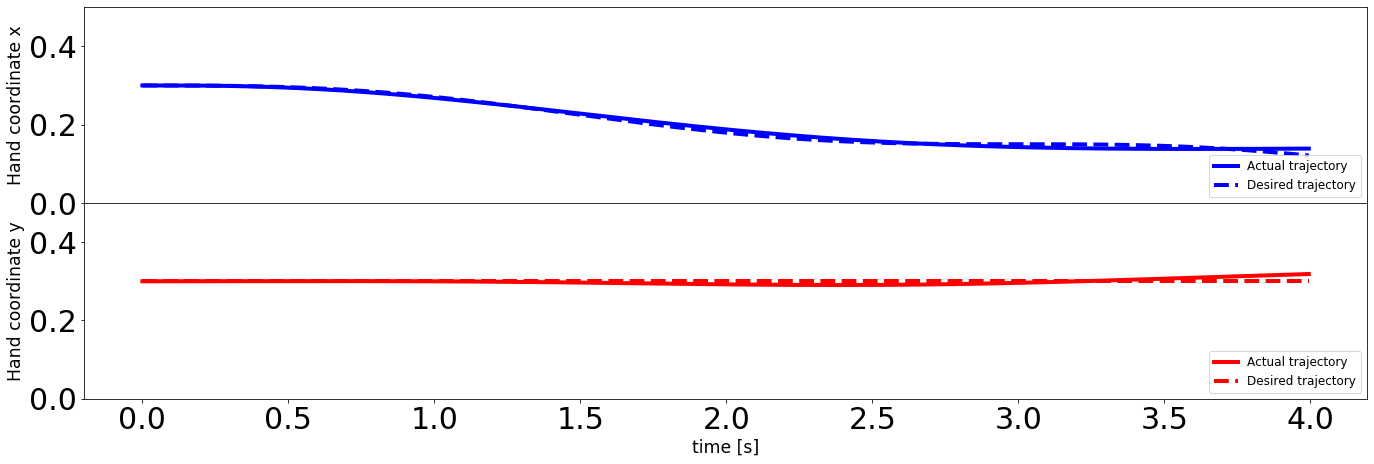

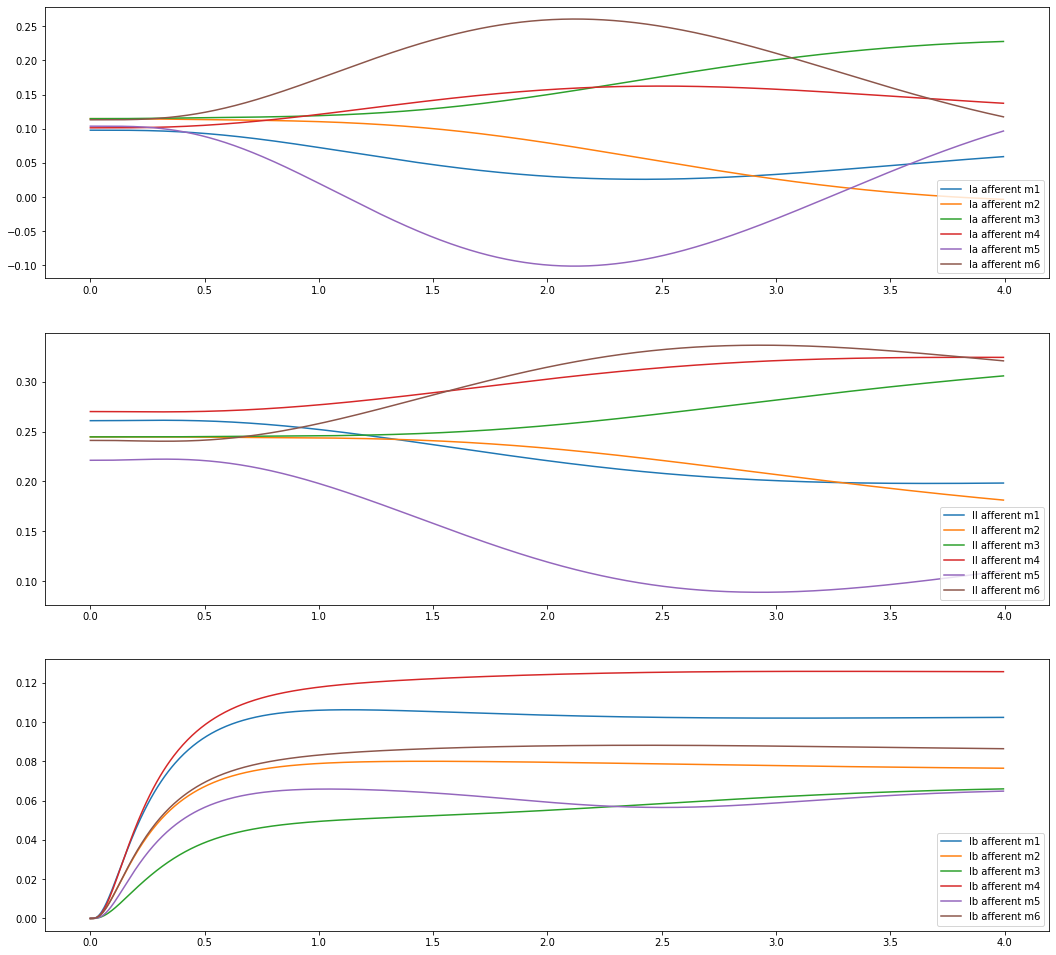

[[3.0, -2.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.6014943921810267, -0.6749987147005752, -0.9669053118611042, 0.8600983925675789, 0.8608694226197451, -0.9891761992052648, -1.0082379205335066, 0.8368759746352898, 1.0047829728710416, 0.31713244246750893, -0.8774815384760815, 0.8968794659651765, 0.6392844387905734, -0.42176405673791995, -0.555469254119539], [2.8, 3.2, 0.7530563563206745, 3.0915890404699184, -3.008233961108603, -2.555927162974942, 0.7022805758184336, 0.617668968965553, 0.7640338279798917, 0.7136541406416392, -0.9220735757260787, -0.6552377281798039, 0.44401495413925196], [-1.8, 2.8, -1.8, 2.8, 3.2, 3.0916705547275725, 2.8252145802525277, 1.7318966470726675, -0.10878844215321215, 1.352874650350254, -0.2890563318014863, 1.0885636162177477, 1.0810889862773383, 1.0302229986199034, 1.3810271952951994, 1.3516671627479715, 0.4991002609262955], [1.7, -1.8, 1.7, 1.3, 0.5456844217230248, -0.2442518840852867, -0.22551546102984849, 0.

Initial state. unit 0 test syns: : [3.0, -2.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.6014943921810267, -0.6749987147005752, -0.9669053118611042, 0.8600983925675789, 0.8608694226197451, -0.9891761992052648, -1.0082379205335066, 0.8368759746352898, 1.0047829728710416, 0.31713244246750893, -0.8774815384760815, 0.8968794659651765, 0.6392844387905734, -0.42176405673791995, -0.555469254119539]
uid:0, sid:0, e1:0.062624, e2:0.062624, e3:0.062624
change. unit 0 test syns: : [3.0, -2.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.6014943921810267, -0.6749987147005752, -0.9669053118611042, 0.8600983925675789, 0.8608694226197451, -0.9891761992052648, -1.0082379205335066, 0.8368759746352898, 1.0047829728710416, 0.31713244246750893, -0.8774815384760815, 0.8968794659651765, 0.6392844387905734, -0.42176405673791995, -0.555469254119539]
uid:0, sid:1, e1:0.062624, e2:0.062624, e3:0.062624
change. unit 0 test s

uid:0, sid:16, e1:0.062624, e2:0.062624, e3:0.062624
change. unit 0 test syns: : [3.0, -2.0, -3.0, 3.0, 2.8, -3.0, -3.0, 3.0, 2.8, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.6014943921810267, -0.8749987147005751, -0.9669053118611042, 0.8600983925675789, 0.8608694226197451, -0.9891761992052648, -1.0082379205335066, 0.8368759746352898, 1.0047829728710416, 0.31713244246750893, -0.8774815384760815, 0.8968794659651765, 0.6392844387905734, -0.42176405673791995, -0.555469254119539]
uid:0, sid:17, e1:0.062624, e2:0.062624, e3:0.062624
change. unit 0 test syns: : [3.0, -2.0, -3.0, 3.0, 2.8, -3.0, -3.0, 3.0, 2.8, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.6014943921810267, -0.8749987147005751, -0.9669053118611042, 0.8600983925675789, 0.8608694226197451, -0.9891761992052648, -1.0082379205335066, 0.8368759746352898, 1.0047829728710416, 0.31713244246750893, -0.8774815384760815, 0.8968794659651765, 0.6392844387905734, -0.42176405673791995, -0.555469254119539]
uid:0, sid:18, e1:0.062624

uid:1, sid:4, e1:0.062624, e2:0.062624, e3:0.062624
change. unit 1 test syns: : [2.5999999999999996, 3.4000000000000004, 0.9530563563206744, 3.2915890404699186, -2.808233961108603, -2.555927162974942, 0.7022805758184336, 0.617668968965553, 0.7640338279798917, 0.7136541406416392, -0.9220735757260787, -0.6552377281798039, 0.44401495413925196]
uid:1, sid:5, e1:0.062624, e2:0.062624, e3:0.062624
change. unit 1 test syns: : [2.5999999999999996, 3.4000000000000004, 0.9530563563206744, 3.2915890404699186, -2.808233961108603, -2.355927162974942, 0.7022805758184336, 0.617668968965553, 0.7640338279798917, 0.7136541406416392, -0.9220735757260787, -0.6552377281798039, 0.44401495413925196]
uid:1, sid:6, e1:0.062624, e2:0.062623, e3:0.062625
change. unit 1 test syns: : [2.5999999999999996, 3.4000000000000004, 0.9530563563206744, 3.2915890404699186, -2.808233961108603, -2.355927162974942, 0.9022805758184336, 0.617668968965553, 0.7640338279798917, 0.7136541406416392, -0.9220735757260787, -0.6552377281

uid:2, sid:13, e1:0.062622, e2:0.062622, e3:0.062622
change. unit 2 test syns: : [-1.6, 2.5999999999999996, -2.0, 3.0, 3.4000000000000004, 3.2916705547275726, 3.025214580252528, 1.9318966470726675, -0.10878844215321215, 1.152874650350254, -0.2890563318014863, 0.8885636162177477, 0.8810889862773383, 0.8302229986199035, 1.3810271952951994, 1.3516671627479715, 0.4991002609262955]
uid:2, sid:14, e1:0.062622, e2:0.062622, e3:0.062622
change. unit 2 test syns: : [-1.6, 2.5999999999999996, -2.0, 3.0, 3.4000000000000004, 3.2916705547275726, 3.025214580252528, 1.9318966470726675, -0.10878844215321215, 1.152874650350254, -0.2890563318014863, 0.8885636162177477, 0.8810889862773383, 0.8302229986199035, 1.1810271952951994, 1.3516671627479715, 0.4991002609262955]
uid:2, sid:15, e1:0.062622, e2:0.062622, e3:0.062622
change. unit 2 test syns: : [-1.6, 2.5999999999999996, -2.0, 3.0, 3.4000000000000004, 3.2916705547275726, 3.025214580252528, 1.9318966470726675, -0.10878844215321215, 1.152874650350254, -

uid:4, sid:4, e1:0.062601, e2:0.062607, e3:0.062597
change. unit 4 test syns: : [1.6, -1.5562255535388942, 0.7322635011482062, -0.13032385503748734, -0.40327992907974447, -0.9482918713325923, 0.4155308841280585, -0.30191391603536927, 0.46724068161106735, 0.6940400320819403, -0.6073243934402566]
uid:4, sid:5, e1:0.062597, e2:0.062597, e3:0.062598
change. unit 4 test syns: : [1.6, -1.5562255535388942, 0.7322635011482062, -0.13032385503748734, -0.40327992907974447, -0.7482918713325923, 0.4155308841280585, -0.30191391603536927, 0.46724068161106735, 0.6940400320819403, -0.6073243934402566]
uid:4, sid:6, e1:0.062597, e2:0.062608, e3:0.062599
change. unit 4 test syns: : [1.6, -1.5562255535388942, 0.7322635011482062, -0.13032385503748734, -0.40327992907974447, -0.7482918713325923, 0.4155308841280585, -0.30191391603536927, 0.46724068161106735, 0.6940400320819403, -0.6073243934402566]
uid:4, sid:7, e1:0.062597, e2:0.062597, e3:0.062597
change. unit 4 test syns: : [1.6, -1.5562255535388942, 0.732

uid:5, sid:8, e1:0.062597, e2:0.062597, e3:0.062597
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -1.1777900559687429, -1.0729188593765748, 0.1871048526910315, 0.32391950023371496, -1.1967930752225588, -0.9663040521155029, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, -0.600744837225469, -0.5051730667822435, 0.3803502039711536, 0.5842172419475091, -0.4477649111551424, 0.6863224500106241, 0.5638802856589493]
uid:5, sid:9, e1:0.062597, e2:0.062597, e3:0.062597
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.604979

uid:5, sid:20, e1:0.062597, e2:0.062597, e3:0.062597
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -1.1777900559687429, -1.0729188593765748, 0.1871048526910315, 0.32391950023371496, -1.1967930752225588, -0.9663040521155029, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, -0.600744837225469, -0.5051730667822435, 0.3803502039711536, 0.5842172419475091, -0.4477649111551424, 0.6863224500106241, 0.5638802856589493]
uid:5, sid:21, e1:0.062597, e2:0.062597, e3:0.062597
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049

uid:5, sid:32, e1:0.062597, e2:0.062597, e3:0.062597
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -1.1777900559687429, -1.0729188593765748, 0.1871048526910315, 0.32391950023371496, -1.1967930752225588, -0.9663040521155029, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, -0.600744837225469, -0.5051730667822435, 0.3803502039711536, 0.5842172419475091, -0.4477649111551424, 0.6863224500106241, 0.5638802856589493]
uid:5, sid:33, e1:0.062597, e2:0.062597, e3:0.062597
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049

uid:6, sid:7, e1:0.062410, e2:0.063311, e3:0.066191
change. unit 6 test syns: : [1.8, 3.4000000000000004, 2.1957822835567757, -1.9448621890560527, 2.6322155041832116, -2.0433301113364073, 0.6412099328407679, -0.008431011419863521, 0.17741351429812247, -0.20201632896528027, 0.18579820820957416, -0.7278512561601589, 0.3377601083229893]
uid:6, sid:8, e1:0.062410, e2:0.063311, e3:0.066191
change. unit 6 test syns: : [1.8, 3.4000000000000004, 2.1957822835567757, -1.9448621890560527, 2.6322155041832116, -2.0433301113364073, 0.6412099328407679, -0.008431011419863521, 0.17741351429812247, -0.20201632896528027, 0.18579820820957416, -0.7278512561601589, 0.3377601083229893]
uid:6, sid:9, e1:0.062410, e2:0.062420, e3:0.062406
change. unit 6 test syns: : [1.8, 3.4000000000000004, 2.1957822835567757, -1.9448621890560527, 2.6322155041832116, -2.0433301113364073, 0.6412099328407679, -0.008431011419863521, 0.17741351429812247, -0.4020163289652803, 0.18579820820957416, -0.7278512561601589, 0.33776010832

uid:7, sid:15, e1:0.062292, e2:0.063324, e3:0.062708
change. unit 7 test syns: : [-1.0, 1.1, -2.4000000000000004, 1.7, -1.0, -2.4000000000000004, 0.28950612961891087, -0.10112543938806606, 0.3637496404446541, 0.3805287123128806, 0.015057162646764766, 0.46016792838220183, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.09433008627958833, 0.11076388623381933, 0.11736689912092485, -0.0037987958821298073]
uid:7, sid:16, e1:0.062292, e2:0.062377, e3:0.062369
change. unit 7 test syns: : [-1.0, 1.1, -2.4000000000000004, 1.7, -1.0, -2.4000000000000004, 0.28950612961891087, -0.10112543938806606, 0.3637496404446541, 0.3805287123128806, 0.015057162646764766, 0.46016792838220183, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -0.0037987958821298073]
uid:7, sid:17, e1:0.062292, e2:0.063324, e3:0.062708
change. unit 7 test syns: : [-1.0, 1.1, -2.4000000000000004, 1.7, -1.0, -2.4000000000000004, 0.2

uid:9, sid:0, e1:0.062292, e2:0.062287, e3:0.062297
change. unit 9 test syns: : [2.4000000000000004, -1.5684665963161868, 1.0112507817961032, -1.251094245353302, 1.2024285613737622, -1.3166528326705385, -0.7154953518688301, 0.2672506438675281, 0.47049714616858174, -0.48608799107885464, 0.5335459196683411, -0.6386834974775626, 0.3979840524539761, 0.42776733986117854, -0.3568901822060949]
uid:9, sid:1, e1:0.062287, e2:0.062295, e3:0.062280
change. unit 9 test syns: : [2.4000000000000004, -1.7684665963161867, 1.0112507817961032, -1.251094245353302, 1.2024285613737622, -1.3166528326705385, -0.7154953518688301, 0.2672506438675281, 0.47049714616858174, -0.48608799107885464, 0.5335459196683411, -0.6386834974775626, 0.3979840524539761, 0.42776733986117854, -0.3568901822060949]
uid:9, sid:2, e1:0.062280, e2:0.062274, e3:0.062286
change. unit 9 test syns: : [2.4000000000000004, -1.7684665963161867, 1.2112507817961031, -1.251094245353302, 1.2024285613737622, -1.3166528326705385, -0.71549535186883

uid:10, sid:3, e1:0.062265, e2:0.063587, e3:0.063530
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.8, -1.3, 1.5, 1.5, 1.7, 2.2, -1.5, 0.10618187553413261, 0.08723044609776087, -0.8, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015]
uid:10, sid:4, e1:0.062265, e2:0.062265, e3:0.062265
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.6, -1.3, 1.5, 1.5, 1.7, 2.2, -1.5, 0.10618187553413261, 0.08723044609776087, -0.8, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.129912746485

uid:10, sid:15, e1:0.062150, e2:0.063052, e3:0.063295
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.6, -1.1, 1.5, 1.5, 1.9, 2.2, -1.5, 0.10618187553413261, 0.08723044609776087, -1.0, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015]
uid:10, sid:16, e1:0.062150, e2:0.063256, e3:0.063354
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.6, -1.1, 1.5, 1.5, 1.9, 2.2, -1.5, 0.10618187553413261, 0.08723044609776087, -1.0, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.1299127464

uid:10, sid:27, e1:0.062150, e2:0.482855, e3:0.304382
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.6, -1.1, 1.5, 1.5, 1.9, 2.2, -1.5, 0.10618187553413261, 0.08723044609776087, -1.0, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015]
uid:10, sid:28, e1:0.062150, e2:0.482855, e3:0.304382
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.6, -1.1, 1.5, 1.5, 1.9, 2.2, -1.5, 0.10618187553413261, 0.08723044609776087, -1.0, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.1299127464

uid:10, sid:39, e1:0.062150, e2:0.482855, e3:0.304382
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.6, -1.1, 1.5, 1.5, 1.9, 2.2, -1.5, 0.10618187553413261, 0.08723044609776087, -1.0, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015]
Initial state. unit 11 test syns: : [3.2, 2.2, 1.2888920733214044, -0.041391891053228935, 1.1513505471747034, 1.5960170699158105, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.4339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.03226856391

uid:12, sid:6, e1:0.061922, e2:0.061910, e3:0.061935
change. unit 12 test syns: : [-2.4000000000000004, -2.4000000000000004, 3.4000000000000004, 3.4000000000000004, -2.4000000000000004, -2.4000000000000004, 2.465957514084636, 2.3889389670608328, 2.827487939456195, 0.1027960834411803, -0.017342944909622182, 0.10491915611813543, 0.14314107416456856, 0.17949264153611516, 0.3443226592391508, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822, -0.14729596148185867]
uid:12, sid:7, e1:0.061910, e2:0.061899, e3:0.061920
change. unit 12 test syns: : [-2.4000000000000004, -2.4000000000000004, 3.4000000000000004, 3.4000000000000004, -2.4000000000000004, -2.4000000000000004, 2.465957514084636, 2.588938967060833, 2.827487939456195, 0.1027960834411803, -0.017342944909622182, 0.10491915611813543, 0.14314107416456856, 0.17949264153611516, 0.3443226592391508, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822, -0.14729596148185867]
uid:12, sid:8, e1:0.061899, e2:0.061865, e3:0.0

uid:13, sid:5, e1:0.061845, e2:0.061845, e3:0.061845
change. unit 13 test syns: : [-1.0, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -0.5255375321934372, -1.4077484943606247, 0.6936313993682628, -0.9866377086557205, -0.31309830325761306, -0.4374429235854562, -0.3053216462836495, -0.3493512306247863, 1.0016592199893637, 0.6424804052554313, -1.372757273452147]
uid:13, sid:6, e1:0.061845, e2:0.061845, e3:0.061845
change. unit 13 test syns: : [-1.0, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -0.5255375321934372, -1.4077484943606247, 0.6936313993682628, -0.9866377086557205, -0.31309830325761306, -0.4374429235854562, -0.3053216462836495, -0.3493512306247863, 1.0016592199893637, 0.6424804052554313, -1.372757273452147]
uid:13, sid:7, e1:0.061845, e2:0.061845, e3:0.061845
change. unit 13 test syns: : [-1.0, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -0.5255375321934372, -1.4077484943606247, 0.6936313993682628, -0.9866377086557205, -0.31309830325761306, -0.4374429235854562, -0.3053216462836495, -0.3493

uid:14, sid:10, e1:0.061836, e2:0.061836, e3:0.061836
change. unit 14 test syns: : [1.4, 0.19959811271485872, -0.04812283942373652, 0.18718928956290737, 1.2086971531721682, -0.09594813034470595, 0.15349330181511966, -1.4675076877805298, -1.509371920739637, 1.3363652718152494, -1.4789520220150632, -1.0112526668735782, 1.0021299997244488, -0.2962700906038572, -0.6026067972078949]
uid:14, sid:11, e1:0.061836, e2:0.061836, e3:0.061836
change. unit 14 test syns: : [1.4, 0.19959811271485872, -0.04812283942373652, 0.18718928956290737, 1.2086971531721682, -0.09594813034470595, 0.15349330181511966, -1.4675076877805298, -1.509371920739637, 1.3363652718152494, -1.4789520220150632, -1.2112526668735781, 1.0021299997244488, -0.2962700906038572, -0.6026067972078949]
uid:14, sid:12, e1:0.061836, e2:0.061831, e3:0.061845
change. unit 14 test syns: : [1.4, 0.19959811271485872, -0.04812283942373652, 0.18718928956290737, 1.2086971531721682, -0.09594813034470595, 0.15349330181511966, -1.4675076877805298, -

uid:15, sid:12, e1:0.061555, e2:0.061553, e3:0.061558
change. unit 15 test syns: : [-1.6, -1.6, 1.6, 1.6, -2.0, -1.6, 1.6, 2.0, 1.6, 1.6, -1.6, 2.0, 2.0, -1.8, -0.8927584182177, 0.2732489960726474, 0.33623286622469506, 0.056992213834324956, -0.0024841074603887403, 0.18415407143325774, 0.22792523875393744, 0.09486501131200953, -0.009611386985856174, -0.04902458883244548, -0.04987899851903588, 0.04234822462448501, 0.574922619046688, 0.31858467518791156, 0.06590845217025137, 0.1604699324446442]
uid:15, sid:13, e1:0.061553, e2:0.061531, e3:0.061581
change. unit 15 test syns: : [-1.6, -1.6, 1.6, 1.6, -2.0, -1.6, 1.6, 2.0, 1.6, 1.6, -1.6, 2.0, 2.0, -1.6, -0.8927584182177, 0.2732489960726474, 0.33623286622469506, 0.056992213834324956, -0.0024841074603887403, 0.18415407143325774, 0.22792523875393744, 0.09486501131200953, -0.009611386985856174, -0.04902458883244548, -0.04987899851903588, 0.04234822462448501, 0.574922619046688, 0.31858467518791156, 0.06590845217025137, 0.1604699324446442]
uid:15

uid:15, sid:29, e1:0.061530, e2:0.061647, e3:0.062252
change. unit 15 test syns: : [-1.6, -1.6, 1.6, 1.6, -2.0, -1.6, 1.6, 2.0, 1.6, 1.6, -1.6, 2.0, 2.0, -1.6, -0.6927584182177, 0.2732489960726474, 0.33623286622469506, 0.056992213834324956, -0.0024841074603887403, 0.18415407143325774, 0.22792523875393744, 0.09486501131200953, -0.009611386985856174, -0.04902458883244548, -0.04987899851903588, 0.04234822462448501, 0.574922619046688, 0.31858467518791156, 0.06590845217025137, 0.1604699324446442]
Initial state. unit 16 test syns: : [2.2, 2.2, -0.4314175298319414, 0.36647299779995973, 1.9466237958571406, -0.36670131602933936, 0.15852211280081346, 0.01881739737893401, -1.3729128864913447, 0.5471692640407427, -0.3971322469026651, -1.2053794613141697, -0.5804623435688238]
uid:16, sid:0, e1:0.061530, e2:0.061458, e3:0.061613
change. unit 16 test syns: : [2.4000000000000004, 2.2, -0.4314175298319414, 0.36647299779995973, 1.9466237958571406, -0.36670131602933936, 0.15852211280081346, 0.01881739737

uid:17, sid:7, e1:0.061366, e2:0.061366, e3:0.061366
change. unit 17 test syns: : [-1.5, -1.2, 2.4000000000000004, 2.4000000000000004, 2.4000000000000004, 1.473623365321448, -0.9316227373640871, -0.984814458520745, 0.7790885831276755, 0.8489429074007708, 0.35013829796936324, 0.3288200041873254, -0.1734116811214661, -0.5207202424040793, 1.3754046419296737, 0.5040289751184712, -0.4508272120322465]
uid:17, sid:8, e1:0.061366, e2:0.061366, e3:0.061365
change. unit 17 test syns: : [-1.5, -1.2, 2.4000000000000004, 2.4000000000000004, 2.4000000000000004, 1.473623365321448, -0.9316227373640871, -0.984814458520745, 0.5790885831276755, 0.8489429074007708, 0.35013829796936324, 0.3288200041873254, -0.1734116811214661, -0.5207202424040793, 1.3754046419296737, 0.5040289751184712, -0.4508272120322465]
uid:17, sid:9, e1:0.061365, e2:0.061366, e3:0.061365
change. unit 17 test syns: : [-1.5, -1.2, 2.4000000000000004, 2.4000000000000004, 2.4000000000000004, 1.473623365321448, -0.9316227373640871, -0.9848

uid:18, sid:12, e1:0.060928, e2:0.063883, e3:0.149668
change. unit 18 test syns: : [-1.6, 1.6, 2.0999999999999996, 1.6, 0.01690936367373813, 1.6241447382919223, -1.8819366614734685, -0.34074084084945316, 0.10371277425156933, 0.18321780119682152, -0.18087425370863797, -0.1473544374792053, 0.17537390712910672, -1.3581501852682634, -0.08971340374189994]
uid:18, sid:13, e1:0.060928, e2:0.060928, e3:0.060928
change. unit 18 test syns: : [-1.6, 1.6, 2.0999999999999996, 1.6, 0.01690936367373813, 1.6241447382919223, -1.8819366614734685, -0.34074084084945316, 0.10371277425156933, 0.18321780119682152, -0.18087425370863797, -0.1473544374792053, 0.17537390712910672, -1.5581501852682633, -0.08971340374189994]
uid:18, sid:14, e1:0.060928, e2:0.126527, e3:0.157036
change. unit 18 test syns: : [-1.6, 1.6, 2.0999999999999996, 1.6, 0.01690936367373813, 1.6241447382919223, -1.8819366614734685, -0.34074084084945316, 0.10371277425156933, 0.18321780119682152, -0.18087425370863797, -0.1473544374792053, 0.175

uid:20, sid:4, e1:0.060316, e2:0.061107, e3:0.060207
change. unit 20 test syns: : [1.3, -0.6000000000000001, -1.5, 1.3, 2.8, -1.5, -2.0, 1.5, 1.5, 1.5, -0.8, 0.3014692157564789, 1.6710032376503225, -1.8, 1.3371200427756724, 0.5471434958222976, 1.9149654801655982, -0.8, 0.25907719559188597, -0.8900608592055115, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484]
uid:20, sid:5, e1:0.060207, e2:0.062058, e3:0.061696
change. unit 20 test syns: : [1.3, -0.6000000000000001, -1.5, 1.3, 2.8, -1.5, -2.0, 1.5, 1.5, 1.5, -0.8, 0.3014692157564789, 1.6710032376503225, -1.8, 1.3371200427756724, 0.5471434958222976, 1.914965480165

uid:20, sid:16, e1:0.060207, e2:0.060219, e3:0.060425
change. unit 20 test syns: : [1.3, -0.6000000000000001, -1.5, 1.3, 2.8, -1.5, -2.0, 1.5, 1.5, 1.5, -0.8, 0.3014692157564789, 1.6710032376503225, -2.0, 1.3371200427756724, 0.5471434958222976, 1.9149654801655982, -0.8, 0.25907719559188597, -0.8900608592055115, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484]
uid:20, sid:17, e1:0.060207, e2:0.060207, e3:0.060207
change. unit 20 test syns: : [1.3, -0.6000000000000001, -1.5, 1.3, 2.8, -1.5, -2.0, 1.5, 1.5, 1.5, -0.8, 0.3014692157564789, 1.6710032376503225, -2.0, 1.3371200427756724, 0.5471434958222976, 1.9149654801

uid:20, sid:28, e1:0.060205, e2:0.095602, e3:0.133741
change. unit 20 test syns: : [1.3, -0.6000000000000001, -1.5, 1.3, 2.8, -1.5, -2.0, 1.5, 1.5, 1.5, -0.8, 0.3014692157564789, 1.6710032376503225, -2.0, 1.3371200427756724, 0.5471434958222976, 1.9149654801655982, -1.0, 0.25907719559188597, -1.0900608592055114, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484]
uid:20, sid:29, e1:0.060205, e2:0.095602, e3:0.133741
change. unit 20 test syns: : [1.3, -0.6000000000000001, -1.5, 1.3, 2.8, -1.5, -2.0, 1.5, 1.5, 1.5, -0.8, 0.3014692157564789, 1.6710032376503225, -2.0, 1.3371200427756724, 0.5471434958222976, 1.9149654801

uid:21, sid:0, e1:0.060205, e2:0.060205, e3:0.060205
change. unit 21 test syns: : [0.6000000000000001, 3.2, 1.3520374527573915, 1.283739735748582, 2.3369191005063357, 2.084772991678382, 1.259021334489366, 1.2277798099622828, 1.2298633255087543, 1.3525343826894247, 1.0521215095933494, 1.1255174837880124, 0.09638962594040928]
uid:21, sid:1, e1:0.060205, e2:0.060205, e3:0.060205
change. unit 21 test syns: : [0.6000000000000001, 3.4000000000000004, 1.3520374527573915, 1.283739735748582, 2.3369191005063357, 2.084772991678382, 1.259021334489366, 1.2277798099622828, 1.2298633255087543, 1.3525343826894247, 1.0521215095933494, 1.1255174837880124, 0.09638962594040928]
uid:21, sid:2, e1:0.060205, e2:0.060205, e3:0.060205
change. unit 21 test syns: : [0.6000000000000001, 3.4000000000000004, 1.5520374527573915, 1.283739735748582, 2.3369191005063357, 2.084772991678382, 1.259021334489366, 1.2277798099622828, 1.2298633255087543, 1.3525343826894247, 1.0521215095933494, 1.1255174837880124, 0.09638962594

uid:22, sid:9, e1:0.060205, e2:0.060205, e3:0.060205
change. unit 22 test syns: : [-1.4, 1.0, -1.0, 1.0, -1.0, -2.0, -0.10586440291814708, 0.01858732594703627, 0.7514208076190805, 1.0142984688061865, -1.394486229339982, 1.3016239777574776, -1.1616632976490866, 1.1669932871820303, 1.3181615743730275, -1.068169323338282, 1.186189699494076, -1.2777207809619848, -0.7264034916365334]
uid:22, sid:10, e1:0.060205, e2:0.060205, e3:0.060205
change. unit 22 test syns: : [-1.4, 1.0, -1.0, 1.0, -1.0, -2.0, -0.10586440291814708, 0.01858732594703627, 0.7514208076190805, 1.0142984688061865, -1.194486229339982, 1.3016239777574776, -1.1616632976490866, 1.1669932871820303, 1.3181615743730275, -1.068169323338282, 1.186189699494076, -1.2777207809619848, -0.7264034916365334]
uid:22, sid:11, e1:0.060205, e2:0.060205, e3:0.060205
change. unit 22 test syns: : [-1.4, 1.0, -1.0, 1.0, -1.0, -2.0, -0.10586440291814708, 0.01858732594703627, 0.7514208076190805, 1.0142984688061865, -1.194486229339982, 1.101623977757

uid:23, sid:12, e1:0.060204, e2:0.060204, e3:0.060204
change. unit 23 test syns: : [1.5, -1.4, 1.5, 1.5, 1.5, -0.568078498324762, -0.3118098497984475, 0.8473236163761904, -0.30953127361948923, 0.4984861641334319, -0.2747895331696267, -0.10167476791019536, -0.22814722923190178, 0.9638802901600159, -0.8178812651641039, -0.6306669294494955, -0.8832802334863248]
uid:23, sid:13, e1:0.060204, e2:0.060204, e3:0.060204
change. unit 23 test syns: : [1.5, -1.4, 1.5, 1.5, 1.5, -0.568078498324762, -0.3118098497984475, 0.8473236163761904, -0.30953127361948923, 0.4984861641334319, -0.2747895331696267, -0.10167476791019536, -0.22814722923190178, 0.9638802901600159, -0.8178812651641039, -0.6306669294494955, -0.8832802334863248]
uid:23, sid:14, e1:0.060204, e2:0.060204, e3:0.060204
change. unit 23 test syns: : [1.5, -1.4, 1.5, 1.5, 1.5, -0.568078498324762, -0.3118098497984475, 0.8473236163761904, -0.30953127361948923, 0.4984861641334319, -0.2747895331696267, -0.10167476791019536, -0.22814722923190178, 

uid:25, sid:0, e1:0.060200, e2:0.060199, e3:0.060200
change. unit 25 test syns: : [-2.0999999999999996, -1.8, 2.2, 2.7, -1.2, -2.3, 2.3, 2.7, 2.7, 3.2, -2.5, 1.4907940856230206, 1.5798266669759615, -2.3, -1.2690222787007162, 1.5861789062132357, -1.118544075524149, -2.5, -1.6562164777324402, 2.337701845796691, 0.1326073402585904, 0.0816990270499734, 0.12595343657455182, 0.1825538599927634, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.02318974884641034, -0.02807789813040623, -0.028578885606721616, 0.01051253710559763, -0.09928790490260841, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.029840201311829073, 0.0331810036426447, 0.1706764565661732, -0.17426421118920865]
uid:25, sid:1, e1:0.060199, e2:0.060199, e3:0.060199
change. unit 25 test syns: : [-2.0999999999999996, -1.6, 2.2, 2.7, -1.2, -2.3, 2.3, 2.7, 2.7, 3.2, -2.5, 1.4907940856230206, 1.5798266669759615, -2.3, -1.2690222787007162, 1.5861789062132357, -1.118544075524149, -2

uid:25, sid:11, e1:0.060180, e2:0.060183, e3:0.060178
change. unit 25 test syns: : [-2.0999999999999996, -1.6, 2.0, 2.5, -1.2, -2.0999999999999996, 2.0999999999999996, 2.5, 2.5, 3.0, -2.3, 1.2907940856230207, 1.5798266669759615, -2.3, -1.2690222787007162, 1.5861789062132357, -1.118544075524149, -2.5, -1.6562164777324402, 2.337701845796691, 0.1326073402585904, 0.0816990270499734, 0.12595343657455182, 0.1825538599927634, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.02318974884641034, -0.02807789813040623, -0.028578885606721616, 0.01051253710559763, -0.09928790490260841, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.029840201311829073, 0.0331810036426447, 0.1706764565661732, -0.17426421118920865]
uid:25, sid:12, e1:0.060178, e2:0.060178, e3:0.060177
change. unit 25 test syns: : [-2.0999999999999996, -1.6, 2.0, 2.5, -1.2, -2.0999999999999996, 2.0999999999999996, 2.5, 2.5, 3.0, -2.3, 1.2907940856230207, 1.3798266669759616, -2.3, -

uid:25, sid:22, e1:0.060153, e2:0.060170, e3:0.060172
change. unit 25 test syns: : [-2.0999999999999996, -1.6, 2.0, 2.5, -1.2, -2.0999999999999996, 2.0999999999999996, 2.5, 2.5, 3.0, -2.3, 1.2907940856230207, 1.3798266669759616, -2.0999999999999996, -1.0690222787007162, 1.3861789062132357, -0.918544075524149, -2.7, -1.4562164777324402, 2.1377018457966908, 0.3326073402585904, 0.0816990270499734, 0.12595343657455182, 0.1825538599927634, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.02318974884641034, -0.02807789813040623, -0.028578885606721616, 0.01051253710559763, -0.09928790490260841, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.029840201311829073, 0.0331810036426447, 0.1706764565661732, -0.17426421118920865]
uid:25, sid:23, e1:0.060153, e2:0.060170, e3:0.060172
change. unit 25 test syns: : [-2.0999999999999996, -1.6, 2.0, 2.5, -1.2, -2.0999999999999996, 2.0999999999999996, 2.5, 2.5, 3.0, -2.3, 1.2907940856230207, 1.379826666

uid:25, sid:33, e1:0.060153, e2:0.060191, e3:0.060175
change. unit 25 test syns: : [-2.0999999999999996, -1.6, 2.0, 2.5, -1.2, -2.0999999999999996, 2.0999999999999996, 2.5, 2.5, 3.0, -2.3, 1.2907940856230207, 1.3798266669759616, -2.0999999999999996, -1.0690222787007162, 1.3861789062132357, -0.918544075524149, -2.7, -1.4562164777324402, 2.1377018457966908, 0.3326073402585904, 0.0816990270499734, 0.12595343657455182, 0.1825538599927634, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.02318974884641034, -0.02807789813040623, -0.028578885606721616, 0.01051253710559763, -0.09928790490260841, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.029840201311829073, 0.0331810036426447, 0.1706764565661732, -0.17426421118920865]
uid:25, sid:34, e1:0.060153, e2:0.060191, e3:0.060175
change. unit 25 test syns: : [-2.0999999999999996, -1.6, 2.0, 2.5, -1.2, -2.0999999999999996, 2.0999999999999996, 2.5, 2.5, 3.0, -2.3, 1.2907940856230207, 1.379826666

uid:26, sid:8, e1:0.060128, e2:0.065585, e3:0.065200
change. unit 26 test syns: : [2.0, 1.2, 0.40240081729698035, 1.3262496910613417, -2.1347140969461553, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.39623091031957064, -0.062128835047673164, 0.07986235687947951]
uid:26, sid:9, e1:0.060128, e2:0.065585, e3:0.065200
change. unit 26 test syns: : [2.0, 1.2, 0.40240081729698035, 1.3262496910613417, -2.1347140969461553, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.39623091031957064, -0.062128835047673164, 0.07986235687947951]
uid:26, sid:10, e1:0.060128, e2:0.060107, e3:0.060179
change. unit 26 test syns: : [2.0, 1.2, 0.40240081729698035, 1.3262496910613417, -2.1347140969461553, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.19623091031957063, -0.062128835047673164, 0.07986235687947951]
uid:26, sid:11, e1:0.060107

uid:27, sid:14, e1:0.060043, e2:0.060325, e3:0.060561
change. unit 27 test syns: : [-2.4000000000000004, -2.4000000000000004, 2.9000000000000004, 2.5999999999999996, -0.6000000000000001, -1.8, -0.01989375971126711, 2.4409018704514502, 2.9607209400928842, 0.3970551066605787, 0.5719545805418815, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, 0.03572139821834802]
uid:27, sid:15, e1:0.060043, e2:0.060325, e3:0.060561
change. unit 27 test syns: : [-2.4000000000000004, -2.4000000000000004, 2.9000000000000004, 2.5999999999999996, -0.6000000000000001, -1.8, -0.01989375971126711, 2.4409018704514502, 2.9607209400928842, 0.3970551066605787, 0.5719545805418815, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, 0.03572139821834802]
uid:27, sid:16, e1:0.060043, e2:0.061293, e3:0.060676
change. unit 2

uid:28, sid:16, e1:0.060043, e2:0.307600, e3:0.529388
change. unit 28 test syns: : [-1.4, 0.8, 1.5, 1.5, 2.2, -0.186299249869736, 0.9972566011659101, 1.4406258646931942, 0.4271177977626887, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.19387091411302132]
Initial state. unit 29 test syns: : [2.7, -0.4338128674265029, -0.9754979409481874, -1.3288241210635008, -0.66531079087646, 1.607062274537008, -1.5560916348237253, 0.6546564579368124, 0.23932730879082564, 0.07532232888372203, -0.4694214650982186, -0.3152031064617331, 0.4521738012648916, 0.6899907734439359, -0.09106627291137759]
uid:29, sid:0, e1:0.060043, e2:0.060051, e3:0.060042
change. unit 29 test syns: : [2.5, -0.4338128674265029, -0.9754979409481874, -1.3288241210635008, -0.66531079087646, 1.607062274537008, -1.5560916348237253, 0.6546564579368124, 0.23932730879082564, 0.07532232888372203, -0.4694214650982186, -0.31520310646173

Iteration: 4
Error: 0.06002622459729737
Execution time: 137715.7806367874 seconds


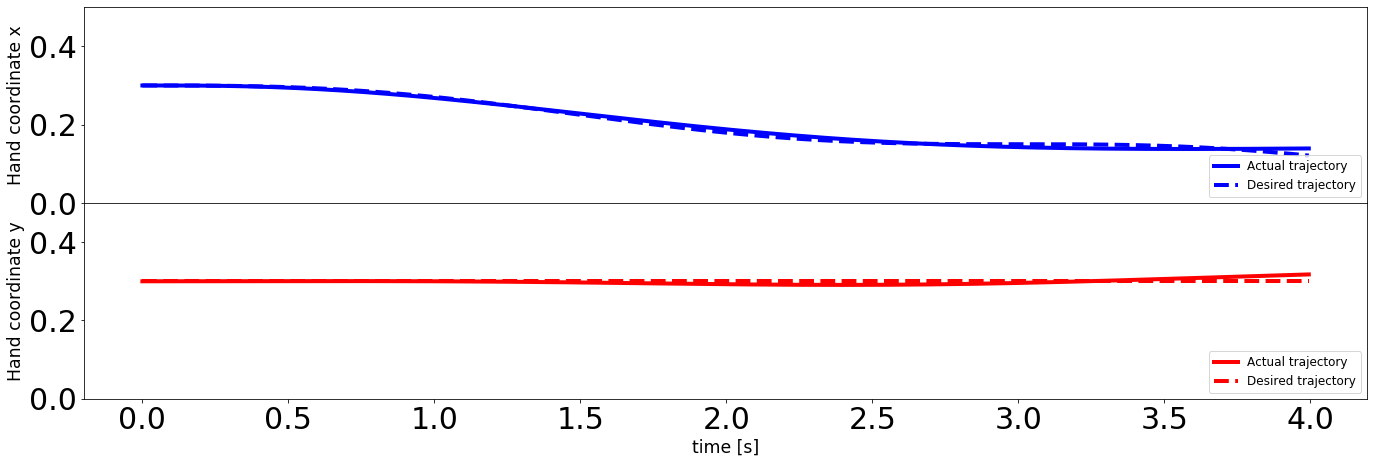

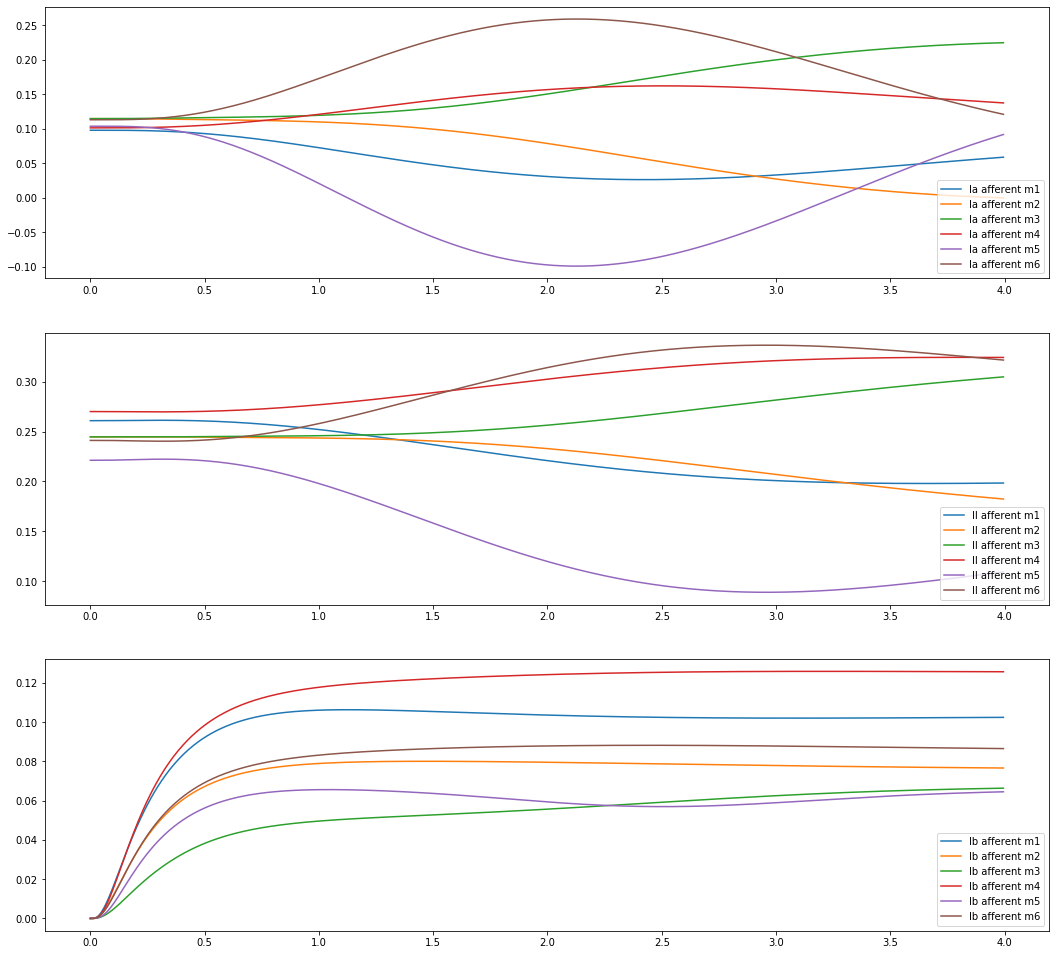

[[3.0, -2.0, -3.0, 3.0, 2.8, -3.0, -3.0, 3.0, 2.8, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.6014943921810267, -0.8749987147005751, -0.9669053118611042, 0.8600983925675789, 0.8608694226197451, -0.9891761992052648, -1.0082379205335066, 0.8368759746352898, 1.0047829728710416, 0.31713244246750893, -0.8774815384760815, 0.8968794659651765, 0.6392844387905734, -0.42176405673791995, -0.555469254119539], [2.5999999999999996, 3.4000000000000004, 0.9530563563206744, 3.2915890404699186, -2.808233961108603, -2.355927162974942, 0.9022805758184336, 0.817668968965553, 0.9640338279798917, 0.9136541406416392, -0.7220735757260788, -0.45523772817980385, 0.44401495413925196], [-1.6, 2.5999999999999996, -2.0, 3.0, 3.4000000000000004, 3.2916705547275726, 3.025214580252528, 1.9318966470726675, -0.10878844215321215, 1.152874650350254, -0.2890563318014863, 0.8885636162177477, 0.8810889862773383, 0.8302229986199035, 1.1810271952951994, 1.1516671627479715, 0.4991002609262955], [1.5, -1.8, 1.5, 1.3, 0.345

In [6]:
w = sc.grad_desc()
#print(w)

In [6]:
# Synapse weights for 4 iterations: [0.5, 0.5, 0.2, 0.2]

# (0.15,0.3)
#Iteration 1
#w = [[2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, -0.5671615786499182, 0.3014943921810267, -0.37499871470057516, -0.4669053118611041, 0.36009839256757886, 0.36086942261974503, -0.4891761992052648, -0.5082379205335067, 0.3368759746352898, 0.5047829728710416, 0.31713244246750893, -0.3774815384760815, 0.39687946596517654, 0.6392844387905734, -0.42176405673791995, -0.555469254119539], [2.5, 2.5, 0.053056356320674514, 2.3915890404699183, -2.308233961108603, -1.8559271629749419, 0.5022805758184337, 0.41766896896555294, 0.5640338279798918, 0.5136541406416392, -0.6220735757260787, -0.35523772817980376, 0.44401495413925196], [-2.5, 2.5, -2.5, 2.5, 2.5, 2.3916705547275723, 2.1252145802525275, 1.0318966470726676, -0.30878844215321216, 0.652874650350254, -0.48905633180148633, 0.38856361621774765, 0.3810889862773382, 0.33022299861990345, 0.6810271952951994, 0.6516671627479715, 0.4991002609262955], [1.5, -1.5, 1.5, 1.5, -0.15431557827697517, 0.05574811591471329, 0.4744845389701515, -0.34023069523347477, 0.326198272930038, -0.5603292139008557, -0.5064846877495385, 0.6028110469364787, -0.6772893791527519, -0.6083950926558988, -0.5323326425964305], [1.5, -1.0562255535388942, 0.6322635011482061, -0.2303238550374873, -0.20327992907974446, -0.44829187133259235, 0.4155308841280585, -0.30191391603536927, 0.46724068161106735, 0.6940400320819403, -0.6073243934402566], [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -0.6777900559687428, -0.5729188593765748, 0.6871048526910315, 0.32391950023371496, -0.696793075222559, -0.46630405211550285, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, -0.600744837225469, -0.5051730667822435, 0.3803502039711536, 0.5842172419475091, -0.4477649111551424, 0.6863224500106241, 0.5638802856589493], [2.5, 2.5, 1.7957822835567758, -2.0448621890560528, 2.2322155041832112, -2.1433301113364074, 0.6412099328407679, -0.008431011419863521, 0.17741351429812247, -0.5020163289652803, 0.18579820820957416, -0.5278512561601589, 0.3377601083229893], [-1.5, 2.0, -1.5, 1.5, -1.5, -1.5, 1.189506129618911, -0.10112543938806606, 0.3637496404446541, 0.3805287123128806, 0.015057162646764766, 0.46016792838220183, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -0.0037987958821298073], [1.5, -1.5, 1.5, 1.5, 1.5, 1.1957285161727964, -0.04400502570595943, -0.5802072880589293, -0.3451087523694581, 0.34539638555377594, -0.6642288057541952, -0.6699174660685504, -0.4645319472530756, -0.33721578462897345, 0.4328781616118666, 0.5829756725808825, -0.4594204512975085], [1.5, -0.8684665963161868, 0.3112507817961032, -0.5510942453533021, 0.5024285613737622, -0.6166528326705385, -0.01549535186883011, -0.4327493561324719, 0.47049714616858174, -0.6860879910788547, 0.5335459196683411, -0.6386834974775626, 0.3979840524539761, 0.42776733986117854, -0.3568901822060949], [-1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, 1.5, -1.5, 0.10618187553413261, 0.08723044609776087, -1.5, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015], [2.5, 2.5, 1.5888920733214045, -0.041391891053228935, 1.8513505471747034, 2.2960170699158104, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.6339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.03226856391850261], [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 1.5659575140846358, 1.6889389670608326, 2.127487939456195, -0.3972039165588197, -0.5173429449096222, -0.09508084388186458, 0.14314107416456856, -0.5205073584638849, -0.3556773407608492, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822, -0.14729596148185867], [-1.5, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -1.0255375321934372, -0.9077484943606247, 0.39363139936826286, -0.4866377086557205, -0.31309830325761306, -0.4374429235854562, -0.3053216462836495, -0.3493512306247863, 0.5016592199893638, 0.6424804052554313, -0.6727572734521471], [1.5, 0.6995981127148587, -0.04812283942373652, 1.0871892895629074, 1.2086971531721682, -0.495948130344706, 0.6534933018151197, -0.5675076877805297, -0.6093719207396371, 0.4363652718152494, -0.5789520220150634, -0.3112526668735782, 0.30212999972444887, -0.5962700906038572, -0.6026067972078949], [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, -1.5927584182177, -0.4267510039273526, -0.36376713377530495, 0.556992213834325, 0.49751589253961126, -0.5158459285667423, -0.47207476124606257, 0.5948650113120095, 0.4903886130141438, 0.4509754111675545, 0.4501210014809641, -0.657651775375515, 0.574922619046688, 0.31858467518791156, -0.6340915478297486, -0.5395300675553558], [1.5, 1.5, 0.2685824701680586, -0.3335270022000403, 1.2466237958571407, 0.33329868397066065, -0.5414778871991865, -0.681182602621066, -0.6729128864913447, 0.5471692640407427, -0.3971322469026651, -0.5053794613141698, -0.5804623435688238], [-1.5, -1.5, 1.5, 1.5, 1.5, 0.5736233653214482, -0.4316227373640871, -0.0848144585207451, 0.5790885831276755, 0.6489429074007709, -0.34986170203063677, -0.37117999581267463, -0.6734116811214661, -0.5207202424040793, 0.6754046419296736, 0.30402897511847127, -0.4508272120322465], [-2.5, 2.5, 2.5, 2.5, -0.6830906363262619, 2.3241447382919223, -1.9819366614734686, -0.44074084084945314, 0.6037127742515693, 0.6832178011968215, 0.31912574629136203, -0.6473544374792053, 0.6753739071291067, -0.6581501852682634, -0.08971340374189994], [2.5, 0.8939859321099051, 1.3921520793190307, 1.891775012981117, -0.8829139226126661, 0.33859019478084407, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, -0.1800404062509589], [1.5, -1.5, -1.5, 1.5, 2.5, -1.5, -1.5, 1.5, 1.5, 1.5, -1.5, 0.3014692157564789, 1.4710032376503226, -1.5, 1.3371200427756724, 0.5471434958222976, 1.2149654801655982, -1.5, 0.959077195591886, -1.0900608592055114, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484], [1.5, 2.5, 0.6520374527573916, 0.5837397357485821, 1.6369191005063355, 1.384772991678382, 0.5590213344893659, 0.5277798099622827, 0.5298633255087544, 0.6525343826894247, 0.35212150959334937, 0.4255174837880124, 0.09638962594040928], [-1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 0.09413559708185293, -0.8814126740529638, 1.2514208076190805, 0.5142984688061863, -0.694486229339982, 0.6016239777574776, -0.4616632976490867, 0.4669932871820303, 0.6181615743730274, -0.36816932333828206, 0.4861896994940759, -0.5777207809619849, -0.5264034916365334], [1.5, -1.5, 1.5, 1.5, 1.5, -0.868078498324762, 0.08819015020155252, 0.8473236163761904, -0.30953127361948923, 0.39848616413343185, -0.4747895331696267, -0.3016747679101954, -0.4281472292319018, 0.6638802901600158, -0.6178812651641038, -0.6306669294494955, -0.5832802334863249], [2.5, -0.23301791013153217, 0.9897561346948027, -1.3677161183176514, -1.9731475258489364, 2.180118584056915, 0.8068552754938736, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.08857752939243176], [-2.5, -2.5, 2.5, 2.5, -1.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, 2.1377018457966908, -0.5673926597414096, -0.4183009729500266, 0.6259534365745518, 0.6825538599927634, -0.3737339649219445, -0.6922793923235998, 0.38892748820467554, 0.6618831574780205, 0.5231897488464103, 0.47192210186959377, -0.5285788856067216, 0.5105125371055976, 0.4007120950973916, -0.33855055973201953, -0.49493606086866654, 0.6741195210286743, -0.5298402013118291, -0.4668189963573553, -0.3293235434338268, 0.32573578881079135], [2.0, 1.5, 1.3024008172969803, 1.3262496910613417, -2.0347140969461557, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.5962309103195707, -0.062128835047673164, 0.07986235687947951], [-1.5, -1.5, 2.5, 2.5, -1.5, -1.5, -0.7198937597112671, 2.4409018704514502, 2.4607209400928842, 0.3970551066605787, 0.5719545805418815, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, 0.03572139821834802], [-1.5, 1.5, 1.5, 1.5, 1.5, -0.186299249869736, 0.9972566011659101, 1.4406258646931942, 0.4271177977626887, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.19387091411302132], [2.5, -1.133812867426503, -1.6754979409481874, -2.0288241210635007, -1.36531079087646, 2.307062274537008, -2.256091634823725, 0.6546564579368124, -0.46067269120917437, -0.42467767111627797, -0.4694214650982186, -0.3152031064617331, 0.4521738012648916, 0.6899907734439359, -0.09106627291137759], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
#Iteration 2
#w = [[3.0, -2.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.8014943921810267, -0.8749987147005751, -0.9669053118611042, 0.8600983925675789, 0.8608694226197451, -0.9891761992052648, -1.0082379205335066, 0.8368759746352898, 1.0047829728710416, 0.31713244246750893, -0.8774815384760815, 0.8968794659651765, 0.6392844387905734, -0.42176405673791995, -0.555469254119539], [3.0, 3.0, 0.5530563563206745, 2.8915890404699183, -2.808233961108603, -2.355927162974942, 0.5022805758184337, 0.41766896896555294, 0.5640338279798918, 0.5136541406416392, -1.1220735757260787, -0.8552377281798038, 0.44401495413925196], [-2.0, 3.0, -2.0, 3.0, 3.0, 2.8916705547275723, 2.6252145802525275, 1.5318966470726676, -0.30878844215321216, 1.152874650350254, -0.48905633180148633, 0.8885636162177477, 0.8810889862773382, 0.8302229986199035, 1.1810271952951994, 1.1516671627479715, 0.4991002609262955], [1.5, -2.0, 1.5, 1.5, 0.3456844217230248, -0.4442518840852867, -0.025515461029848474, 0.15976930476652523, -0.173801727069962, -0.06032921390085566, -0.006484687749538476, 1.1028110469364787, -0.6772893791527519, -0.6083950926558988, -0.5323326425964305], [2.0, -1.5562255535388942, 1.132263501148206, 0.2696761449625127, -0.20327992907974446, -0.9482918713325923, 0.4155308841280585, -0.30191391603536927, 0.46724068161106735, 0.6940400320819403, -0.6073243934402566], [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -1.1777900559687429, -1.0729188593765748, 0.1871048526910315, 0.32391950023371496, -1.1967930752225588, -0.9663040521155029, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, -0.600744837225469, -0.5051730667822435, 0.3803502039711536, 0.5842172419475091, -0.4477649111551424, 0.6863224500106241, 0.5638802856589493], [2.0, 3.0, 1.7957822835567758, -1.5448621890560528, 2.2322155041832112, -1.6433301113364074, 0.6412099328407679, -0.008431011419863521, 0.17741351429812247, -0.0020163289652802563, 0.18579820820957416, -0.5278512561601589, 0.3377601083229893], [-1.0, 1.5, -2.0, 1.5, -1.0, -2.0, 0.6895061296189109, -0.10112543938806606, 0.3637496404446541, 0.3805287123128806, 0.015057162646764766, 0.46016792838220183, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -0.0037987958821298073], [1.5, -1.5, 1.5, 1.5, 1.5, 1.1957285161727964, 0.45599497429404057, -0.5802072880589293, 0.1548912476305419, -0.15460361444622406, -0.16422880575419518, -0.1699174660685504, 0.03546805274692438, 0.16278421537102655, 0.9328781616118667, 0.08297567258088245, -0.4594204512975085], [2.0, -1.3684665963161868, 0.8112507817961032, -1.051094245353302, 1.0024285613737622, -1.1166528326705385, -0.5154953518688301, 0.0672506438675281, 0.47049714616858174, -0.6860879910788547, 0.5335459196683411, -0.6386834974775626, 0.3979840524539761, 0.42776733986117854, -0.3568901822060949], [-1.5, -1.5, 1.5, 1.5, -2.0, -1.5, 1.5, 1.5, 1.5, 2.0, -1.5, 0.10618187553413261, 0.08723044609776087, -1.0, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015], [3.0, 2.0, 1.0888920733214045, -0.041391891053228935, 1.3513505471747034, 1.7960170699158104, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.6339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.03226856391850261], [-2.0, -2.0, 3.0, 3.0, -2.0, -2.0, 2.065957514084636, 2.1889389670608326, 2.627487939456195, 0.1027960834411803, -0.017342944909622182, -0.09508084388186458, 0.14314107416456856, -0.02050735846388485, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822, -0.14729596148185867], [-1.0, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -0.5255375321934372, -1.4077484943606247, 0.8936313993682629, -0.9866377086557205, -0.31309830325761306, -0.4374429235854562, -0.3053216462836495, -0.3493512306247863, 1.0016592199893637, 0.6424804052554313, -1.172757273452147], [1.0, 0.19959811271485872, -0.04812283942373652, 0.5871892895629074, 1.2086971531721682, -0.495948130344706, 0.15349330181511966, -1.0675076877805298, -1.109371920739637, 0.9363652718152494, -1.0789520220150632, -0.8112526668735782, 0.8021299997244489, -0.09627009060385716, -0.6026067972078949], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -1.0927584182177, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742273, 0.02792523875393743, 0.09486501131200953, -0.009611386985856174, -0.04902458883244548, -0.04987899851903588, -0.157651775375515, 0.574922619046688, 0.31858467518791156, -0.13409154782974864, -0.03953006755535582], [2.0, 2.0, -0.23141752983194142, 0.16647299779995972, 1.7466237958571407, -0.16670131602933935, -0.04147788719918655, -0.181182602621066, -1.1729128864913447, 0.5471692640407427, -0.3971322469026651, -1.0053794613141698, -0.5804623435688238], [-1.5, -1.0, 2.0, 2.0, 2.0, 1.0736233653214482, -0.9316227373640871, -0.5848144585207451, 0.5790885831276755, 0.6489429074007709, 0.15013829796936323, 0.12882000418732537, -0.1734116811214661, -0.5207202424040793, 1.1754046419296738, 0.30402897511847127, -0.4508272120322465], [-2.0, 2.0, 2.5, 2.0, -0.18309063632626188, 1.8241447382919223, -1.4819366614734686, 0.05925915915054686, 0.10371277425156933, 0.18321780119682152, -0.18087425370863797, -0.1473544374792053, 0.17537390712910672, -1.1581501852682634, -0.08971340374189994], [3.0, 1.393985932109905, 1.3921520793190307, 1.391775012981117, -0.8829139226126661, 0.33859019478084407, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, -0.1800404062509589], [1.5, -1.0, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -1.0, 0.3014692157564789, 1.4710032376503226, -2.0, 1.3371200427756724, 0.5471434958222976, 1.7149654801655982, -1.0, 0.459077195591886, -1.0900608592055114, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484], [1.0, 3.0, 1.1520374527573916, 1.083739735748582, 2.1369191005063355, 1.884772991678382, 1.059021334489366, 1.0277798099622828, 1.0298633255087544, 1.1525343826894248, 0.8521215095933494, 0.9255174837880125, 0.09638962594040928], [-1.0, 1.0, -1.0, 1.0, -1.0, -2.0, 0.09413559708185293, -0.38141267405296375, 0.7514208076190805, 1.0142984688061865, -1.194486229339982, 1.1016239777574777, -0.9616632976490866, 0.9669932871820304, 1.1181615743730275, -0.8681693233382821, 0.986189699494076, -1.0777207809619849, -0.5264034916365334], [1.5, -1.0, 1.5, 1.5, 1.5, -0.368078498324762, 0.08819015020155252, 0.8473236163761904, -0.30953127361948923, 0.8984861641334319, -0.4747895331696267, -0.3016747679101954, -0.4281472292319018, 1.1638802901600158, -0.6178812651641038, -0.6306669294494955, -1.0832802334863247], [2.0, -0.23301791013153217, 0.4897561346948027, -0.8677161183176514, -2.4731475258489364, 2.680118584056915, 0.8068552754938736, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.08857752939243176], [-2.5, -2.0, 2.0, 2.5, -1.0, -2.5, 2.5, 2.5, 2.5, 3.0, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, 2.1377018457966908, -0.06739265974140962, 0.0816990270499734, 0.12595343657455182, 0.1825538599927634, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.02318974884641034, -0.02807789813040623, -0.028578885606721616, 0.01051253710559763, -0.09928790490260841, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.029840201311829073, 0.0331810036426447, 0.1706764565661732, -0.17426421118920865], [2.0, 1.0, 0.8024008172969803, 1.3262496910613417, -2.5347140969461557, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.5962309103195707, -0.062128835047673164, 0.07986235687947951], [-2.0, -2.0, 2.5, 3.0, -1.0, -2.0, -0.21989375971126712, 2.4409018704514502, 2.9607209400928842, 0.3970551066605787, 0.5719545805418815, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, 0.03572139821834802], [-1.0, 1.0, 1.5, 1.5, 2.0, -0.186299249869736, 0.9972566011659101, 1.4406258646931942, 0.4271177977626887, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.19387091411302132], [2.5, -0.6338128674265029, -1.1754979409481874, -1.5288241210635007, -0.8653107908764599, 1.807062274537008, -1.7560916348237252, 0.6546564579368124, 0.03932730879082563, 0.07532232888372203, -0.4694214650982186, -0.3152031064617331, 0.4521738012648916, 0.6899907734439359, -0.09106627291137759], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
#Iteration 3
#w = [[3.0, -2.0, -3.0, 3.0, 3.0, -3.0, -3.0, 3.0, 3.0, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.6014943921810267, -0.6749987147005752, -0.9669053118611042, 0.8600983925675789, 0.8608694226197451, -0.9891761992052648, -1.0082379205335066, 0.8368759746352898, 1.0047829728710416, 0.31713244246750893, -0.8774815384760815, 0.8968794659651765, 0.6392844387905734, -0.42176405673791995, -0.555469254119539], [2.8, 3.2, 0.7530563563206745, 3.0915890404699184, -3.008233961108603, -2.555927162974942, 0.7022805758184336, 0.617668968965553, 0.7640338279798917, 0.7136541406416392, -0.9220735757260787, -0.6552377281798039, 0.44401495413925196], [-1.8, 2.8, -1.8, 2.8, 3.2, 3.0916705547275725, 2.8252145802525277, 1.7318966470726675, -0.10878844215321215, 1.352874650350254, -0.2890563318014863, 1.0885636162177477, 1.0810889862773383, 1.0302229986199034, 1.3810271952951994, 1.3516671627479715, 0.4991002609262955], [1.7, -1.8, 1.7, 1.3, 0.5456844217230248, -0.2442518840852867, -0.22551546102984849, 0.35976930476652524, -0.373801727069962, 0.13967078609914435, 0.19351531225046154, 1.3028110469364786, -0.6772893791527519, -0.6083950926558988, -0.3323326425964305], [1.8, -1.7562255535388942, 0.9322635011482061, 0.06967614496251268, -0.20327992907974446, -0.9482918713325923, 0.4155308841280585, -0.30191391603536927, 0.46724068161106735, 0.6940400320819403, -0.6073243934402566], [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -1.1777900559687429, -1.0729188593765748, 0.1871048526910315, 0.32391950023371496, -1.1967930752225588, -0.9663040521155029, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, -0.600744837225469, -0.5051730667822435, 0.3803502039711536, 0.5842172419475091, -0.4477649111551424, 0.6863224500106241, 0.5638802856589493], [1.8, 3.2, 1.9957822835567758, -1.7448621890560527, 2.4322155041832114, -1.8433301113364073, 0.6412099328407679, -0.008431011419863521, 0.17741351429812247, -0.20201632896528027, 0.18579820820957416, -0.7278512561601589, 0.3377601083229893], [-0.8, 1.3, -2.2, 1.5, -1.2, -2.2, 0.4895061296189109, -0.3011254393880661, 0.3637496404446541, 0.3805287123128806, 0.015057162646764766, 0.46016792838220183, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -0.0037987958821298073], [1.7, -1.7, 1.7, 1.7, 1.7, 1.3957285161727964, 0.6559949742940405, -0.7802072880589292, 0.3548912476305419, -0.35460361444622407, 0.03577119424580483, 0.030082533931449607, 0.2354680527469244, 0.36278421537102656, 1.1328781616118666, -0.11702432741911756, -0.4594204512975085], [2.2, -1.5684665963161868, 1.0112507817961032, -1.251094245353302, 1.2024285613737622, -1.3166528326705385, -0.7154953518688301, 0.2672506438675281, 0.47049714616858174, -0.48608799107885464, 0.5335459196683411, -0.6386834974775626, 0.3979840524539761, 0.42776733986117854, -0.3568901822060949], [-1.5, -1.5, 1.5, 1.5, -1.8, -1.3, 1.5, 1.5, 1.7, 2.2, -1.5, 0.10618187553413261, 0.08723044609776087, -0.8, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015], [3.2, 2.2, 1.2888920733214044, -0.041391891053228935, 1.1513505471747034, 1.5960170699158105, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.4339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.03226856391850261], [-2.2, -2.2, 3.2, 3.2, -2.2, -2.2, 2.265957514084636, 2.3889389670608328, 2.827487939456195, 0.1027960834411803, -0.017342944909622182, 0.10491915611813543, 0.14314107416456856, 0.17949264153611516, 0.3443226592391508, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822, -0.14729596148185867], [-1.0, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -0.5255375321934372, -1.4077484943606247, 0.6936313993682628, -0.9866377086557205, -0.31309830325761306, -0.4374429235854562, -0.3053216462836495, -0.3493512306247863, 1.0016592199893637, 0.6424804052554313, -1.372757273452147], [1.2, 0.19959811271485872, -0.04812283942373652, 0.3871892895629074, 1.2086971531721682, -0.29594813034470596, 0.15349330181511966, -1.2675076877805298, -1.309371920739637, 1.1363652718152495, -1.2789520220150632, -1.0112526668735782, 1.0021299997244488, -0.2962700906038572, -0.6026067972078949], [-1.8, -1.8, 1.8, 1.8, -1.8, -1.8, 1.8, 1.8, 1.8, 1.8, -1.8, 1.8, 1.8, -1.8, -0.8927584182177, 0.2732489960726474, 0.33623286622469506, 0.056992213834324956, -0.0024841074603887403, 0.18415407143325774, 0.22792523875393744, 0.09486501131200953, -0.009611386985856174, -0.04902458883244548, -0.04987899851903588, 0.04234822462448501, 0.574922619046688, 0.31858467518791156, 0.06590845217025137, 0.1604699324446442], [2.2, 2.2, -0.4314175298319414, 0.36647299779995973, 1.9466237958571406, -0.36670131602933936, 0.15852211280081346, 0.01881739737893401, -1.3729128864913447, 0.5471692640407427, -0.3971322469026651, -1.2053794613141697, -0.5804623435688238], [-1.3, -1.0, 2.2, 2.2, 2.2, 1.2736233653214482, -0.7316227373640871, -0.784814458520745, 0.7790885831276755, 0.8489429074007708, 0.35013829796936324, 0.3288200041873254, -0.1734116811214661, -0.5207202424040793, 1.3754046419296737, 0.5040289751184712, -0.4508272120322465], [-1.8, 1.8, 2.3, 1.8, 0.01690936367373813, 1.6241447382919223, -1.6819366614734685, -0.14074084084945315, 0.10371277425156933, 0.18321780119682152, -0.18087425370863797, -0.1473544374792053, 0.17537390712910672, -1.3581501852682634, -0.08971340374189994], [3.2, 1.593985932109905, 1.5921520793190307, 1.591775012981117, -1.082913922612666, 0.33859019478084407, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.334457382703479, -0.1800404062509589], [1.3, -0.8, -1.5, 1.5, 3.0, -1.5, -2.0, 1.5, 1.5, 1.5, -0.8, 0.3014692157564789, 1.6710032376503225, -1.8, 1.3371200427756724, 0.5471434958222976, 1.9149654801655982, -0.8, 0.25907719559188597, -0.8900608592055115, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484], [0.8, 3.2, 1.3520374527573915, 1.283739735748582, 2.3369191005063357, 2.084772991678382, 1.259021334489366, 1.2277798099622828, 1.2298633255087543, 1.3525343826894247, 1.0521215095933494, 1.1255174837880124, 0.09638962594040928], [-1.2, 0.8, -0.8, 0.8, -0.8, -1.8, 0.09413559708185293, -0.18141267405296374, 0.5514208076190805, 1.2142984688061864, -1.394486229339982, 1.3016239777574776, -1.1616632976490866, 1.1669932871820303, 1.3181615743730275, -1.068169323338282, 1.186189699494076, -1.2777207809619848, -0.7264034916365334], [1.5, -1.2, 1.5, 1.5, 1.5, -0.368078498324762, -0.11180984979844749, 0.8473236163761904, -0.30953127361948923, 0.6984861641334319, -0.4747895331696267, -0.3016747679101954, -0.4281472292319018, 0.9638802901600159, -0.8178812651641039, -0.6306669294494955, -0.8832802334863248], [1.8, -0.03301791013153216, 0.2897561346948027, -0.6677161183176514, -2.6731475258489366, 2.480118584056915, 0.8068552754938736, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.08857752939243176], [-2.3, -1.8, 2.2, 2.7, -1.2, -2.3, 2.3, 2.7, 2.7, 3.2, -2.5, 1.4907940856230206, 1.5798266669759615, -2.3, -1.2690222787007162, 1.5861789062132357, -1.118544075524149, -2.5, -1.6562164777324402, 2.337701845796691, 0.1326073402585904, 0.0816990270499734, 0.12595343657455182, 0.1825538599927634, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.02318974884641034, -0.02807789813040623, -0.028578885606721616, 0.01051253710559763, -0.09928790490260841, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.029840201311829073, 0.0331810036426447, 0.1706764565661732, -0.17426421118920865], [2.0, 1.2, 0.6024008172969804, 1.3262496910613417, -2.3347140969461555, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.39623091031957064, -0.062128835047673164, 0.07986235687947951], [-2.2, -2.2, 2.7, 2.8, -0.8, -1.8, -0.01989375971126711, 2.4409018704514502, 2.9607209400928842, 0.3970551066605787, 0.5719545805418815, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, 0.03572139821834802], [-1.2, 0.8, 1.5, 1.5, 2.2, -0.186299249869736, 0.9972566011659101, 1.4406258646931942, 0.4271177977626887, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.19387091411302132], [2.7, -0.4338128674265029, -0.9754979409481874, -1.3288241210635008, -0.66531079087646, 1.607062274537008, -1.5560916348237253, 0.6546564579368124, 0.23932730879082564, 0.07532232888372203, -0.4694214650982186, -0.3152031064617331, 0.4521738012648916, 0.6899907734439359, -0.09106627291137759], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
#Iteration 4
w = [[3.0, -2.0, -3.0, 3.0, 2.8, -3.0, -3.0, 3.0, 2.8, 3.0, -3.0, 3.0, 3.0, -3.0, -1.0671615786499182, 0.6014943921810267, -0.8749987147005751, -0.9669053118611042, 0.8600983925675789, 0.8608694226197451, -0.9891761992052648, -1.0082379205335066, 0.8368759746352898, 1.0047829728710416, 0.31713244246750893, -0.8774815384760815, 0.8968794659651765, 0.6392844387905734, -0.42176405673791995, -0.555469254119539], [2.5999999999999996, 3.4000000000000004, 0.9530563563206744, 3.2915890404699186, -2.808233961108603, -2.355927162974942, 0.9022805758184336, 0.817668968965553, 0.9640338279798917, 0.9136541406416392, -0.7220735757260788, -0.45523772817980385, 0.44401495413925196], [-1.6, 2.5999999999999996, -2.0, 3.0, 3.4000000000000004, 3.2916705547275726, 3.025214580252528, 1.9318966470726675, -0.10878844215321215, 1.152874650350254, -0.2890563318014863, 0.8885636162177477, 0.8810889862773383, 0.8302229986199035, 1.1810271952951994, 1.1516671627479715, 0.4991002609262955], [1.5, -1.8, 1.5, 1.3, 0.34568442172302477, -0.4442518840852867, -0.22551546102984849, 0.15976930476652523, -0.573801727069962, -0.06032921390085566, -0.006484687749538476, 1.1028110469364787, -0.4772893791527519, -0.40839509265589874, -0.5323326425964305], [1.6, -1.5562255535388942, 0.7322635011482062, -0.13032385503748734, -0.40327992907974447, -0.7482918713325923, 0.4155308841280585, -0.10191391603536926, 0.46724068161106735, 0.6940400320819403, -0.6073243934402566], [2.5, -2.5, -2.5, 2.5, 2.5, -3.0, -2.5, 2.5, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 1.8814449807709774, 0.6049791486415518, -1.1777900559687429, -1.0729188593765748, 0.1871048526910315, 0.32391950023371496, -1.1967930752225588, -0.9663040521155029, 0.5602136659474505, 0.6246385831311907, 0.4739758630615308, -0.4170352870545316, 0.5338319376953737, 0.5832385319187753, -0.600744837225469, -0.5051730667822435, 0.3803502039711536, 0.5842172419475091, -0.4477649111551424, 0.6863224500106241, 0.5638802856589493], [1.8, 3.4000000000000004, 2.1957822835567757, -1.9448621890560527, 2.6322155041832116, -2.0433301113364073, 0.6412099328407679, -0.008431011419863521, 0.17741351429812247, -0.4020163289652803, 0.18579820820957416, -0.9278512561601588, 0.3377601083229893], [-1.0, 1.1, -2.4000000000000004, 1.7, -1.0, -2.4000000000000004, 0.28950612961891087, -0.10112543938806606, 0.3637496404446541, 0.3805287123128806, 0.015057162646764766, 0.46016792838220183, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -0.0037987958821298073], [1.9, -1.7, 1.5, 1.9, 1.5, 1.1957285161727964, 0.4559949742940405, -0.9802072880589292, 0.5548912476305419, -0.5546036144462241, 0.23577119424580484, 0.23008253393144962, 0.2354680527469244, 0.36278421537102656, 1.1328781616118666, -0.31702432741911757, -0.6594204512975086], [2.4000000000000004, -1.7684665963161867, 1.2112507817961031, -1.451094245353302, 1.4024285613737622, -1.5166528326705384, -0.91549535186883, 0.2672506438675281, 0.47049714616858174, -0.48608799107885464, 0.5335459196683411, -0.6386834974775626, 0.3979840524539761, 0.42776733986117854, -0.3568901822060949], [-1.5, -1.5, 1.5, 1.5, -1.6, -1.1, 1.5, 1.5, 1.9, 2.2, -1.5, 0.10618187553413261, 0.08723044609776087, -1.0, 0.17295757956568547, -0.9626984527478322, 0.42242006950433986, -1.5, -0.12991274648593443, 0.4362550769485978, 0.52516750435401, 0.5983100110674893, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015], [3.4000000000000004, 2.4000000000000004, 1.0888920733214045, -0.041391891053228935, 1.1513505471747034, 1.3960170699158105, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.23390184268758518, 0.17150805966560173, 0.0033433982677584795, -0.03226856391850261], [-2.4000000000000004, -2.4000000000000004, 3.4000000000000004, 3.4000000000000004, -2.4000000000000004, -2.4000000000000004, 2.465957514084636, 2.588938967060833, 3.0274879394561953, -0.09720391655881971, -0.2173429449096222, 0.10491915611813543, 0.14314107416456856, -0.02050735846388485, 0.3443226592391508, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822, -0.14729596148185867], [-1.0, 1.5, 1.5, 1.5, 1.5, 0.23873946282985248, -0.5255375321934372, -1.4077484943606247, 0.6936313993682628, -0.9866377086557205, -0.31309830325761306, -0.4374429235854562, -0.3053216462836495, -0.3493512306247863, 1.0016592199893637, 0.6424804052554313, -1.5727572734521469], [1.4, 0.19959811271485872, -0.04812283942373652, 0.18718928956290737, 1.2086971531721682, -0.09594813034470595, 0.15349330181511966, -1.4675076877805298, -1.509371920739637, 1.3363652718152494, -1.4789520220150632, -1.2112526668735781, 1.2021299997244488, -0.4962700906038572, -0.6026067972078949], [-1.6, -1.6, 1.6, 1.6, -2.0, -1.6, 1.6, 2.0, 1.6, 1.6, -1.6, 2.0, 2.0, -1.6, -0.6927584182177, 0.2732489960726474, 0.33623286622469506, 0.056992213834324956, -0.0024841074603887403, 0.18415407143325774, 0.22792523875393744, 0.09486501131200953, -0.009611386985856174, -0.04902458883244548, -0.04987899851903588, 0.04234822462448501, 0.574922619046688, 0.31858467518791156, 0.06590845217025137, 0.1604699324446442], [2.4000000000000004, 2.4000000000000004, -0.6314175298319414, 0.5664729977999597, 2.1466237958571406, -0.5667013160293394, 0.15852211280081346, 0.01881739737893401, -1.5729128864913446, 0.5471692640407427, -0.3971322469026651, -1.4053794613141697, -0.5804623435688238], [-1.5, -1.2, 2.4000000000000004, 2.4000000000000004, 2.4000000000000004, 1.473623365321448, -0.9316227373640871, -0.984814458520745, 0.5790885831276755, 0.6489429074007709, 0.35013829796936324, 0.3288200041873254, -0.1734116811214661, -0.5207202424040793, 1.3754046419296737, 0.5040289751184712, -0.4508272120322465], [-1.6, 1.6, 2.0999999999999996, 1.6, 0.01690936367373813, 1.6241447382919223, -1.8819366614734685, -0.34074084084945316, 0.10371277425156933, 0.18321780119682152, -0.18087425370863797, -0.1473544374792053, 0.17537390712910672, -1.5581501852682633, -0.08971340374189994], [3.4000000000000004, 1.793985932109905, 1.7921520793190306, 1.791775012981117, -1.282913922612666, 0.33859019478084407, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.5344573827034791, -0.1800404062509589], [1.3, -0.6000000000000001, -1.5, 1.3, 2.8, -1.5, -2.0, 1.5, 1.5, 1.5, -0.8, 0.3014692157564789, 1.6710032376503225, -2.0, 1.3371200427756724, 0.5471434958222976, 1.9149654801655982, -1.0, 0.25907719559188597, -1.0900608592055114, 0.05185509426748264, 0.520453003975285, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484], [0.6000000000000001, 3.4000000000000004, 1.5520374527573915, 1.283739735748582, 2.536919100506336, 2.2847729916783823, 1.4590213344893659, 1.4277798099622827, 1.4298633255087543, 1.5525343826894247, 1.2521215095933493, 1.3255174837880124, 0.09638962594040928], [-1.4, 1.0, -1.0, 1.0, -1.0, -2.0, -0.10586440291814708, 0.01858732594703627, 0.7514208076190805, 1.0142984688061865, -1.194486229339982, 1.1016239777574777, -0.9616632976490866, 0.9669932871820304, 1.1181615743730275, -1.268169323338282, 1.3861896994940759, -1.0777207809619849, -0.7264034916365334], [1.5, -1.4, 1.5, 1.5, 1.5, -0.568078498324762, -0.3118098497984475, 0.8473236163761904, -0.30953127361948923, 0.4984861641334319, -0.2747895331696267, -0.10167476791019536, -0.22814722923190178, 0.9638802901600159, -0.8178812651641039, -0.43066692944949553, -0.6832802334863248], [1.6, -0.23301791013153217, 0.4897561346948027, -0.6677161183176514, -2.8731475258489367, 2.680118584056915, 0.8068552754938736, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.08857752939243176], [-2.0999999999999996, -1.6, 2.0, 2.5, -1.2, -2.0999999999999996, 2.0999999999999996, 2.5, 2.5, 3.0, -2.3, 1.2907940856230207, 1.3798266669759616, -2.0999999999999996, -1.0690222787007162, 1.3861789062132357, -0.918544075524149, -2.7, -1.4562164777324402, 2.1377018457966908, 0.3326073402585904, 0.0816990270499734, 0.12595343657455182, 0.1825538599927634, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.02318974884641034, -0.02807789813040623, -0.028578885606721616, 0.01051253710559763, -0.09928790490260841, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.029840201311829073, 0.0331810036426447, 0.1706764565661732, -0.17426421118920865], [2.0, 1.2, 0.40240081729698035, 1.3262496910613417, -2.1347140969461553, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.19623091031957063, -0.062128835047673164, 0.07986235687947951], [-2.4000000000000004, -2.4000000000000004, 2.9000000000000004, 2.5999999999999996, -0.6000000000000001, -1.8, -0.01989375971126711, 2.4409018704514502, 2.9607209400928842, 0.3970551066605787, 0.5719545805418815, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, 0.03572139821834802], [-1.4, 0.8, 1.5, 1.5, 2.2, -0.186299249869736, 0.9972566011659101, 1.4406258646931942, 0.4271177977626887, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.19387091411302132], [2.5, -0.23381286742650287, -0.7754979409481875, -1.1288241210635008, -0.66531079087646, 1.407062274537008, -1.3560916348237253, 0.6546564579368124, 0.23932730879082564, 0.07532232888372203, -0.4694214650982186, -0.3152031064617331, 0.4521738012648916, 0.6899907734439359, -0.09106627291137759], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


Error: 0.06002622459729737


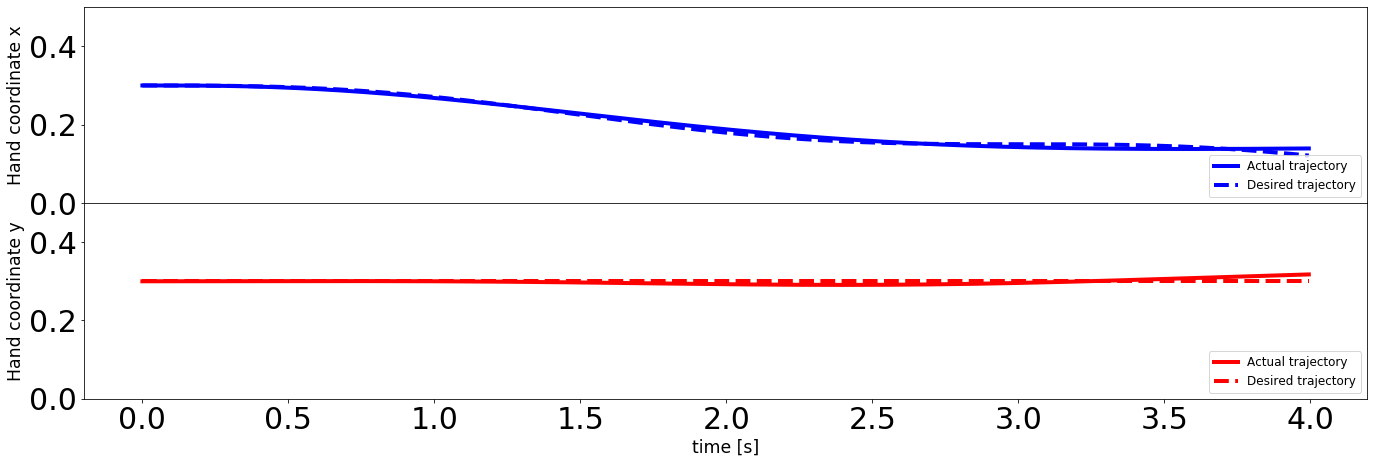

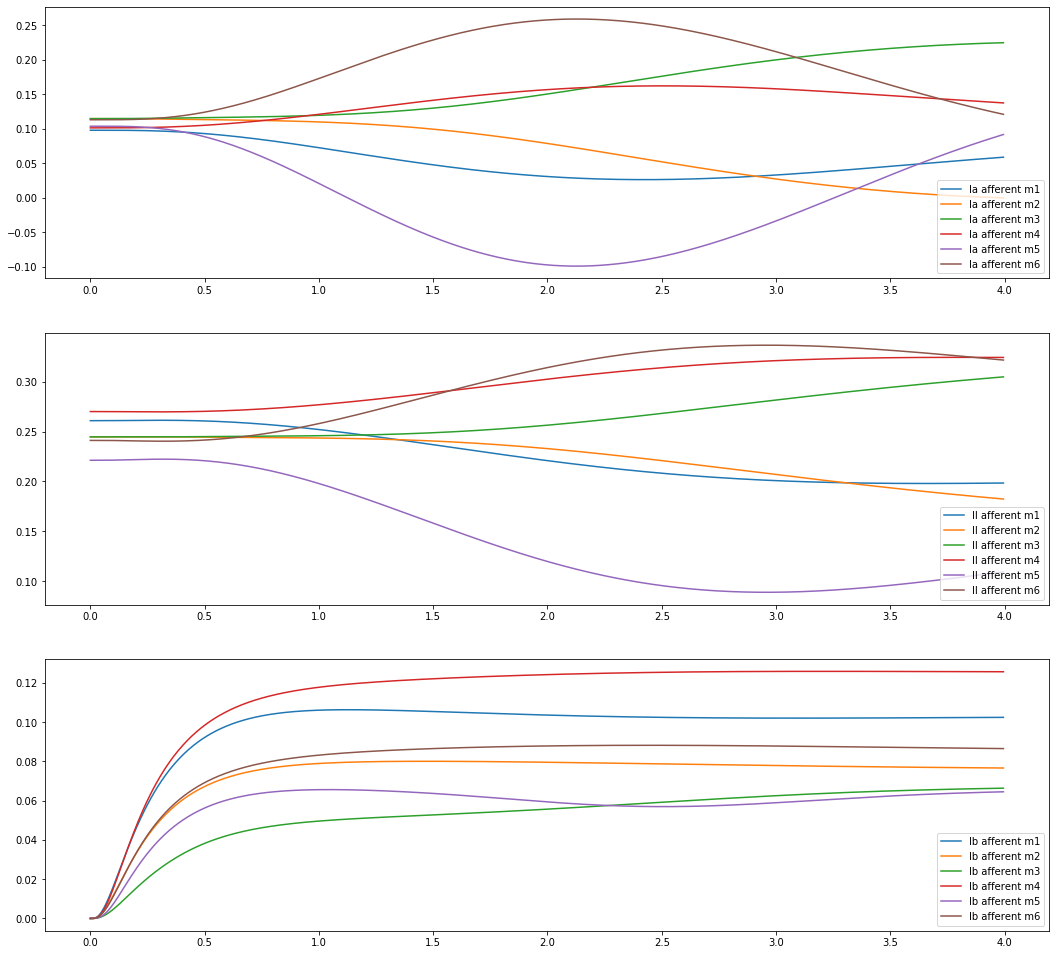

In [7]:
sc.initialize()
sc.update_w(w)
sc.simulate(4.)
error = sc.calc_error(0.15,0.3,4.)
print('Error: ' + str(error))
sc.arm_trajectory(0.15,0.3,4.)
sc.arm_afferent_output()

In [8]:
#w = sc.w_list()
#print(w)

In [9]:
#syn_idx = sc.syn_list()
#print(syn_idx)

In [8]:
for i,slist in enumerate(sc.net.syns):
    for j,syn in enumerate(slist):
        if syn.port in [0]:
            if hasattr(sc.net.syns[i][j],'plant_out') == False:
                pre_type = sc.net.units[syn.preID].type.name
                post_type = sc.net.units[syn.postID].type.name
                print("%s (%d) --> %s (%d), port:%d, w:%f, delay:%f" 
                      %(pre_type, syn.preID, post_type, syn.postID, syn.port, syn.w, sc.net.delays[i][j]))

presyn_inh_sig (1) --> presyn_inh_sig (0), port:0, w:3.000000, delay:0.005000
presyn_inh_sig (3) --> presyn_inh_sig (0), port:0, w:-2.000000, delay:0.005000
presyn_inh_sig (4) --> presyn_inh_sig (0), port:0, w:-3.000000, delay:0.005000
presyn_inh_sig (16) --> presyn_inh_sig (0), port:0, w:-3.000000, delay:0.005000
presyn_inh_sig (17) --> presyn_inh_sig (0), port:0, w:-3.000000, delay:0.005000
presyn_inh_sig (19) --> presyn_inh_sig (0), port:0, w:3.000000, delay:0.005000
presyn_inh_sig (6) --> presyn_inh_sig (0), port:0, w:2.800000, delay:0.005000
presyn_inh_sig (7) --> presyn_inh_sig (0), port:0, w:3.000000, delay:0.005000
presyn_inh_sig (9) --> presyn_inh_sig (0), port:0, w:-3.000000, delay:0.005000
presyn_inh_sig (21) --> presyn_inh_sig (0), port:0, w:3.000000, delay:0.005000
presyn_inh_sig (22) --> presyn_inh_sig (0), port:0, w:3.000000, delay:0.005000
presyn_inh_sig (24) --> presyn_inh_sig (0), port:0, w:-3.000000, delay:0.005000
presyn_inh_sig (2) --> presyn_inh_sig (0), port:0, w

[[ 0.          3.         -1.06716158 -2.         -3.          0.
   2.8         3.          0.         -3.          0.          0.
   0.          0.          0.          0.         -3.         -3.
   0.          3.          0.          3.          3.          0.
  -3.          0.          0.          0.          0.          0.        ]
 [ 0.95305636  0.         -2.80823396  3.29158904 -2.35592716  0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 3.29167055  1.93189665  0.         -1.6         3.02521458  0.
   0.          3.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -2.
   0.          0.          0.          0.          3.4         0.
   0.          0.          0.          0.          0.     

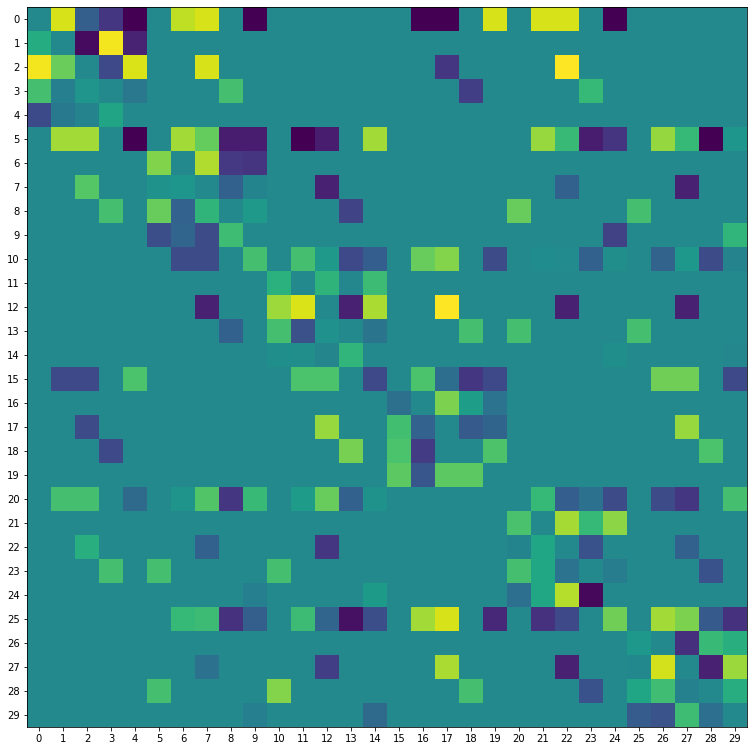

In [9]:
# Creating a numpy 2D array weights that contains all the synaptic weights 
# and ploting the connection matrix as an image

N = 30 # number of neuronal units
#N = len(sc.net.units) # number of units
weights = np.zeros((N,N)) 

for i,slist in enumerate(sc.net.syns):
    for j,syn in enumerate(slist):
        if syn.port in [0]:
            if hasattr(sc.net.syns[i][j],'plant_out') == False:
                weights[syn.postID, syn.preID] = syn.w
                
print(weights)

fig_ex1 = plt.figure(figsize=(10,10))
ax = fig_ex1.add_axes([0., 0., 1., 1.], aspect=1)
ax.set_xticks(list(range(N)))
ax.set_yticks(list(range(N)))
ax.imshow(weights)
plt.show()

In [10]:
#Preparing the weight matrices to compare: A - original (physiological) weight matrix
#                                          B - alternative (fully-connected) weight matrix

A =   [[ 0.        ,  2.4       ,  0.        , -2.4       , -2.4       ,
         0.        ,  2.4       ,  2.4       ,  0.        , -2.4       ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -2.4       , -2.4       ,  0.        ,  2.4       ,
         0.        ,  2.4       ,  2.4       ,  0.        , -2.4       ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -2.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -2.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.6       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.6       ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -1.6       ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.6       ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.5       ,  2.5       ,  0.        , -3.        ,
         0.        ,  2.2       ,  0.        , -3.        , -3.2       ,
         0.        , -3.        , -3.        ,  0.        ,  2.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  2.41114133,  1.32533938, -3.        , -2.00833697,
         0.        ,  2.37504467,  1.27802839, -3.        ,  0.36553304],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  3.4       ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -3.        ,  0.        ,
         0.        ,  0.        , -3.4       ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -2.4       ,  0.        ,  0.        ,
         0.        ,  0.        , -3.4       ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  2.4       ,  0.        ,
         2.4       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -1.6       ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.4       ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.4       ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.7684666 ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.21125078],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -1.5       , -1.5       ,  0.        ,  1.5       ,
         0.        ,  1.5       ,  0.        , -0.6       , -1.5       ,
         0.        ,  0.6       ,  1.5       ,  0.        , -1.5       ,
         0.        ,  0.10618188, -0.71276955, -1.5       ,  0.17295758,
         0.        , -1.36269845, -0.07757993, -1.1       , -0.12991275],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -3.4       ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -3.        ,  0.        ,
         0.        ,  0.        ,  2.6       ,  0.        ,  0.        ,
         0.        ,  0.        , -3.4       ,  0.        ,  0.        ,
         0.        ,  0.        , -3.4       ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -0.6       ,  0.        ,
         1.5       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.5       ,  0.        ,
         1.5       ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.5       ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.79959811,
         0.        ,  0.        ,  0.        ,  0.        , -0.14812284],
       [ 0.        , -1.6       , -1.6       ,  0.        ,  2.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  2.        ,  2.        ,  0.        , -1.6       ,
         0.        ,  2.        ,  0.        , -2.1       , -1.6       ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  2.        ,  2.        ,  0.        , -1.6       ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -2.4       ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  2.4       ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -2.4       ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  2.4       ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -1.6       ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.5       ,  0.        ,
         1.5       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.5       ,  1.4       ,  0.        , -0.6       ,
         0.        ,  0.30146922,  0.47100324, -1.5       ,  0.73712004,
         0.        , -0.0528565 ,  1.21496548, -0.8       ,  0.8590772 ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.8       ,  0.        , -1.5       , -0.6       ,
         0.        , -0.6       , -0.6       ,  0.        ,  1.5       ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.        ,  0.        ,  0.        ,
         0.        ,  0.        , -1.6       ,  0.        ,  0.        ,
         0.        ,  0.        , -1.6       ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -2.        ,  0.        ,
         0.        ,  0.        , -1.6       ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.3       ,  0.        ,
         2.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.6       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -1.6       ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.03301791,
         0.        ,  0.        ,  0.        ,  0.        ,  0.08975613,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.79079409,  0.67982667, -2.9       , -0.56902228,
         0.        ,  0.48617891, -0.41854408, -2.3       , -1.65621648,
         0.        ,  2.1       ,  1.6       ,  0.        , -2.1       ,
         0.        , -2.1       , -2.1       ,  0.        ,  1.6       ,
         0.        ,  1.6       ,  0.        , -2.9       , -2.1       ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.6       ,  0.        ,  0.        ,
         0.        ,  0.        , -0.6       ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.6       ,  0.        ,  0.        ,
         0.        ,  0.        , -1.6       ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        , -1.6       ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.7       ,  0.        ,  0.        ,  0.        ,  0.        ,
         3.4       ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  2.4       ,  0.        ,
         0.        ,  0.        ,  0.        , -1.8       ,  0.        ,
         2.4       ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.63381287,
         0.        ,  0.        ,  0.        ,  0.        , -1.17549794,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]]  

#B =

In [11]:
# TEST 1: From the weights that both networks have, the fraction that have the same sign
# A - original (physiological) weight matrix / B - alternative (fully-connected) weight matrix

B = weights.copy()

total_weights = 0
same_sign_weights = 0

for i in np.arange(30):
    for j in np.arange(30):
        if A[i][j] != 0.0:
            total_weights += 1
            if (A[i][j] < 0.0 and B[i][j] < 0.0) or (A[i][j] > 0.0 and B[i][j] > 0.0):
                same_sign_weights += 1
            
sign_fraction = same_sign_weights / total_weights

print(same_sign_weights)
print(total_weights)
print(sign_fraction)    

153
156
0.9807692307692307


In [12]:
# TEST 2: From the weights that are only in the fully-connected network, checking if they are on average smaller
# B - alternative (fully-connected) weight matrix

B = weights.copy()

#Creating lists with the ID's of each neuronal type

alpha = range(0,30,5)
pn = range(1,30,5)
ia = range(2,30,5)
r = range(3,30,5)
ib = range(4,30,5)

#Summing the weights present only in the fully-connected network and calculating the average

new_w_number = 90
new_w_mean = 0.0

for i in np.arange(6):
    new_w_mean += abs(B[alpha[i],ia[i]]) + abs(B[pn[i],alpha[i]]) + abs(B[pn[i],r[i]]) + abs(B[pn[i],ia[i]]) + abs(B[pn[i],ib[i]]) + abs(B[ia[i],alpha[i]]) + abs(B[ia[i],ib[i]]) + abs(B[ia[i],pn[i]]) + abs(B[r[i],ia[i]]) + abs(B[r[i],ib[i]]) + abs(B[r[i],pn[i]]) + abs(B[ib[i],alpha[i]]) + abs(B[ib[i],r[i]]) + abs(B[ib[i],ia[i]]) + abs(B[ib[i],pn[i]]) 
    
new_w_mean /= new_w_number
print("Average of new weights = %f" %(new_w_mean))

#Assigning zero to the new weight values

for i in np.arange(6):
    B[alpha[i],ia[i]] = 0.0
    B[pn[i],alpha[i]] = 0.0
    B[pn[i],r[i]] = 0.0
    B[pn[i],ia[i]] = 0.0
    B[pn[i],ib[i]] = 0.0
    B[ia[i],alpha[i]] = 0.0
    B[ia[i],ib[i]] = 0.0
    B[ia[i],pn[i]] = 0.0
    B[r[i],ia[i]] = 0.0
    B[r[i],ib[i]] = 0.0
    B[r[i],pn[i]] = 0.0
    B[ib[i],alpha[i]] = 0.0
    B[ib[i],r[i]] = 0.0
    B[ib[i],ia[i]] = 0.0
    B[ib[i],pn[i]] = 0.0
    
#Calculating the average of physiological weights

physio_w_number = 0
physio_w_mean = 0.0

for i in np.arange(30):
    for j in np.arange(30):
        if B[i][j] != 0.0:
            physio_w_mean += abs(B[i][j])
            physio_w_number += 1

physio_w_mean /= physio_w_number
print("Average of physiological weights = %f" %(physio_w_mean))

Average of new weights = 1.267858
Average of physiological weights = 1.723947


In [13]:
# TEST 3: Frobenius norm
# A - original (physiological) weight matrix / B - alternative (fully-connected) weight matrix

B = weights.copy()

#Assigning zero to the new weight values

for i in np.arange(6):
    B[alpha[i],ia[i]] = 0.0
    B[pn[i],alpha[i]] = 0.0
    B[pn[i],r[i]] = 0.0
    B[pn[i],ia[i]] = 0.0
    B[pn[i],ib[i]] = 0.0
    B[ia[i],alpha[i]] = 0.0
    B[ia[i],ib[i]] = 0.0
    B[ia[i],pn[i]] = 0.0
    B[r[i],ia[i]] = 0.0
    B[r[i],ib[i]] = 0.0
    B[r[i],pn[i]] = 0.0
    B[ib[i],alpha[i]] = 0.0
    B[ib[i],r[i]] = 0.0
    B[ib[i],ia[i]] = 0.0
    B[ib[i],pn[i]] = 0.0
    
#Normalizing the rows of A and B 
#Using the 2-norm (the square root of the sum of the squares of the elements in the vector)

A_norm = np.zeros((len(A),len(A)))
B_norm = np.zeros((len(B),len(B)))
norm_A = 0.0
norm_B = 0.0

for i in np.arange(30):
    for j in np.arange(30):
        norm_A += A[i][j]*A[i][j]
        norm_B += B[i][j]*B[i][j]
    norm_A = np.sqrt(norm_A)
    norm_B = np.sqrt(norm_B)
    #print("norm_A[%d] = %f" %(i,norm_A))
    #print("norm_B[%d] = %f" %(i,norm_B))
    for j in np.arange(30):
        if norm_A != 0.0:
            A_norm[i][j] = A[i][j]/norm_A
        if norm_B != 0.0:
            B_norm[i][j] = B[i][j]/norm_B
    norm_A = 0.0
    norm_B = 0.0
    #print("A_norm[%d]" %(i))
    #print(A_norm[i])
    #print("B_norm[%d]" %(i))
    #print(B_norm[i])
#print("A_norm")
#print(A_norm)
#print("B_norm")
#print(B_norm)

#Subtracting the normalized matrices (A_norm-B_norm)

sub_matrix = np.subtract(A_norm,B_norm)
#print("sub_matrix")
#print(sub_matrix)

#Obtaining the Frobenius norm of A_norm-B_norm (the square root of the sum of the squares of the elements)

frob_norm = 0.0

for i in np.arange(30):
    for j in np.arange(30):
        frob_norm += sub_matrix[i][j]*sub_matrix[i][j] 
#print("Sum =",frob_norm)
        
frob_norm = np.sqrt(frob_norm)
print("Frobenius norm = %f" %(frob_norm))

Frobenius norm = 1.339112
